In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("Fully_Cleaned_Halls_Data.csv")

In [3]:
df.duplicated().sum()

0

In [4]:
df.head(10)

Name  \
0                                ambar palms aravali   
1        cherish ballrooms at imperial club of india   
2        moksha himalaya spa resort himachal pradesh   
3         crowne plaza new delhi okhla, an ihg hotel   
4                               radiance tania farms   
5                                  hotel surya grand   
6                         the leela palace new delhi   
7                    park boulevard hotel, new delhi   
8  crowne plaza new delhi mayur vihar noida, an i...   
9                                    tivoli bijwasan   

                                           Type  Ratings  Reviews  Menu_Price  \
0        banquet halls, marriage garden / lawns      5.0       15      1800.0   
1        banquet halls, marriage garden / lawns      5.0        4      3000.0   
2  4 star & above wedding hotels, banquet halls      4.9        6      4500.0   
3  4 star & above wedding hotels, banquet halls      5.0       10      3199.0   
4        banquet halls, marriage garden / lawns      4.8       19      2300.0   
5    banquet halls, 3 star hotels with banquets      4.9      191      1800.0   
6  4 star & above wedding hotels, banquet halls      4.7       14      6000.0   
7  4 star & above wedding hotels, banquet halls      5.0       52      4200.0   
8  4 star & above wedding hotels, banquet halls      4.6       19      2500.0   
9        banquet halls, marriage garden / lawns      5.0       25      3000.0   

   Rooms  Pax_Min  Pax_Max Destination  Amenities_+more  
0     33      100      600         ncr                5  
1     20       80      650         ncr                4  
2    110       70      700         ncr                5  
3    208       40      600         ncr                5  
4      7      200     1500         ncr                6  
5     22       50      600         ncr                6  
6    254       25      300         ncr                4  
7     45      300     1000         ncr                7  
8    160       30      700         ncr                4  
9     16      150     1400         ncr                4

In [5]:
num_df= df.select_dtypes(include=[int,float]).columns.tolist()
cat_df= df.select_dtypes(include=[object]).columns.tolist()

In [6]:
print(num_df)
print()
print(cat_df)

['Ratings', 'Reviews', 'Menu_Price', 'Rooms', 'Pax_Min', 'Pax_Max', 'Amenities_+more']

['Name', 'Type', 'Destination']


In [7]:
df.skew(numeric_only=True)

Ratings            -3.262871
Reviews            10.712913
Menu_Price         19.655928
Rooms               5.550150
Pax_Min             2.399856
Pax_Max             6.926599
Amenities_+more     1.155182
dtype: float64

In [8]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Exclude 'Menu_Price' from the outlier removal
cols_to_filter = [col for col in numerical_cols if col not in ['Menu_Price',"Ratings","Rooms"]]

# IQR-based outlier removal
Q1 = df[cols_to_filter].quantile(0.25)
Q3 = df[cols_to_filter].quantile(0.75)
IQR = Q3 - Q1

# Keep rows that are within the IQR bounds for all selected columns
df2 = df[~((df[cols_to_filter] < (Q1 - 1.5 * IQR)) | (df[cols_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Reset index
df2 = df2.reset_index(drop=True)


In [9]:
df2

Name  \
0           cherish ballrooms at imperial club of india   
1                                     lado rani banquet   
2     fortune park orange, sidhrawali, gurugram - it...   
3                                 spara boutique resort   
4                                21 century event space   
...                                                 ...   
1931                                hotel grand capitol   
1932                             hotel regal by rhytham   
1933                                             skylit   
1934                                     shahpura house   
1935                                       gokul vatika   

                                                   Type  Ratings  Reviews  \
0                banquet halls, marriage garden / lawns      5.0        4   
1            banquet halls, 3 star hotels with banquets      5.0        2   
2          4 star & above wedding hotels, banquet halls      5.0        4   
3                banquet halls, marriage garden / lawns      4.8        2   
4                               marriage garden / lawns      5.0        5   
...                                                 ...      ...      ...   
1931          banquet halls, destination wedding venues      5.0        0   
1932             banquet halls, marriage garden / lawns      4.8        2   
1933                                      banquet halls      5.0        0   
1934  3 star hotels with banquets, small function / ...      5.0        1   
1935                            marriage garden / lawns      5.0        0   

      Menu_Price  Rooms  Pax_Min  Pax_Max Destination  Amenities_+more  
0         3000.0     20       80      650         ncr                4  
1         1000.0     35      125      600         ncr                4  
2         2500.0     96      200     1000         ncr                4  
3         4000.0     39      200     1200         ncr                4  
4          850.0      2      300      600     chennai                3  
...          ...    ...      ...      ...         ...              ...  
1931       800.0     47       30       50      jaipur                3  
1932       700.0     28      150      300      jaipur                4  
1933       500.0     21      105      150      jaipur                2  
1934      1500.0     62       80      120      jaipur                3  
1935       550.0     21      250      400      jaipur                2  

[1936 rows x 10 columns]

In [10]:
df2.duplicated().sum()

0

In [11]:
df2.Rooms.max()

670

In [10]:
df2.skew(numeric_only=True)

Ratings           -4.388645
Reviews            1.801137
Menu_Price         9.499260
Rooms              8.433368
Pax_Min            1.173195
Pax_Max            1.367950
Amenities_+more    0.268930
dtype: float64

In [13]:
num_df2= df2.select_dtypes(include=[int,float]).columns.tolist()
cat_df2= df2.select_dtypes(include=[object]).columns.tolist()

# Univariate Ananlysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

# Distribution of the data

# BoxPlot

## Before

Ratings               Axes(0.125,0.786098;0.168478x0.0939024)
Reviews            Axes(0.327174,0.786098;0.168478x0.0939024)
Menu_Price         Axes(0.529348,0.786098;0.168478x0.0939024)
Rooms              Axes(0.731522,0.786098;0.168478x0.0939024)
Pax_Min               Axes(0.125,0.673415;0.168478x0.0939024)
Pax_Max            Axes(0.327174,0.673415;0.168478x0.0939024)
Amenities_+more    Axes(0.529348,0.673415;0.168478x0.0939024)
dtype: object

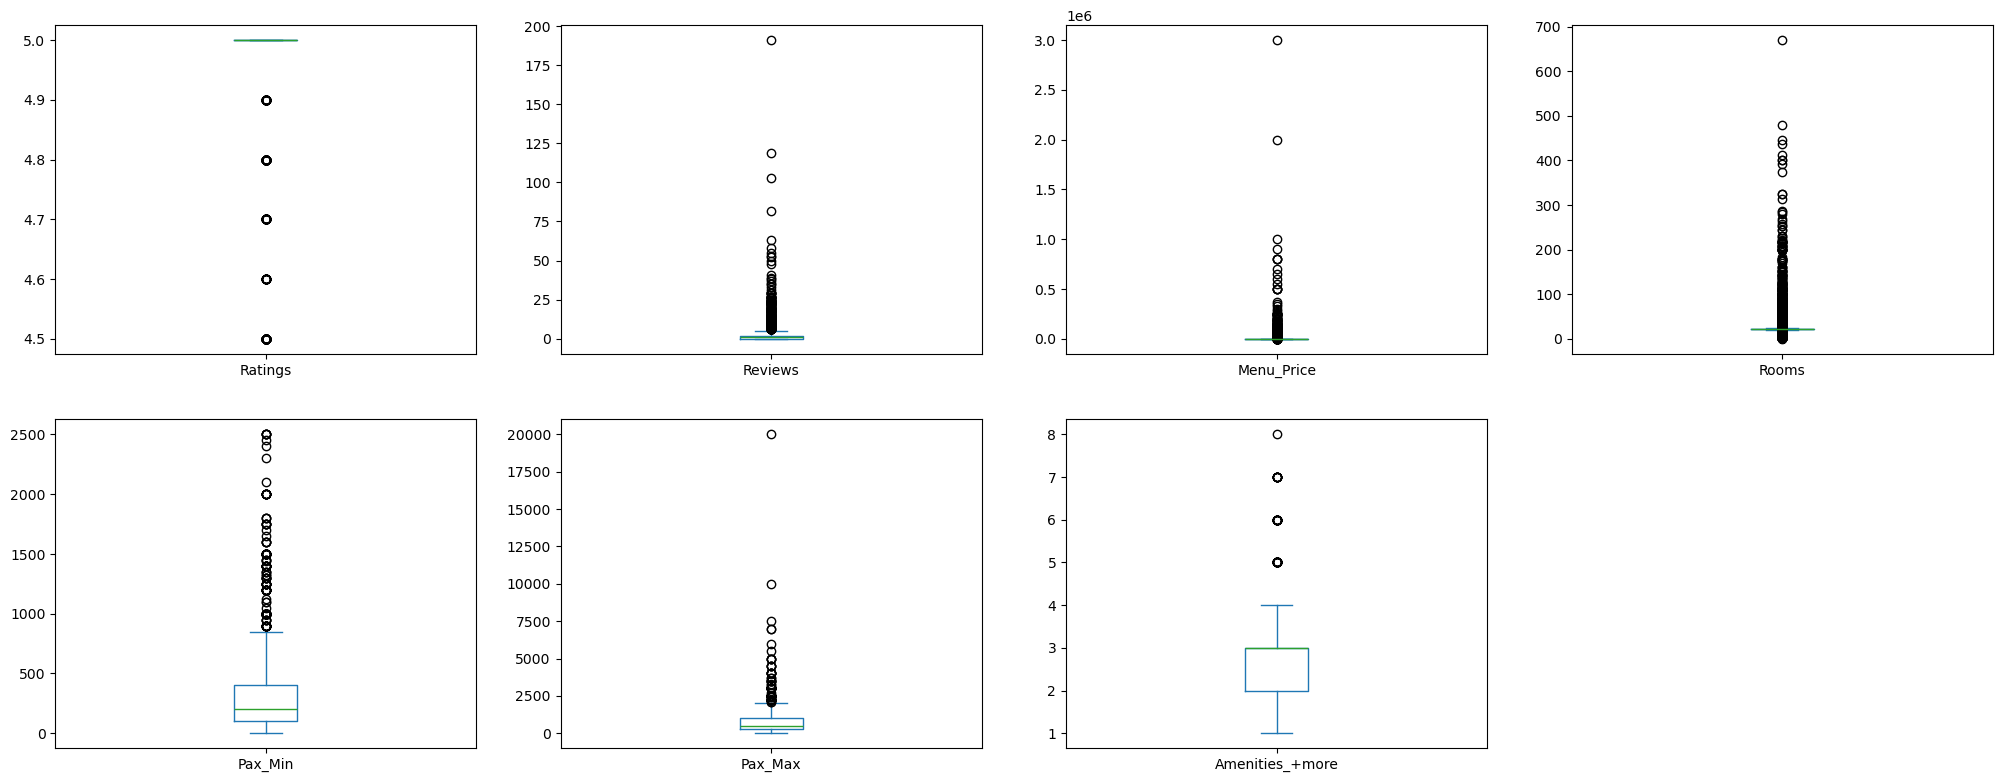

In [14]:
# boxplot before handling outliers
df[num_df].plot(kind="box", subplots=True, figsize=(25,35), layout= (7,4))

## After

Ratings               Axes(0.125,0.786098;0.168478x0.0939024)
Reviews            Axes(0.327174,0.786098;0.168478x0.0939024)
Menu_Price         Axes(0.529348,0.786098;0.168478x0.0939024)
Rooms              Axes(0.731522,0.786098;0.168478x0.0939024)
Pax_Min               Axes(0.125,0.673415;0.168478x0.0939024)
Pax_Max            Axes(0.327174,0.673415;0.168478x0.0939024)
Amenities_+more    Axes(0.529348,0.673415;0.168478x0.0939024)
dtype: object

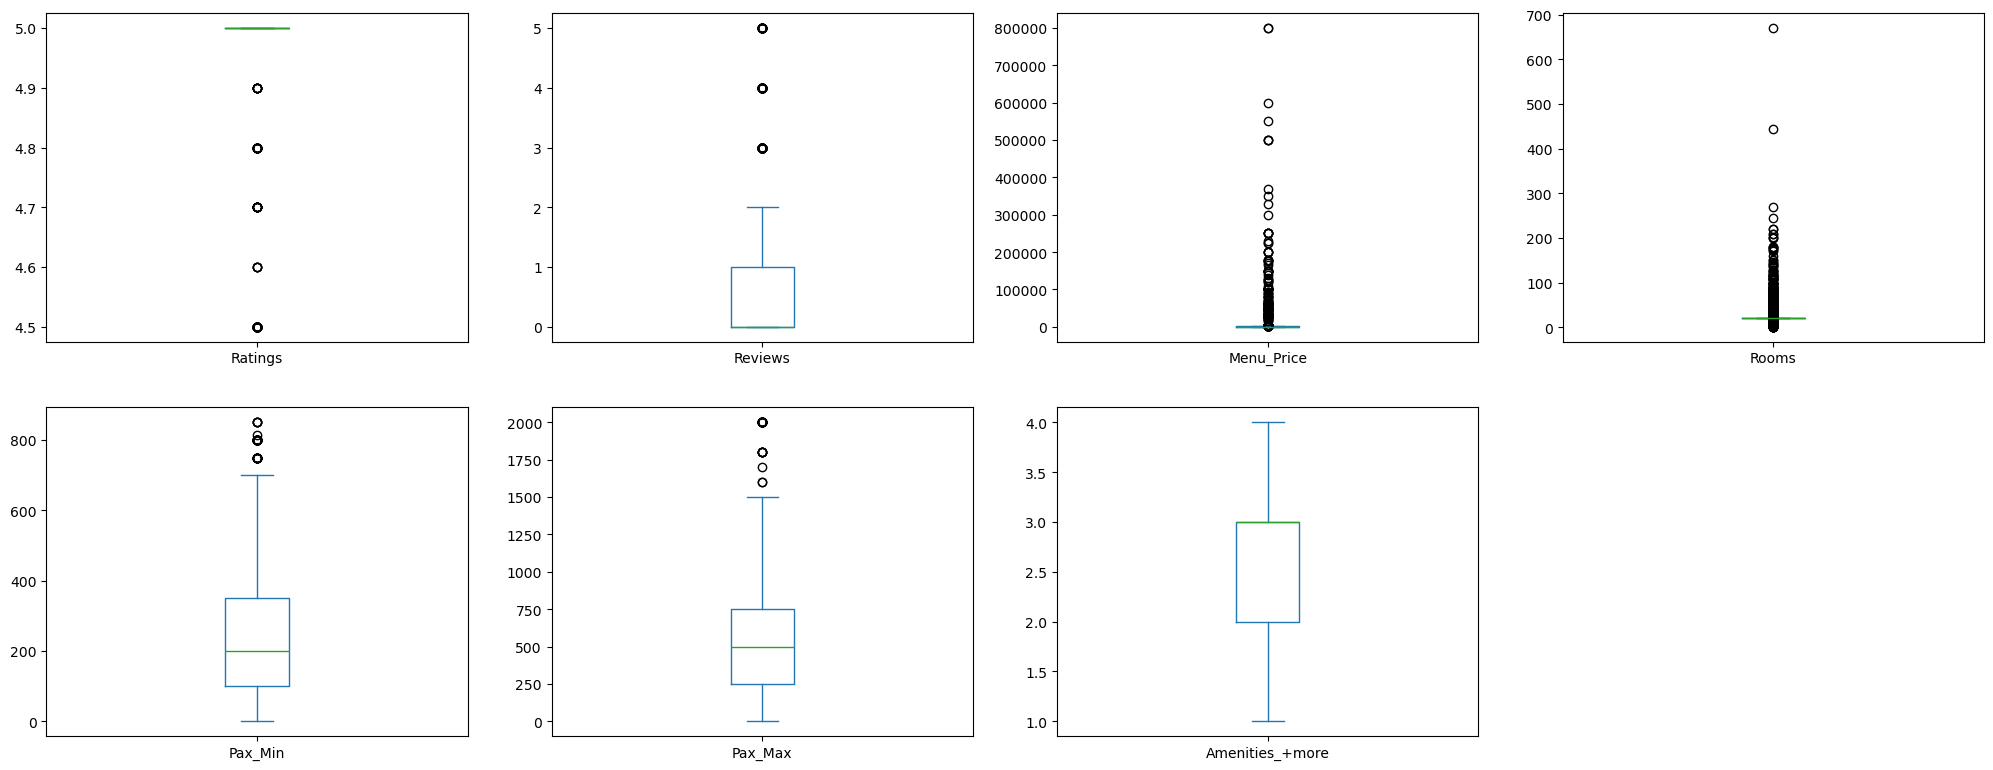

In [15]:
# boxplot after handling outliers
df2[num_df2].plot(kind="box", subplots=True, figsize=(25,35), layout= (7,4))

In [16]:
df2[df2["Rooms"]==df2["Rooms"].max()]

Name  \
1075  pullman & novotel - new delhi-aerocity   

                                              Type  Ratings  Reviews  \
1075  4 star & above wedding hotels, banquet halls      4.8        5   

      Menu_Price  Rooms  Pax_Min  Pax_Max Destination  Amenities_+more  
1075      3500.0    670      700     1500         ncr                3

# KDE

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

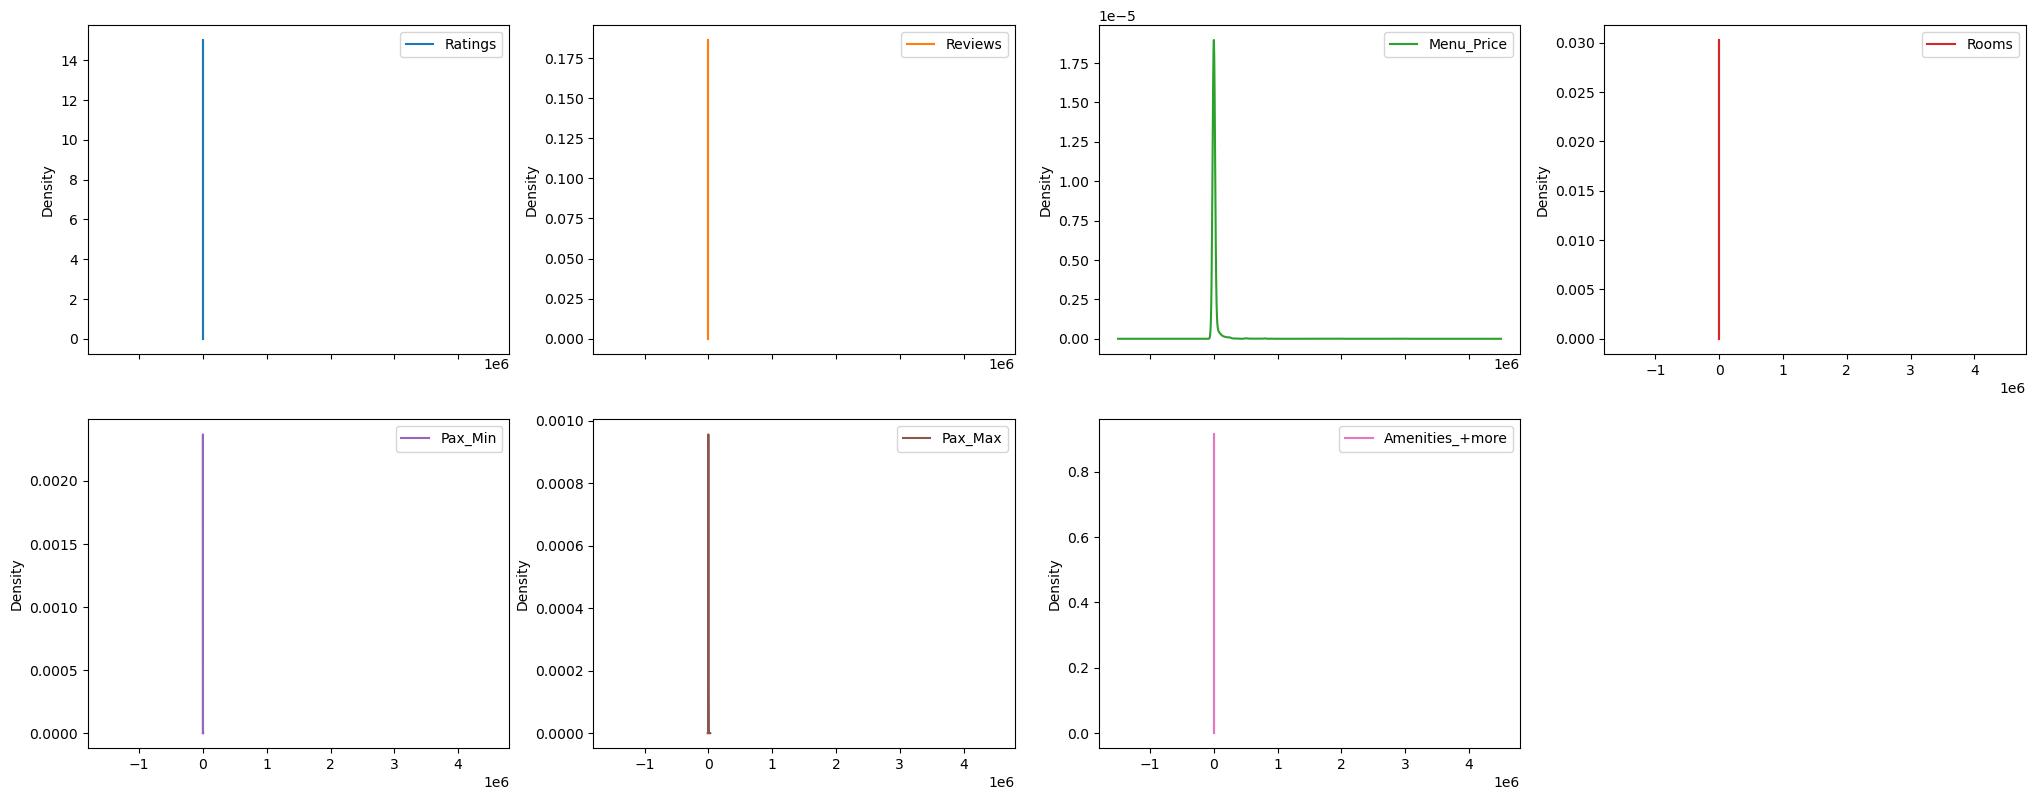

In [17]:
# KDE plot before handling outliers
df[num_df].plot(kind="kde", subplots=True, figsize=(25,35), layout= (7,4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

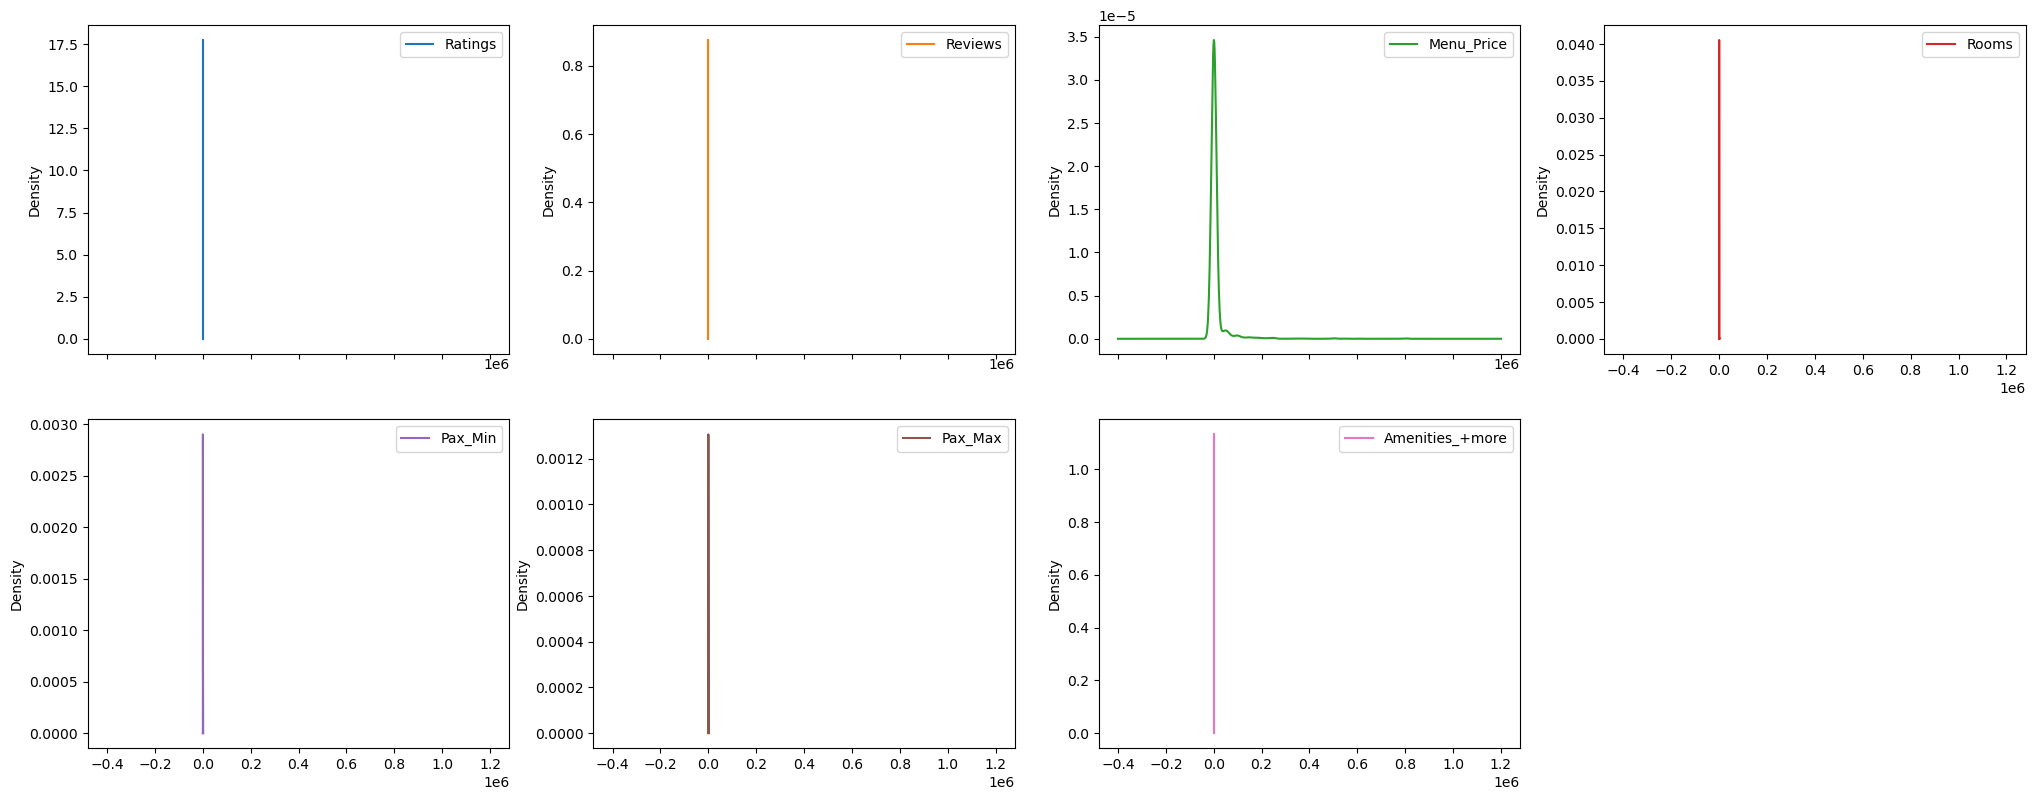

In [18]:
# KDE plot before handling outliers
df2[num_df2].plot(kind="kde", subplots=True, figsize=(25,35), layout= (7,4))

In [19]:
# collect each column from the list of num_df
ratings= num_df2[0]
reviews= num_df2[1]
menu_price= num_df2[2]
rooms= num_df2[3]
pax_min= num_df2[4]
pax_max= num_df2[5]
amenities= num_df2[6]

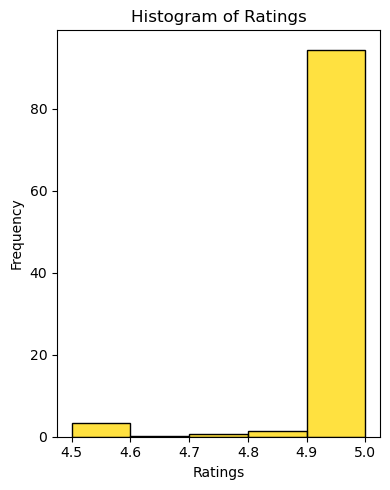

In [20]:
plt.figure(figsize= (4,5))
sns.histplot(data= df2[ratings], bins=5, color="gold", stat= "percent")
plt.ylabel("Frequency")
plt.title(f"Histogram of {ratings}")
plt.tight_layout()
# plt.savefig("Histogram for Ratings")

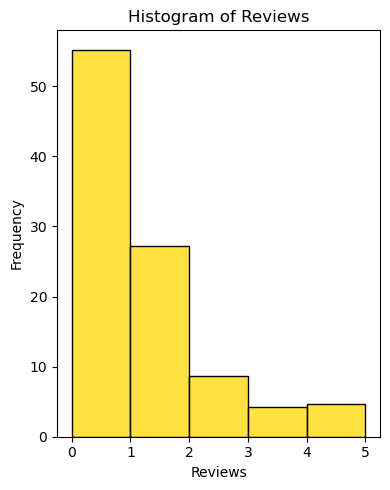

In [21]:
plt.figure(figsize= (4,5))
sns.histplot(data= df2[reviews], bins=5, color="gold", stat= "percent")
plt.ylabel("Frequency")
plt.title(f"Histogram of {reviews}")
plt.tight_layout()
# plt.savefig("Histogram for Ratings")

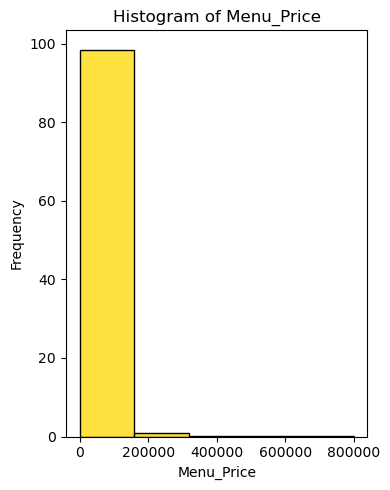

In [22]:
plt.figure(figsize= (4,5))
sns.histplot(data= df2[menu_price], bins=5, color="gold", stat= "percent")
plt.ylabel("Frequency")
plt.title(f"Histogram of {menu_price}")
plt.tight_layout()
# plt.savefig("Histogram for Ratings")

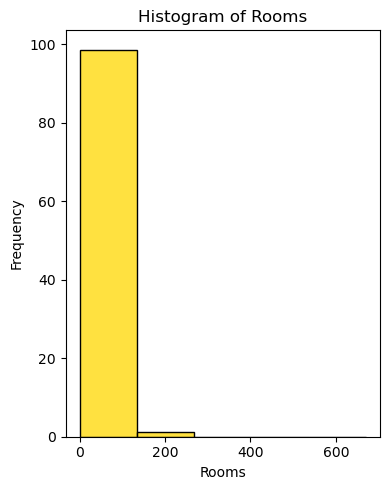

In [23]:
plt.figure(figsize= (4,5))
sns.histplot(data= df2[rooms], bins=5, color="gold", stat= "percent")
plt.ylabel("Frequency")
plt.title(f"Histogram of {rooms}")
plt.tight_layout()
# plt.savefig("Histogram for Ratings")

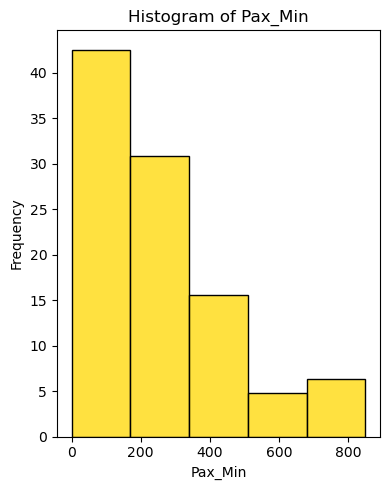

In [24]:
plt.figure(figsize= (4,5))
sns.histplot(data= df2[pax_min], bins=5, color="gold", stat= "percent")
plt.ylabel("Frequency")
plt.title(f"Histogram of {pax_min}")
plt.tight_layout()
# plt.savefig("Histogram for Ratings")

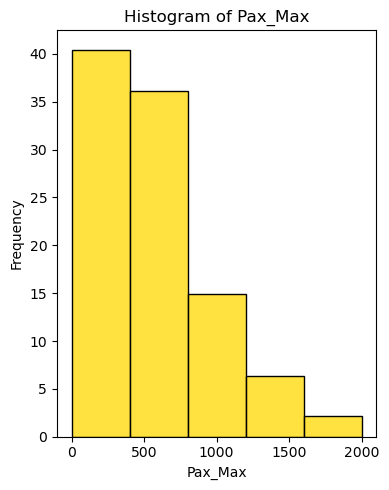

In [25]:
plt.figure(figsize= (4,5))
sns.histplot(data= df2[pax_max], bins=5, color="gold", stat= "percent")
plt.ylabel("Frequency")
plt.title(f"Histogram of {pax_max}")
plt.tight_layout()
# plt.savefig("Histogram for Ratings")

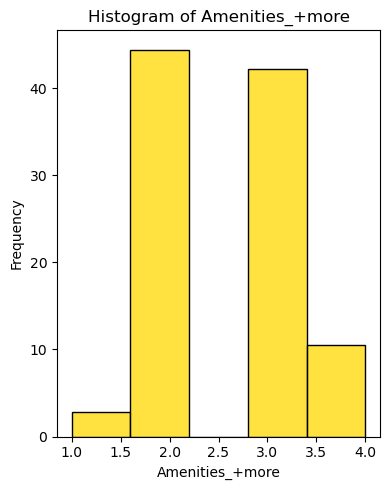

In [26]:
plt.figure(figsize= (4,5))
sns.histplot(data= df2[amenities], bins=5, color="gold", stat= "percent")
plt.ylabel("Frequency")
plt.title(f"Histogram of {amenities}")
plt.tight_layout()
# plt.savefig("Histogram for Ratings")

In [27]:
df2["Amenities_+more"].unique()

array([4, 3, 2, 1], dtype=int64)

In [28]:
df2["Rooms"].unique()

array([ 20,  35,  96,  39,   2,   8, 100,  21,   4,   6,  72,  58,  50,
       114, 145, 245, 139,   3,   5,  45, 137, 174,  82, 134,  89,  80,
        18, 209,  30,  33,  10,  11,  40, 151,  75,  15,  25, 171,  87,
        84,  14, 109, 120,  97,  65,  60,   7,  66,  61,  24,  71,  52,
        36,  12, 220,  55,  13,  28,  46,  44,  85,  54,  27,  37, 269,
        22,  47, 115,  90,  16, 112,  26,  69,  42,  32,  17, 128,  74,
       127,  34,  48,  19, 116,  92,   1, 178,  88, 175,  43,   9, 445,
        38, 140,  23, 117,  94, 124, 200, 179,  70, 108, 150,  29,  53,
       142, 670,  64,  49, 101,  57, 129, 144, 160, 201,  41, 110,  51,
        68,  67, 180,  62, 106,  63,  31], dtype=int64)

In [29]:
df2.Rooms.max()

670

In [29]:
# df2 = df2.drop(index=[155, 269, 1064, 206, 1624, 1418, 30, 805, 350])


In [30]:
name= cat_df2[0]
type_= cat_df2[1]
destination= cat_df2[2]

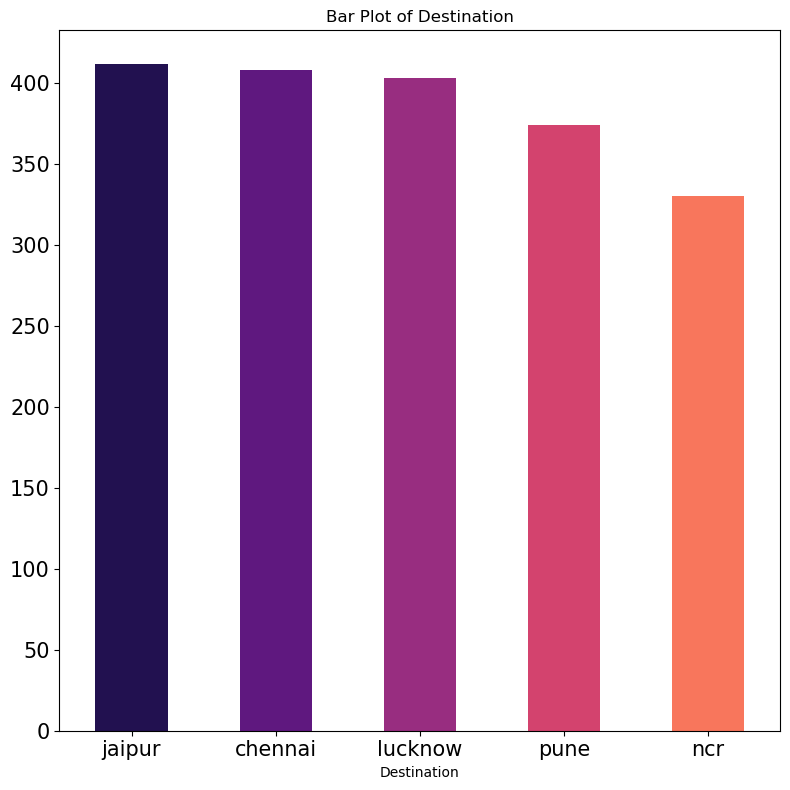

In [31]:
plt.figure(figsize = (8,8))
df2[destination].value_counts().plot.bar(color = sns.color_palette('magma') , fontsize = 15)
plt.title(f'Bar Plot of {destination}')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()
# plt.savefig('brand_bar_cat.png')

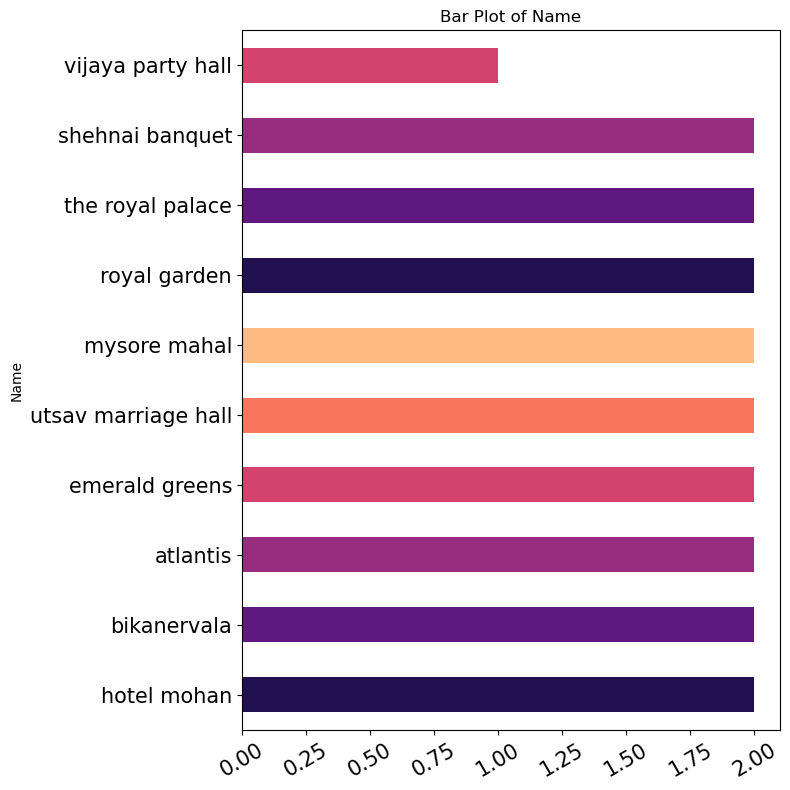

In [32]:
plt.figure(figsize = (8,8))
df2[name].value_counts().nlargest(10).plot.barh(color = sns.color_palette('magma') , fontsize = 15)
plt.title(f'Bar Plot of {name}')
plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()
# plt.savefig('brand_bar_cat.png')

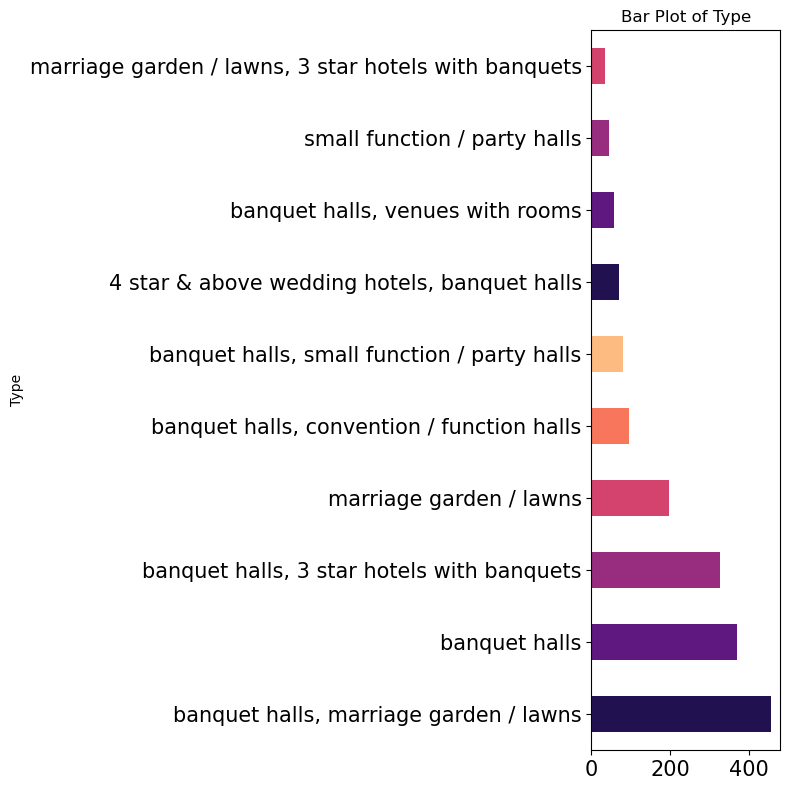

In [33]:
plt.figure(figsize = (8,8))
df2[type_].value_counts().nlargest(10).plot.barh(color = sns.color_palette('magma') , fontsize = 15)
plt.title(f'Bar Plot of {type_}')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()
# plt.savefig('brand_bar_cat.png')

# Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot ,violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps

## Categorical VS Numerical

In [34]:
def cat_num(df , numerical_df , categorical_df):
    for num in numerical_df:
        group_data = df.groupby(categorical_df)[num].agg(['mean' , 'median' , 'min' , 'max'])
        print(group_data)

        plt.figure(figsize = (17,15))

        top10_categories = df[categorical_df].value_counts(ascending = False).index[:10]
        top10_df = df[df[categorical_df].isin(top10_categories)]
        #barplot
        plt.subplot(3,2,1)
        sns.barplot(data = top10_df , x = num , y = categorical_df, palette="magma")
        plt.title(f'Bar Plot of {num} vs {categorical_df}')
        
        #KDE Plot
        plt.subplot(3,2,2)
        sns.kdeplot(data = top10_df , x = num , hue = categorical_df, fill= True)
        plt.title(f'KDE Plot of {num} vs {categorical_df}')

        #Scatter Plot
        plt.subplot(3,2,3)
        sns.scatterplot(data = top10_df , x = num , y = categorical_df)
        plt.title(f'Scatter Plot of {num} vs {categorical_df}')

        #Voilin Plot
        plt.subplot(3,2,4)
        sns.violinplot(data = top10_df , x = num , y = categorical_df)
        plt.title(f'Violin Plot of {num} vs {categorical_df}')

        
        
    
        plt.tight_layout()

                            mean  median  min  max
Name                                              
 harnarain palace            5.0     5.0  5.0  5.0
 hotel utsav                 5.0     5.0  5.0  5.0
10th mile, manjri            5.0     5.0  5.0  5.0
11th avenue                  5.0     5.0  5.0  5.0
121 kitchen : bar            5.0     5.0  5.0  5.0
...                          ...     ...  ...  ...
zaika lawns                  5.0     5.0  5.0  5.0
zara's party hall            5.0     5.0  5.0  5.0
zaras resort, khandala       5.0     5.0  5.0  5.0
zero degree lounge & disco   5.0     5.0  5.0  5.0
आरंभ                         5.0     5.0  5.0  5.0

[1918 rows x 4 columns]
                            mean  median  min  max
Name                                              
 harnarain palace            3.0     3.0    3    3
 hotel utsav                 0.0     0.0    0    0
10th mile, manjri            2.0     2.0    2    2
11th avenue                  0.0     0.0    0    0
121 ki

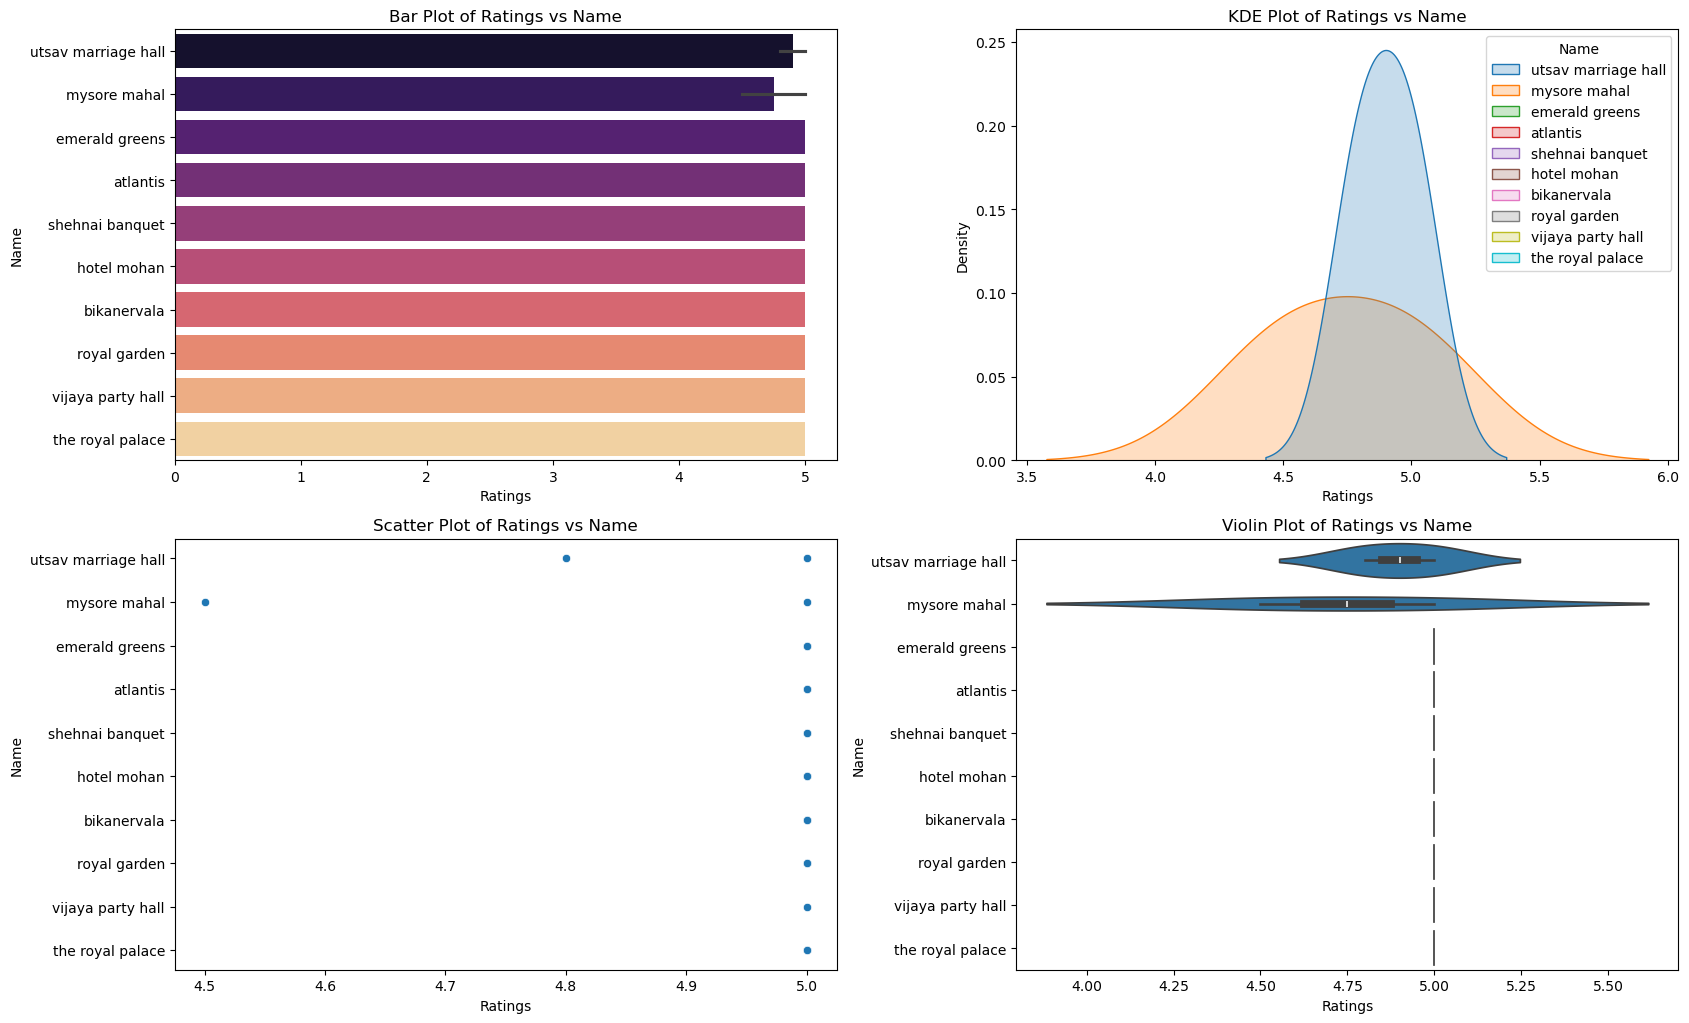

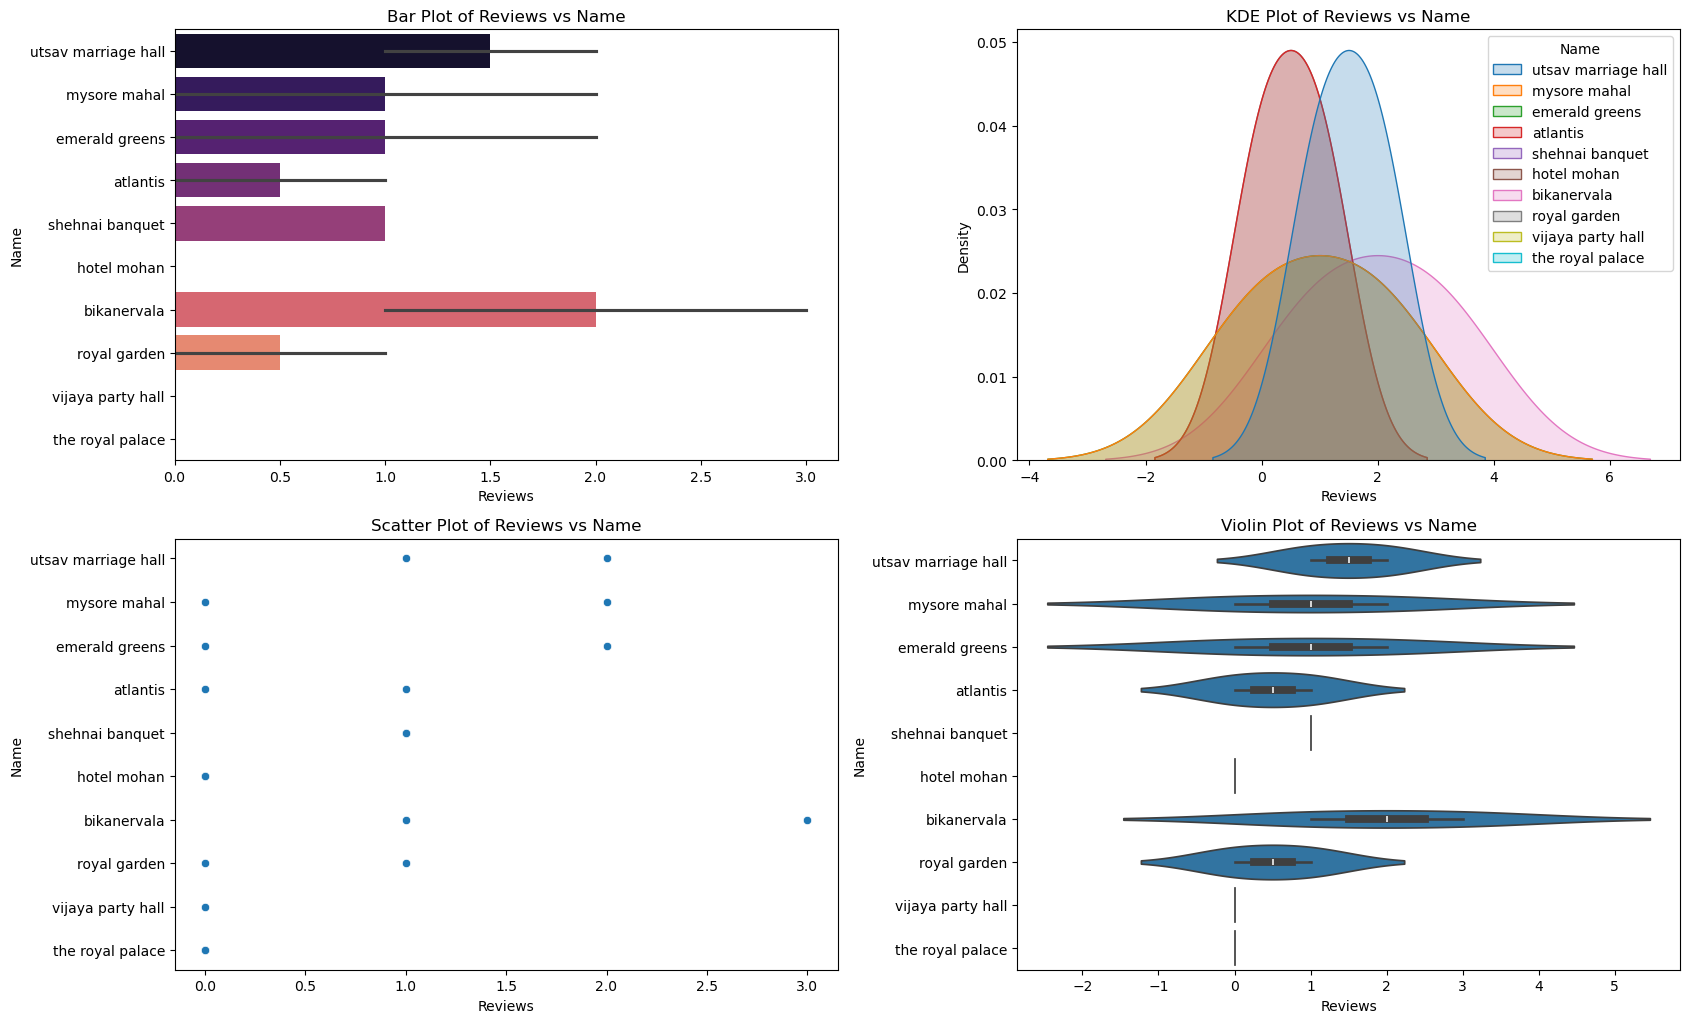

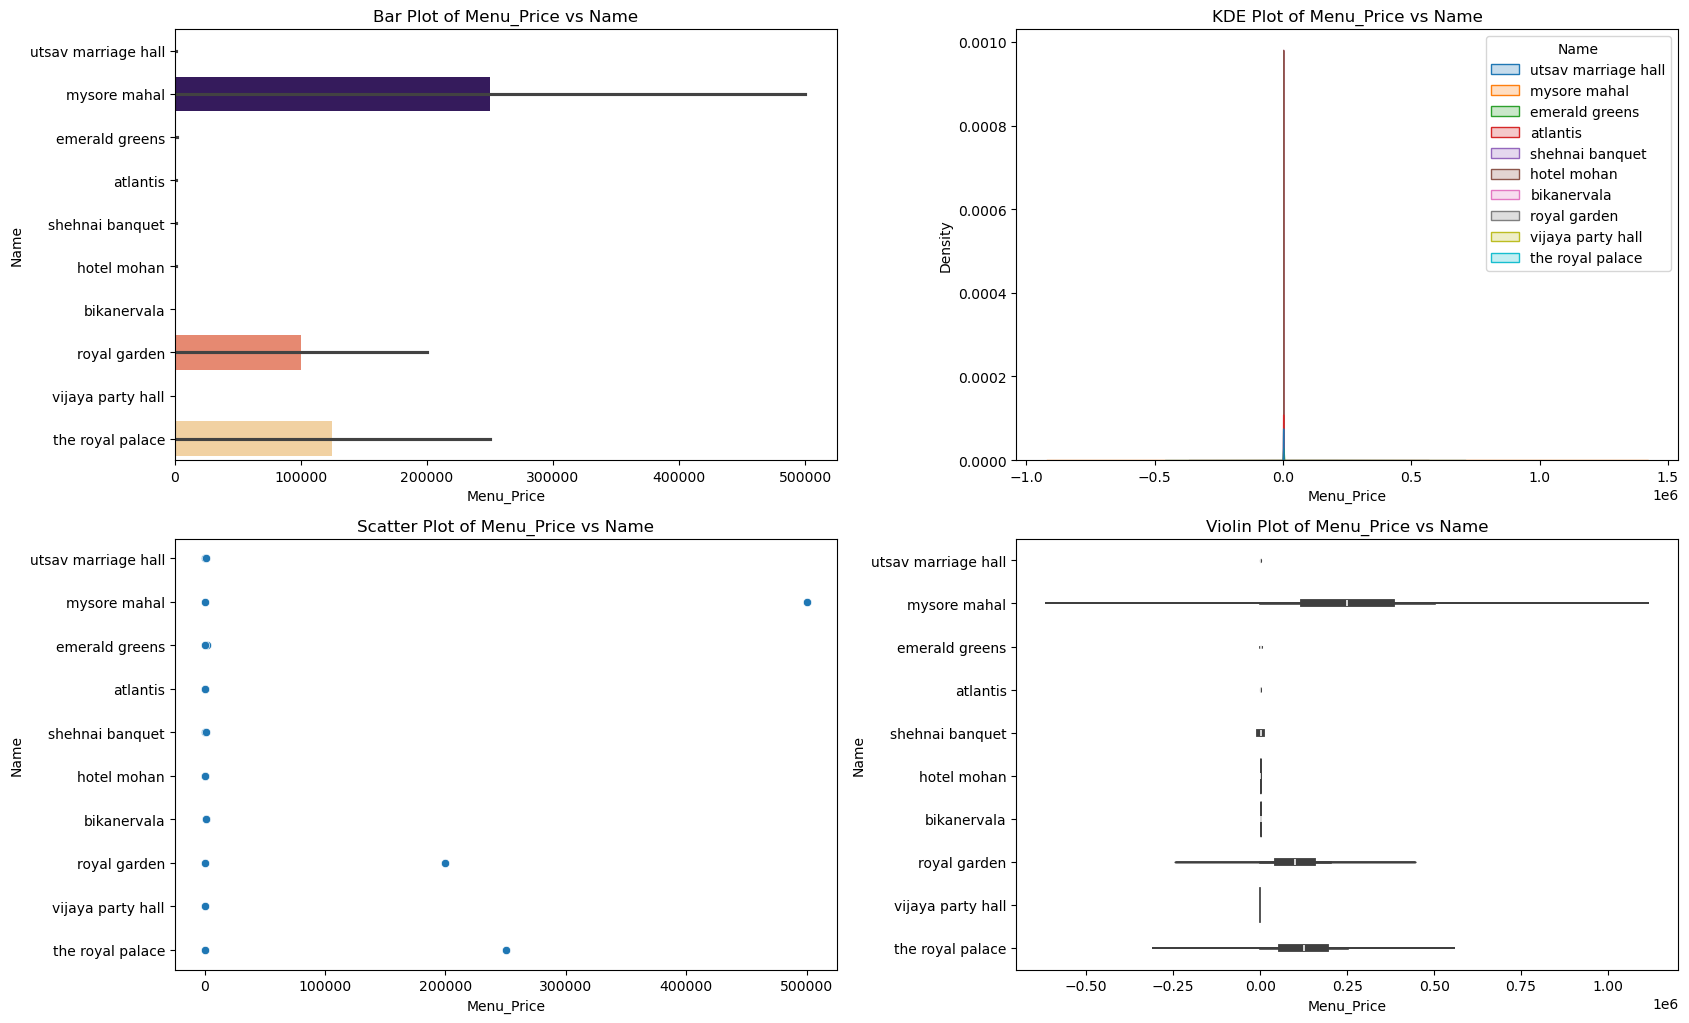

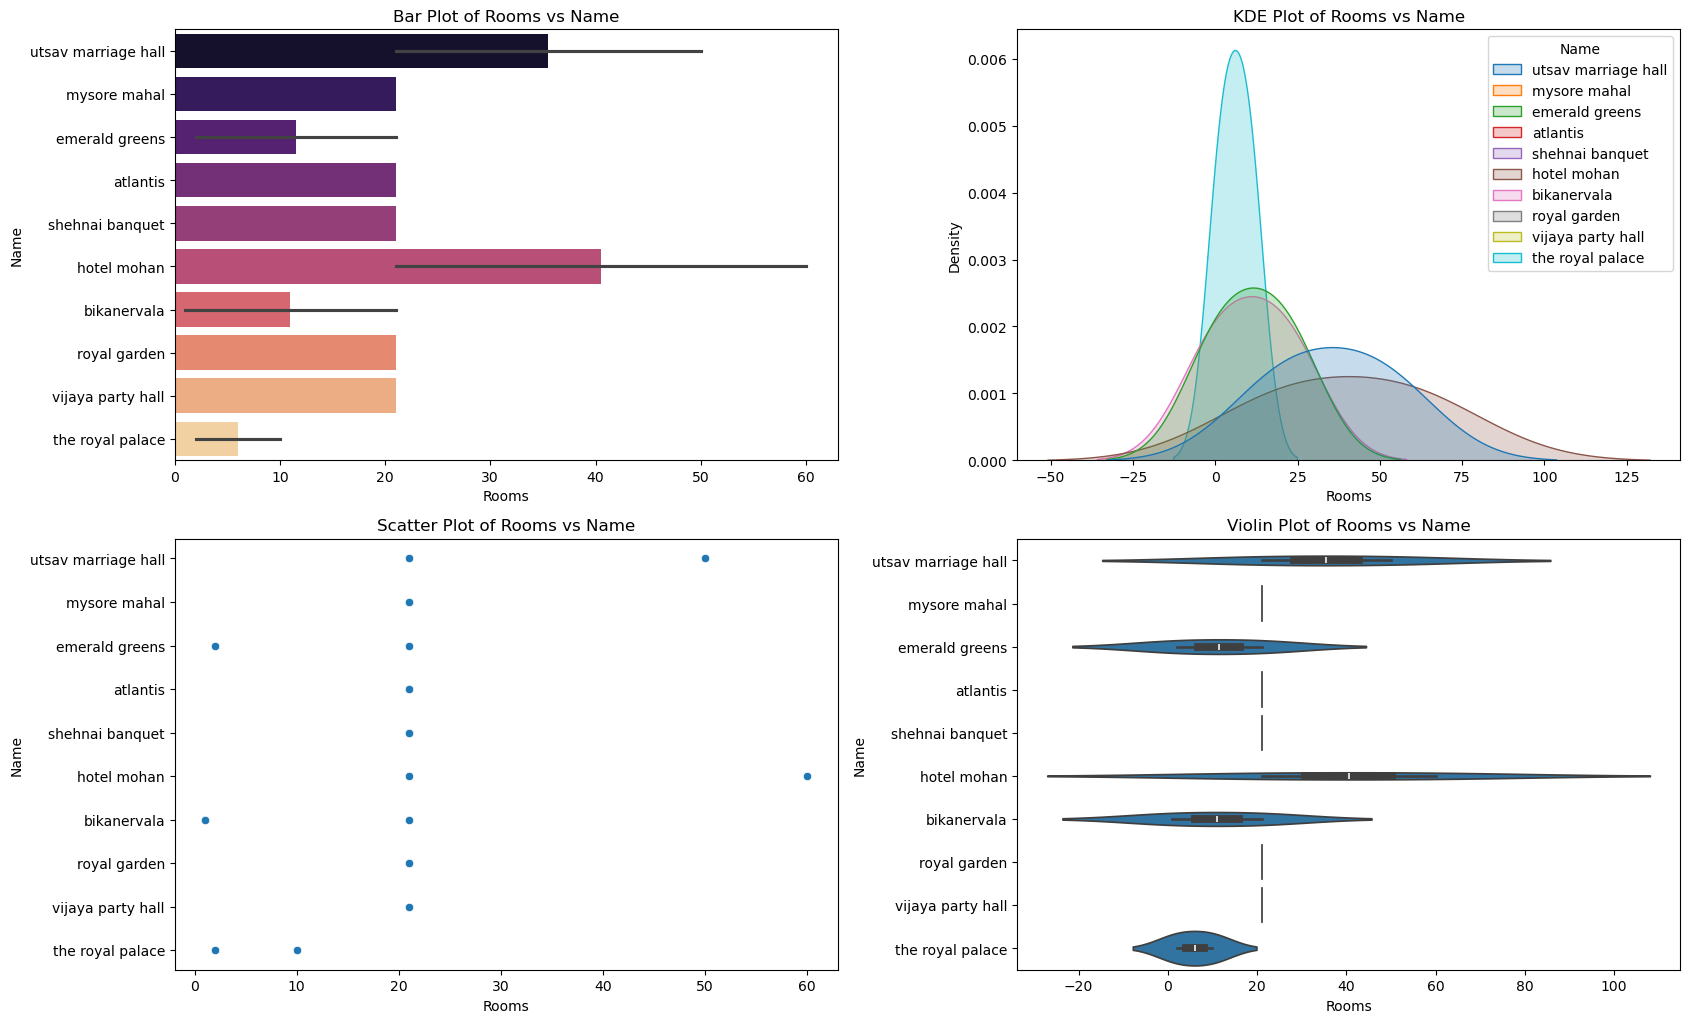

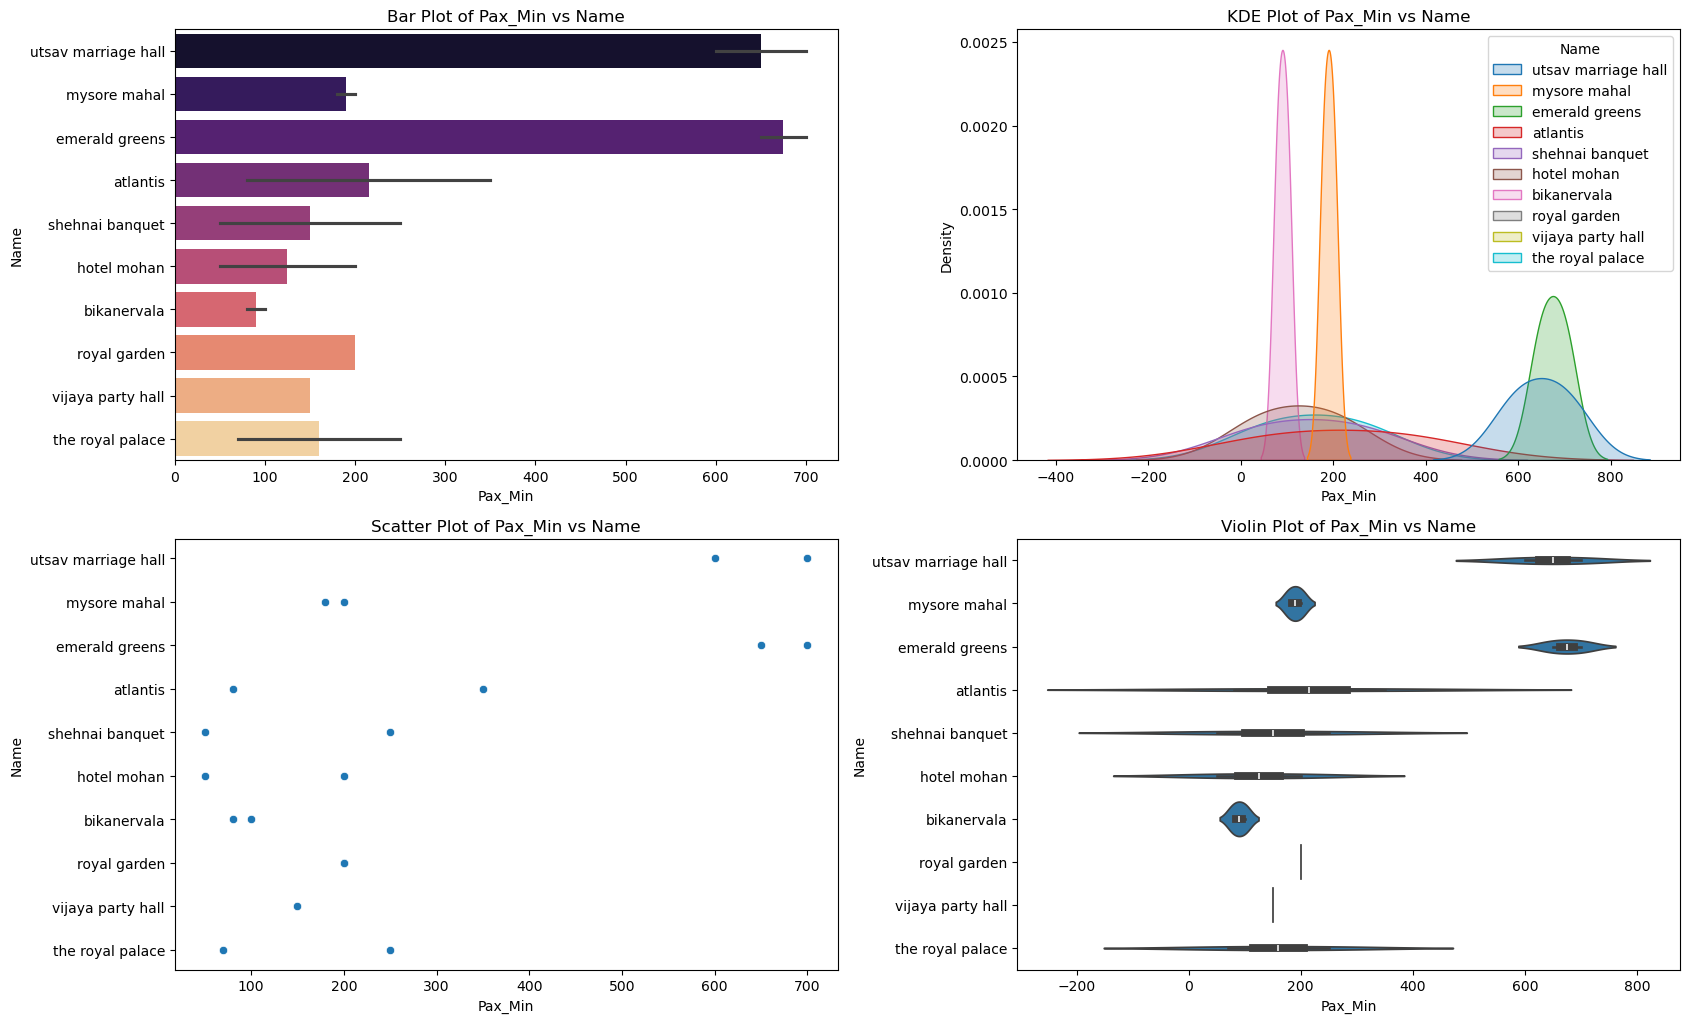

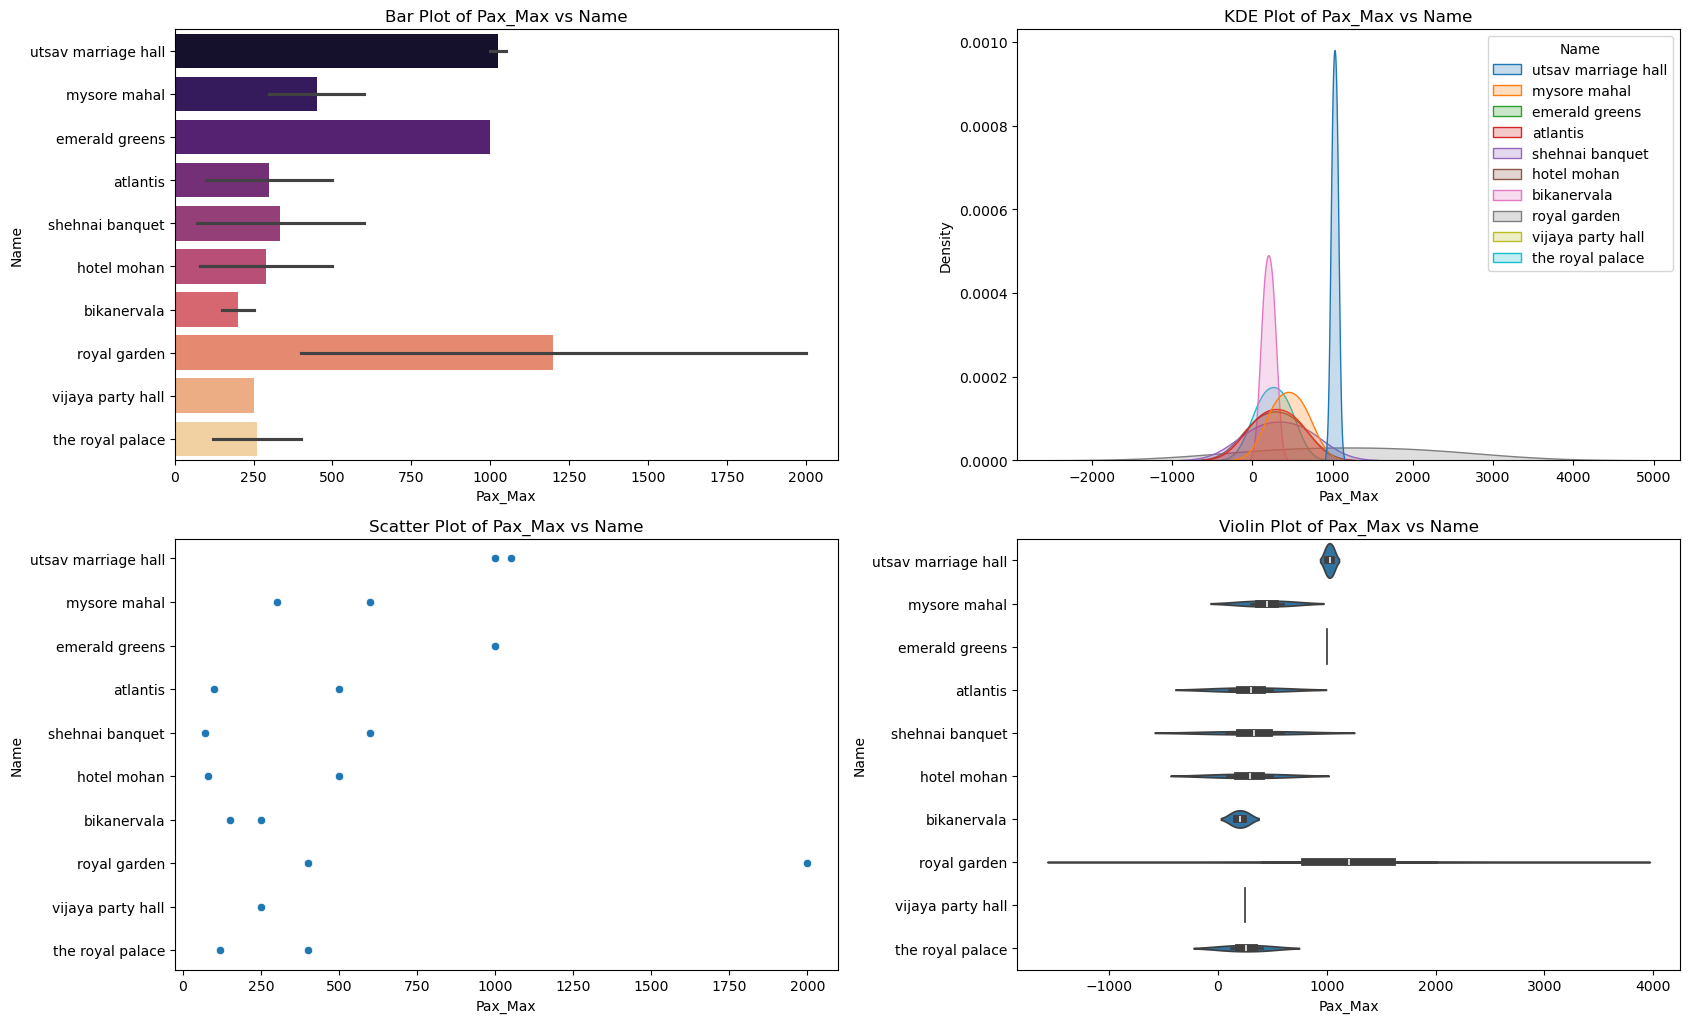

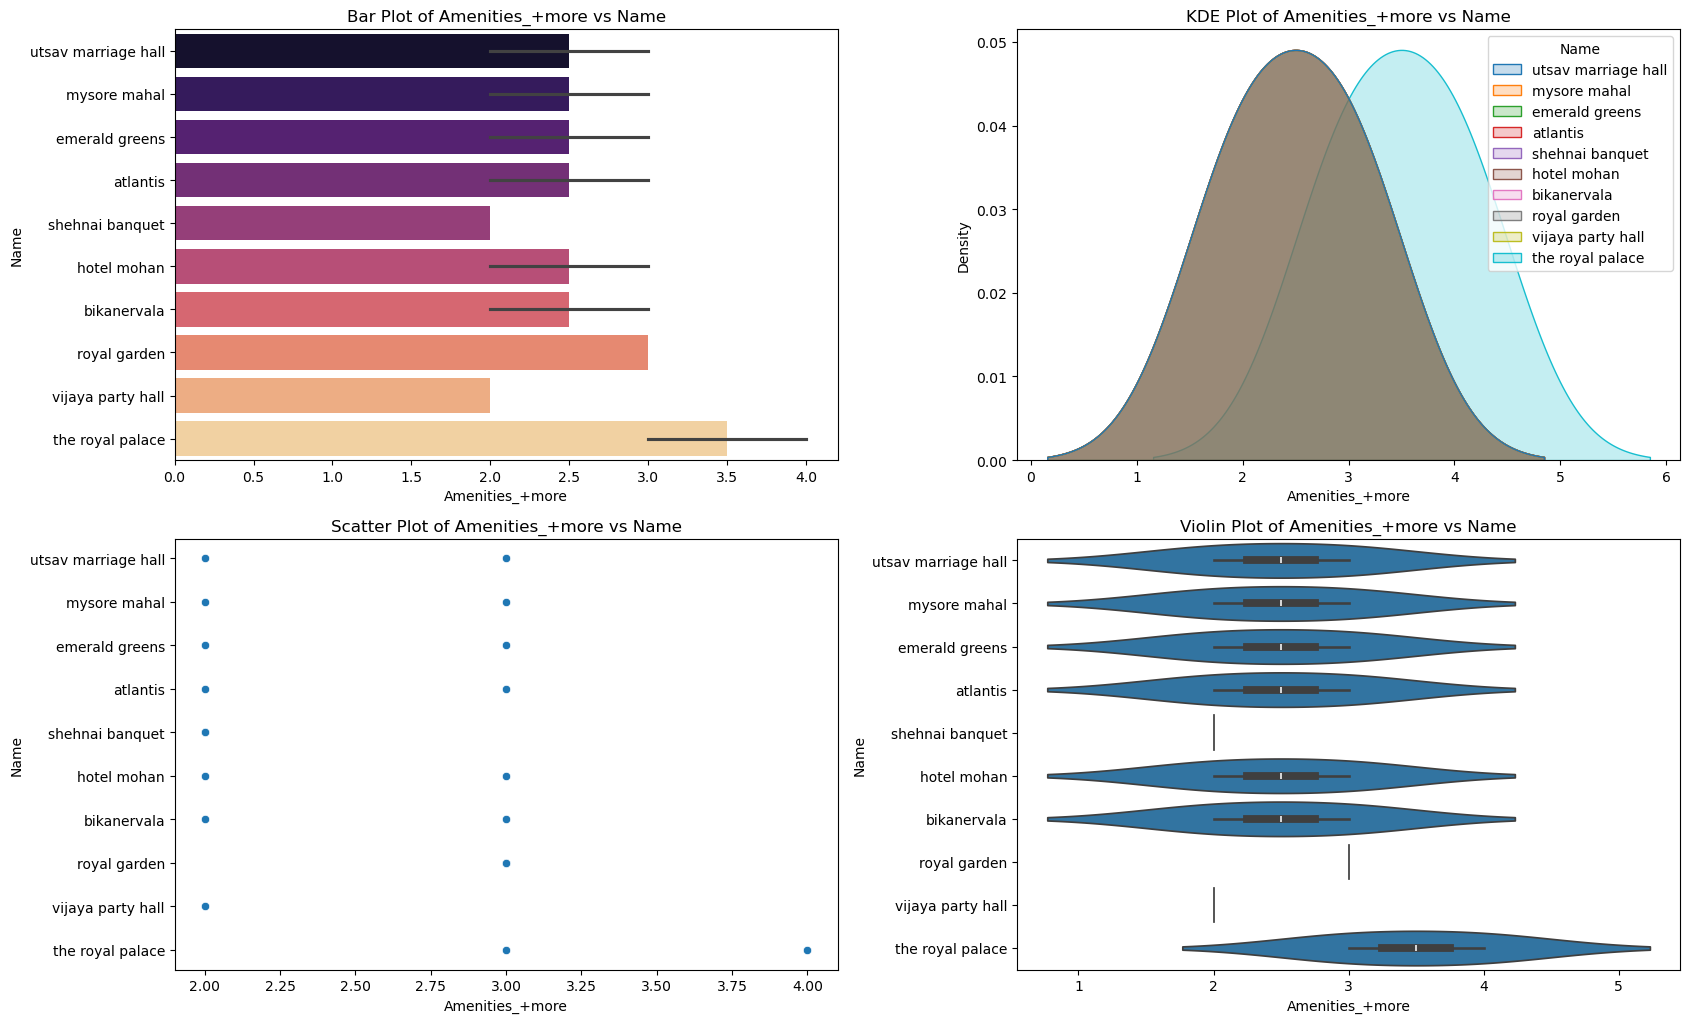

In [35]:
cat_num(df2, num_df2, "Name")

                                                        mean  median  min  max
Type                                                                          
3 star hotels with banquets                         5.000000    5.00  5.0  5.0
3 star hotels with banquets, convention / funct...  5.000000    5.00  5.0  5.0
3 star hotels with banquets, destination weddin...  4.937500    5.00  4.5  5.0
3 star hotels with banquets, party restaurants ...  5.000000    5.00  5.0  5.0
3 star hotels with banquets, small function / p...  4.988889    5.00  4.8  5.0
3 star hotels with banquets, venues with rooms      4.916667    5.00  4.5  5.0
4 star & above wedding hotels, 3 star hotels wi...  5.000000    5.00  5.0  5.0
4 star & above wedding hotels, banquet halls        4.931884    5.00  4.5  5.0
4 star & above wedding hotels, destination wedd...  4.500000    4.50  4.5  4.5
4 star & above wedding hotels, marriage garden ...  5.000000    5.00  5.0  5.0
4 star & above wedding hotels, venues with rooms    

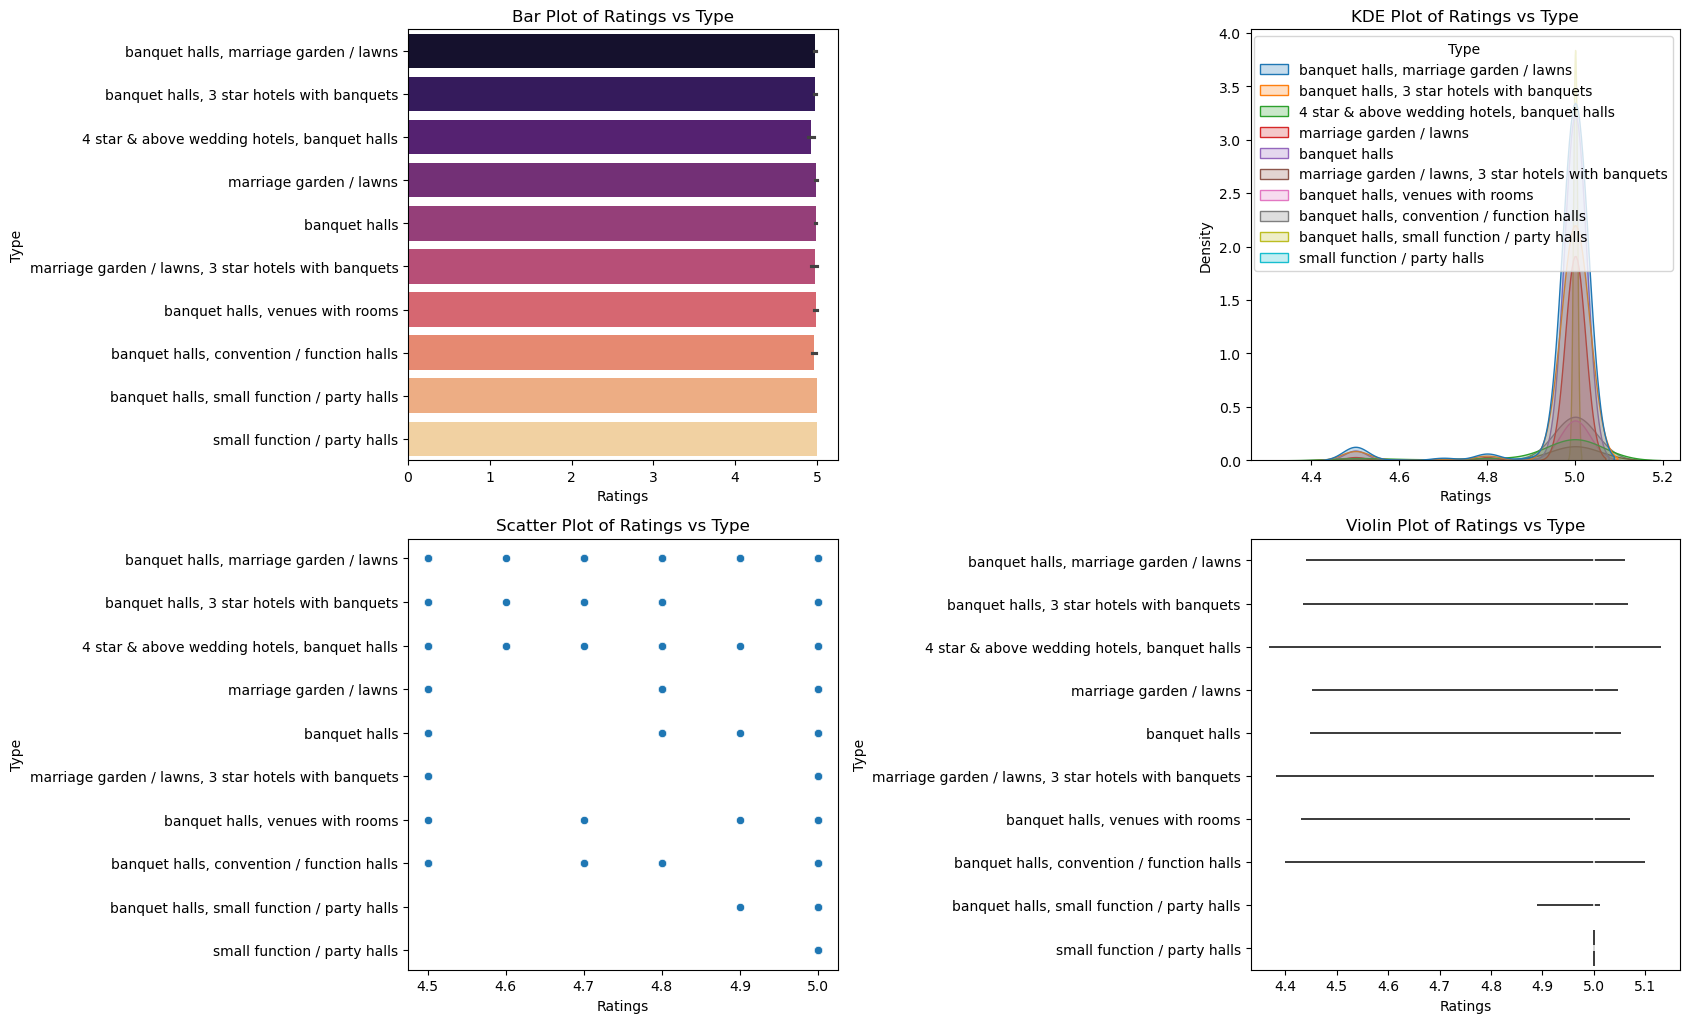

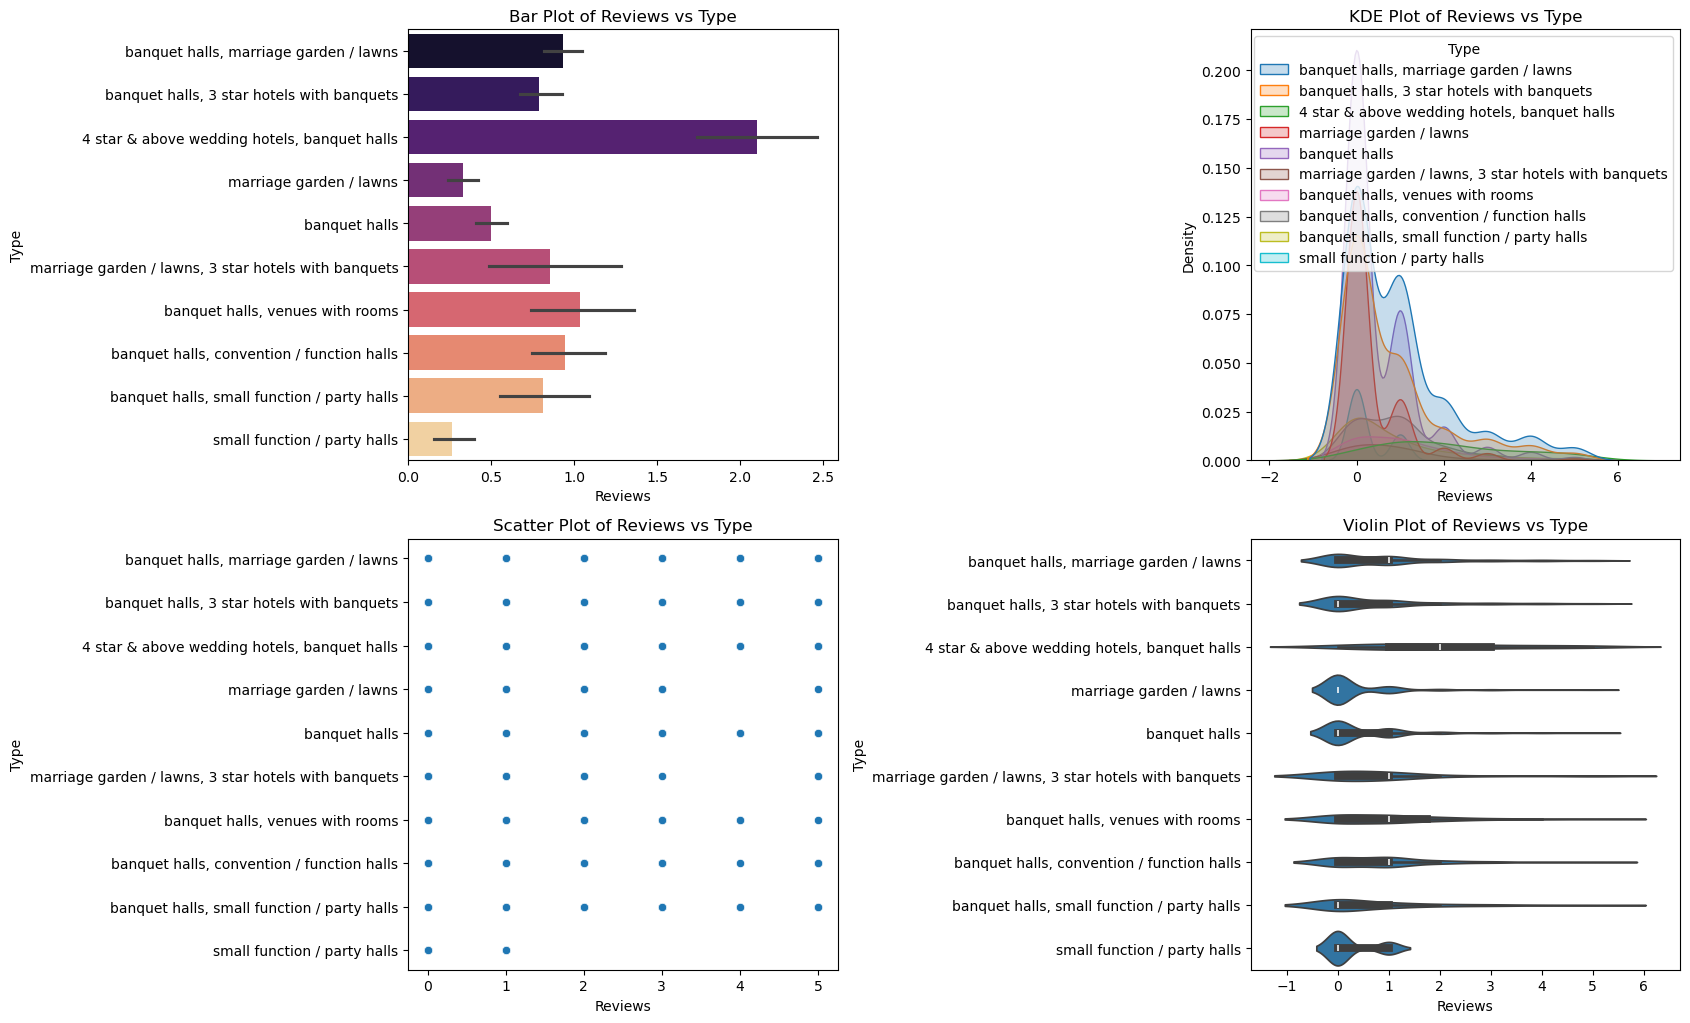

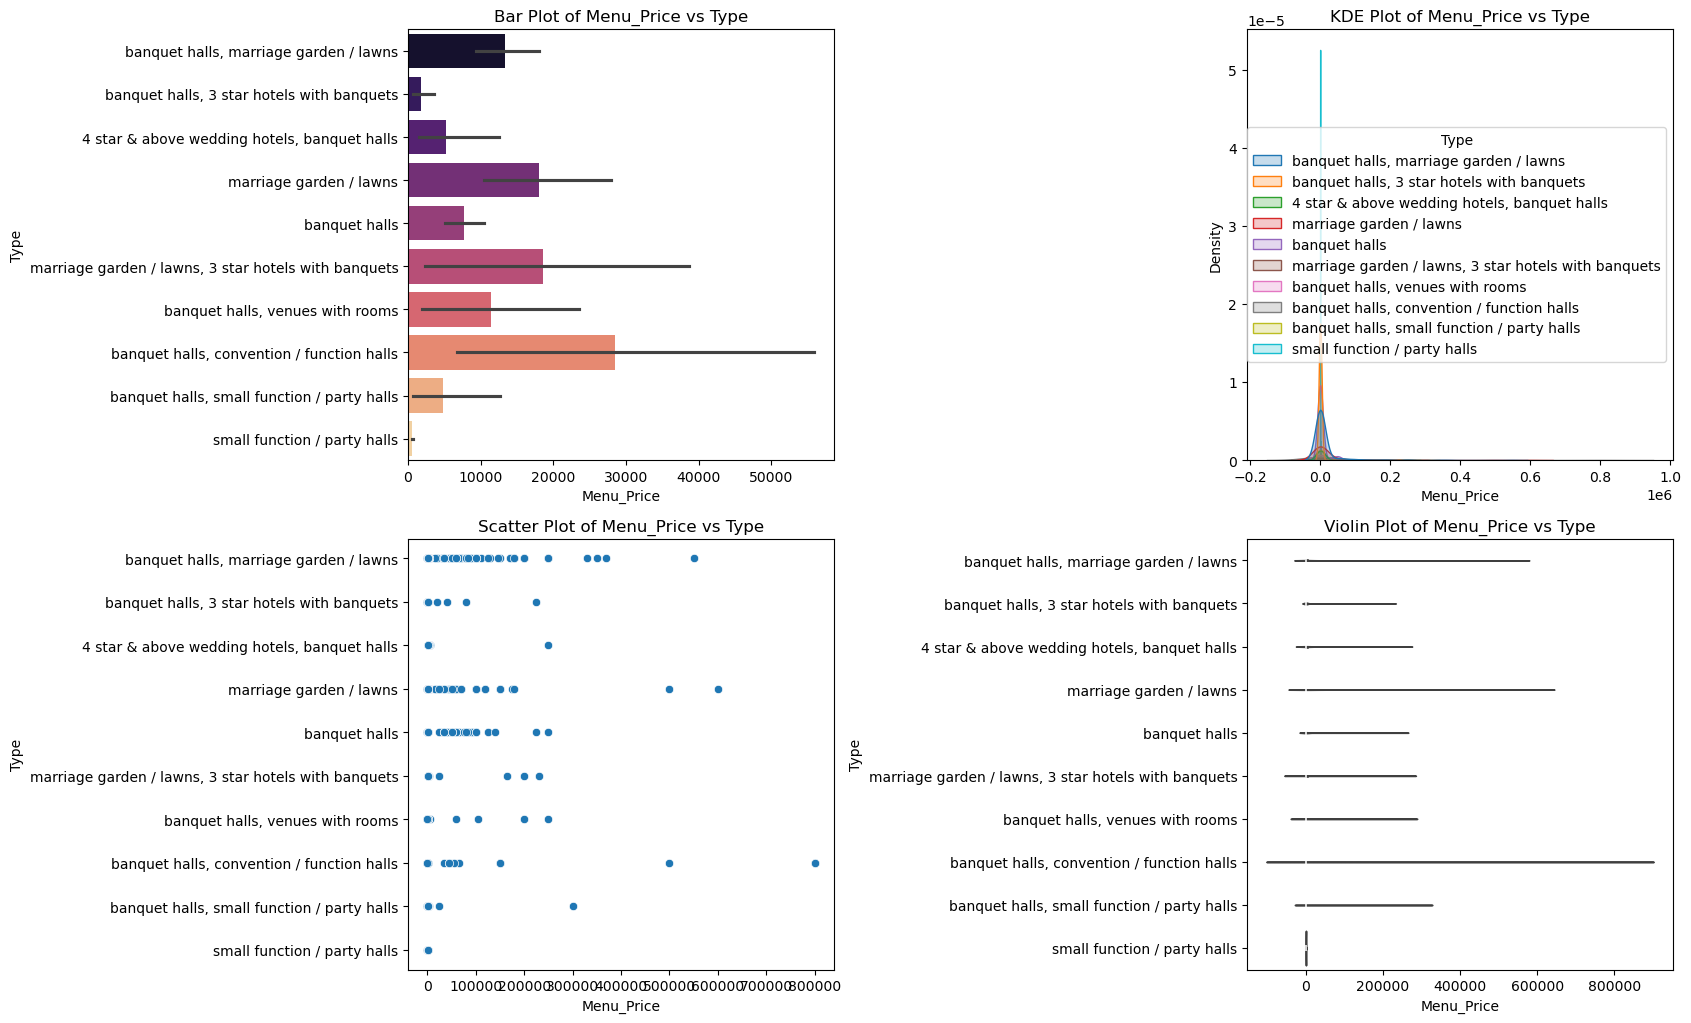

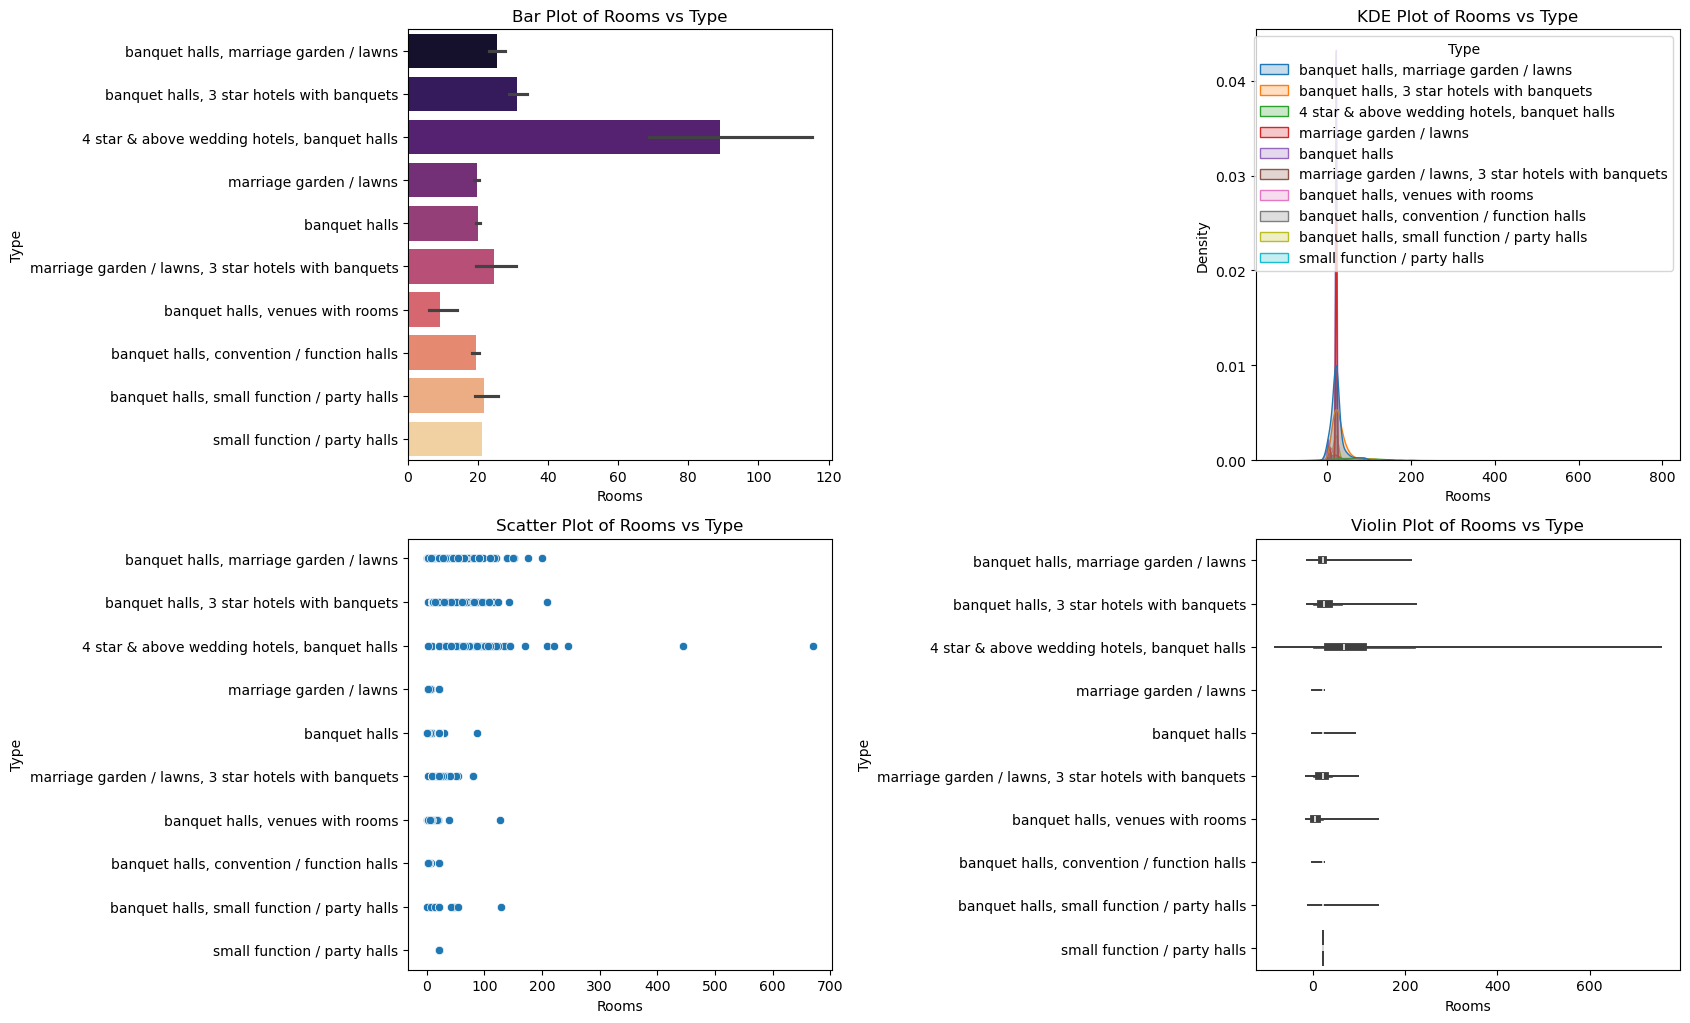

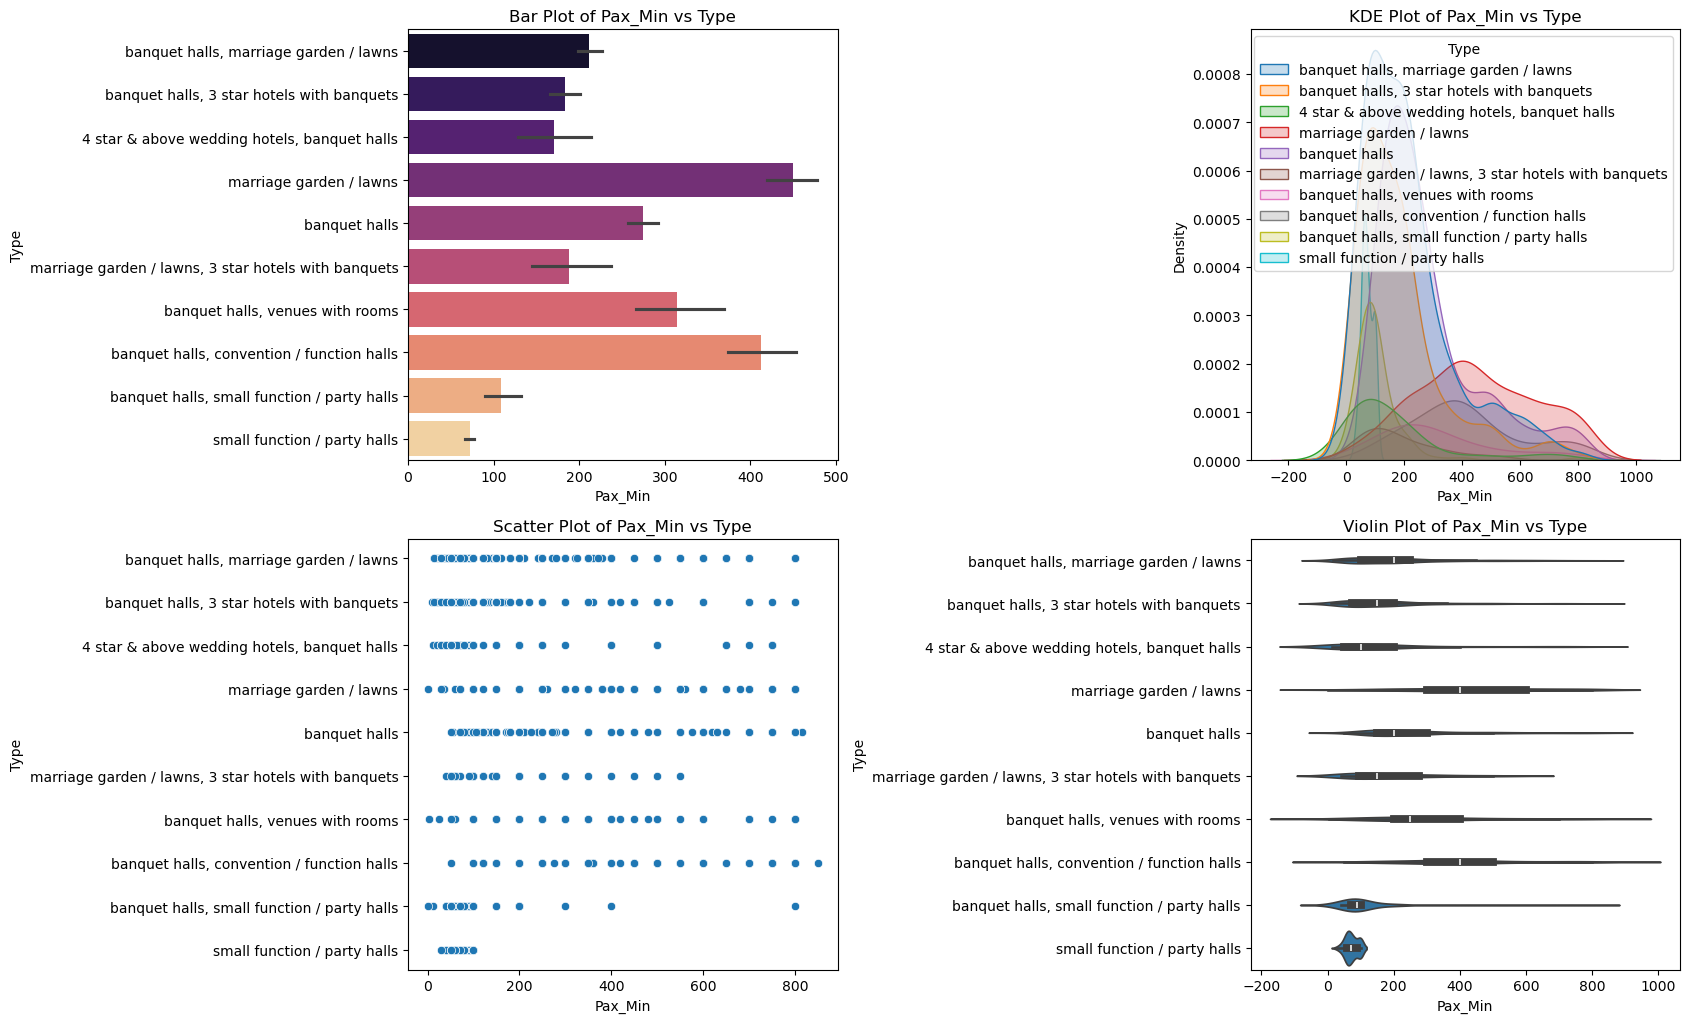

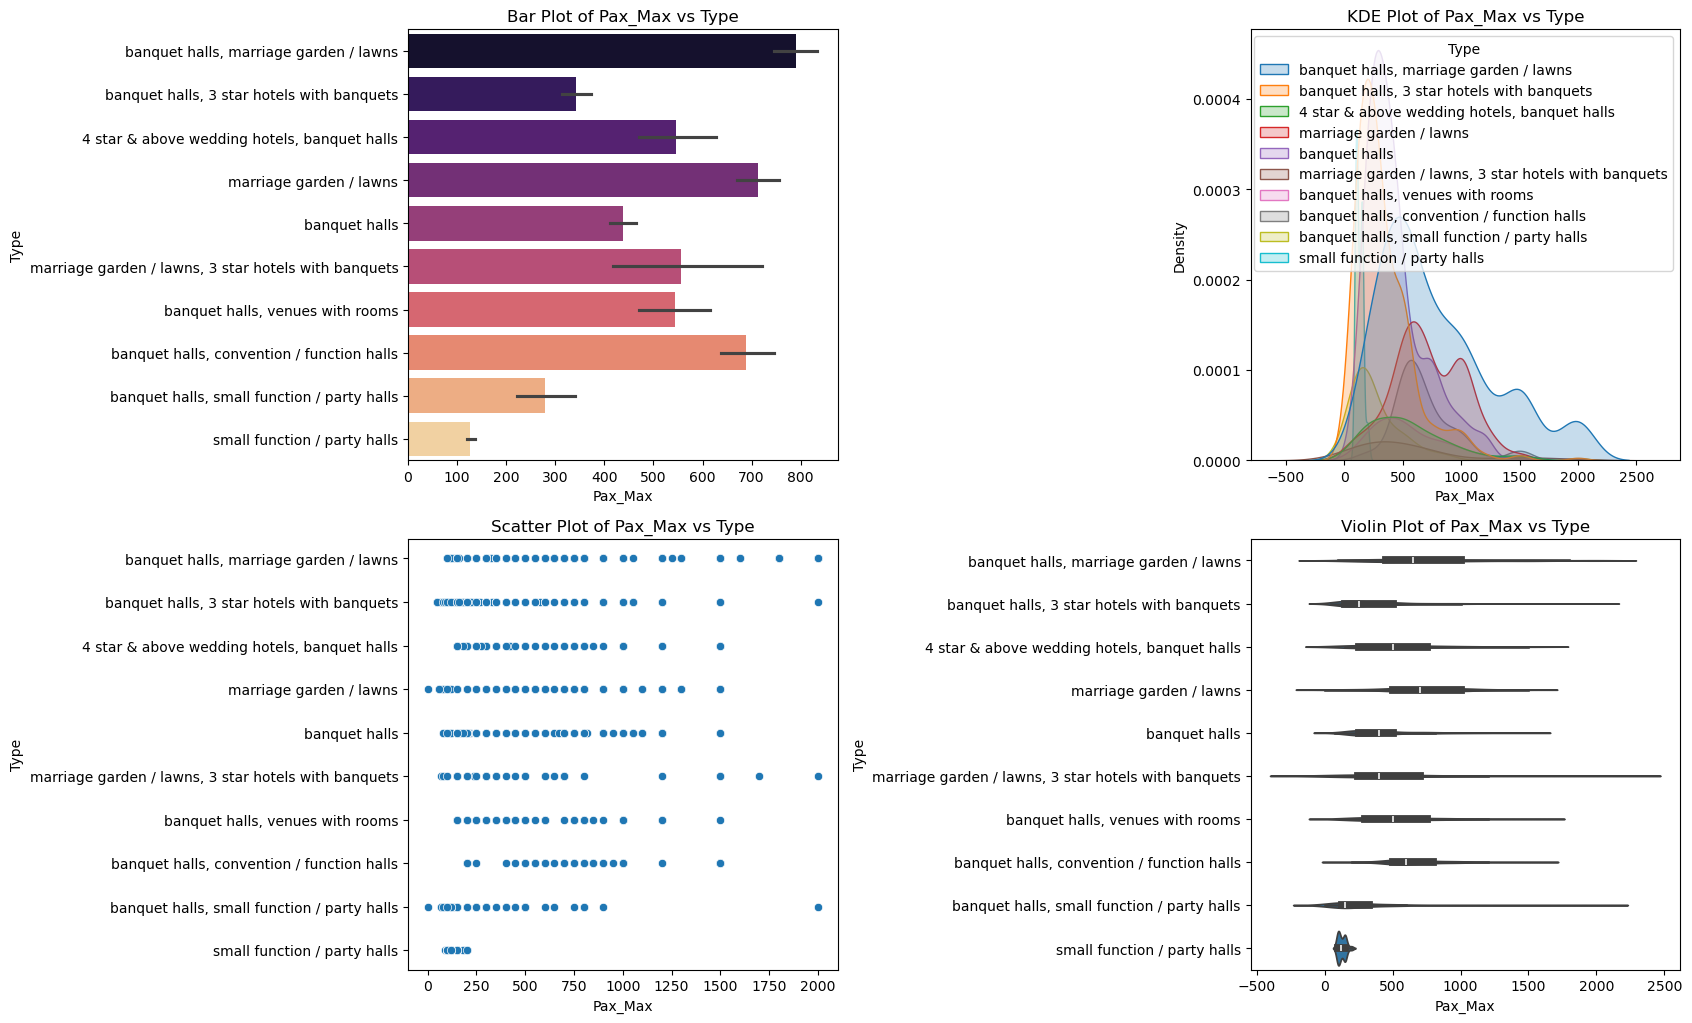

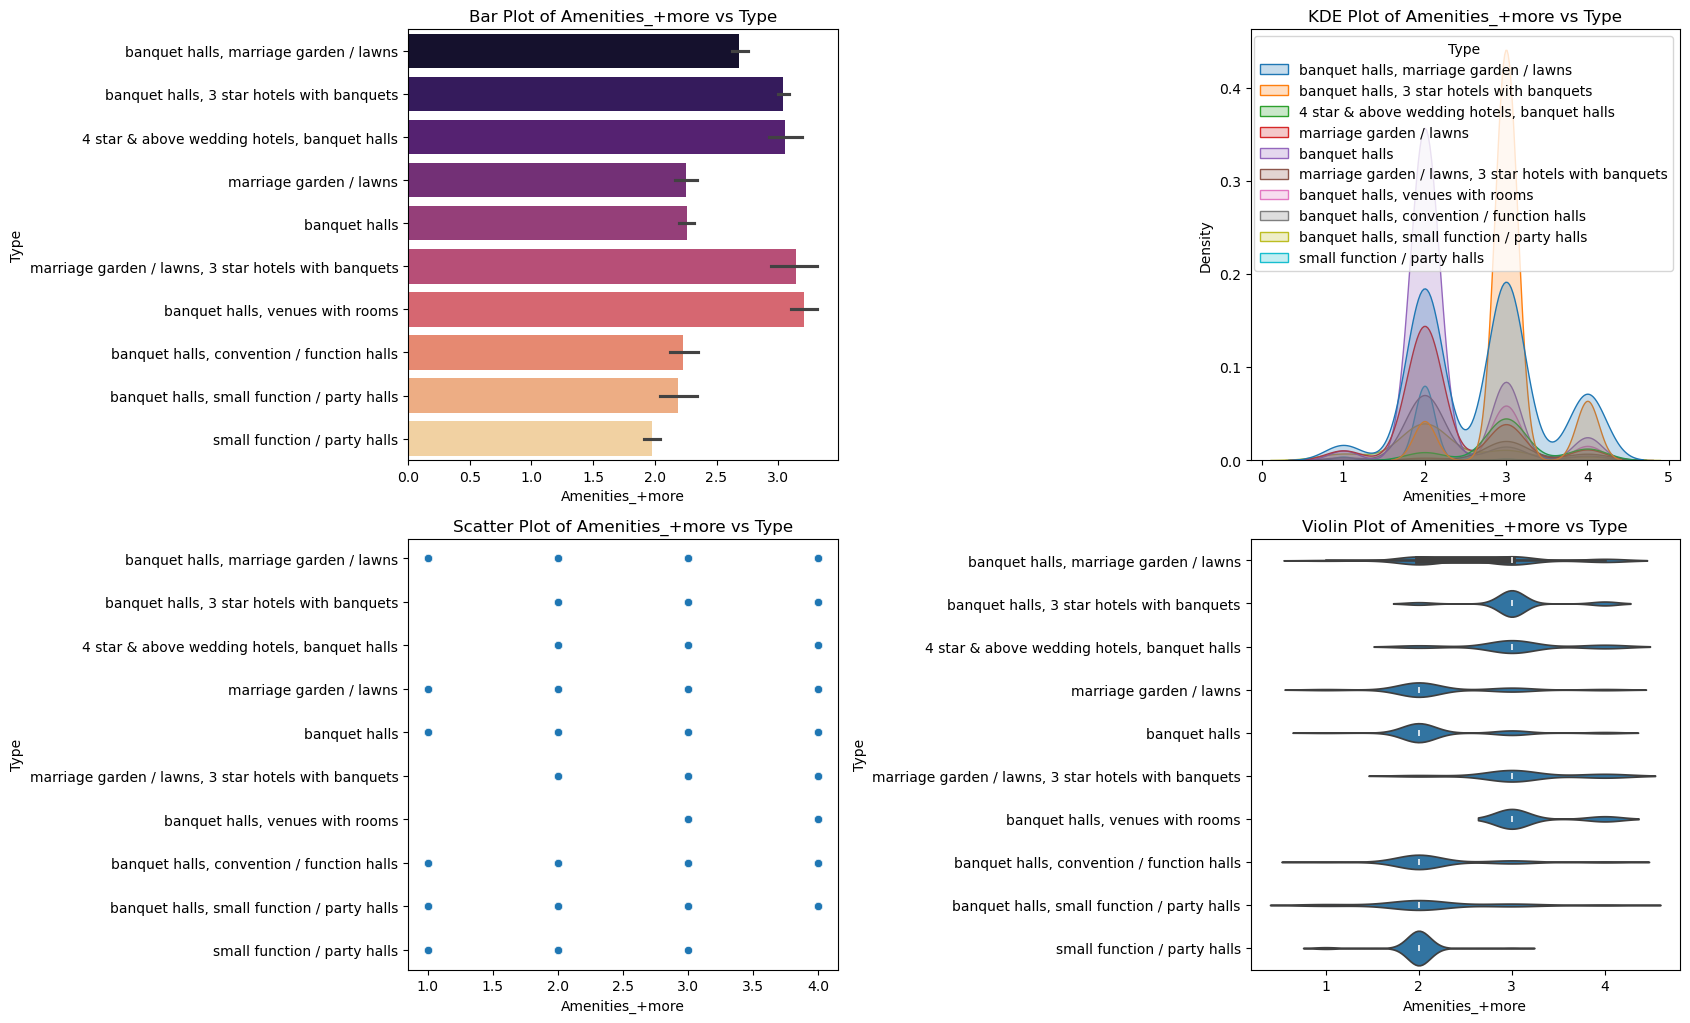

In [36]:
cat_num(df2, num_df2, "Type")

                 mean  median  min  max
Destination                            
chennai      4.984069     5.0  4.5  5.0
jaipur       4.974515     5.0  4.5  5.0
lucknow      4.987345     5.0  4.5  5.0
ncr          4.964848     5.0  4.5  5.0
pune         4.977005     5.0  4.5  5.0
                 mean  median  min  max
Destination                            
chennai      0.661765     0.0    0    5
jaipur       0.682039     0.0    0    5
lucknow      0.384615     0.0    0    5
ncr          1.639394     1.0    0    5
pune         0.649733     0.0    0    5
                     mean  median    min       max
Destination                                       
chennai       7131.899510   400.0   80.0  300000.0
jaipur       17427.713592   650.0  175.0  800000.0
lucknow       8403.483871   700.0  150.0  250000.0
ncr           5650.500000  1000.0  300.0  200000.0
pune          9914.901070   572.5  100.0  500000.0
                  mean  median  min  max
Destination                             
c

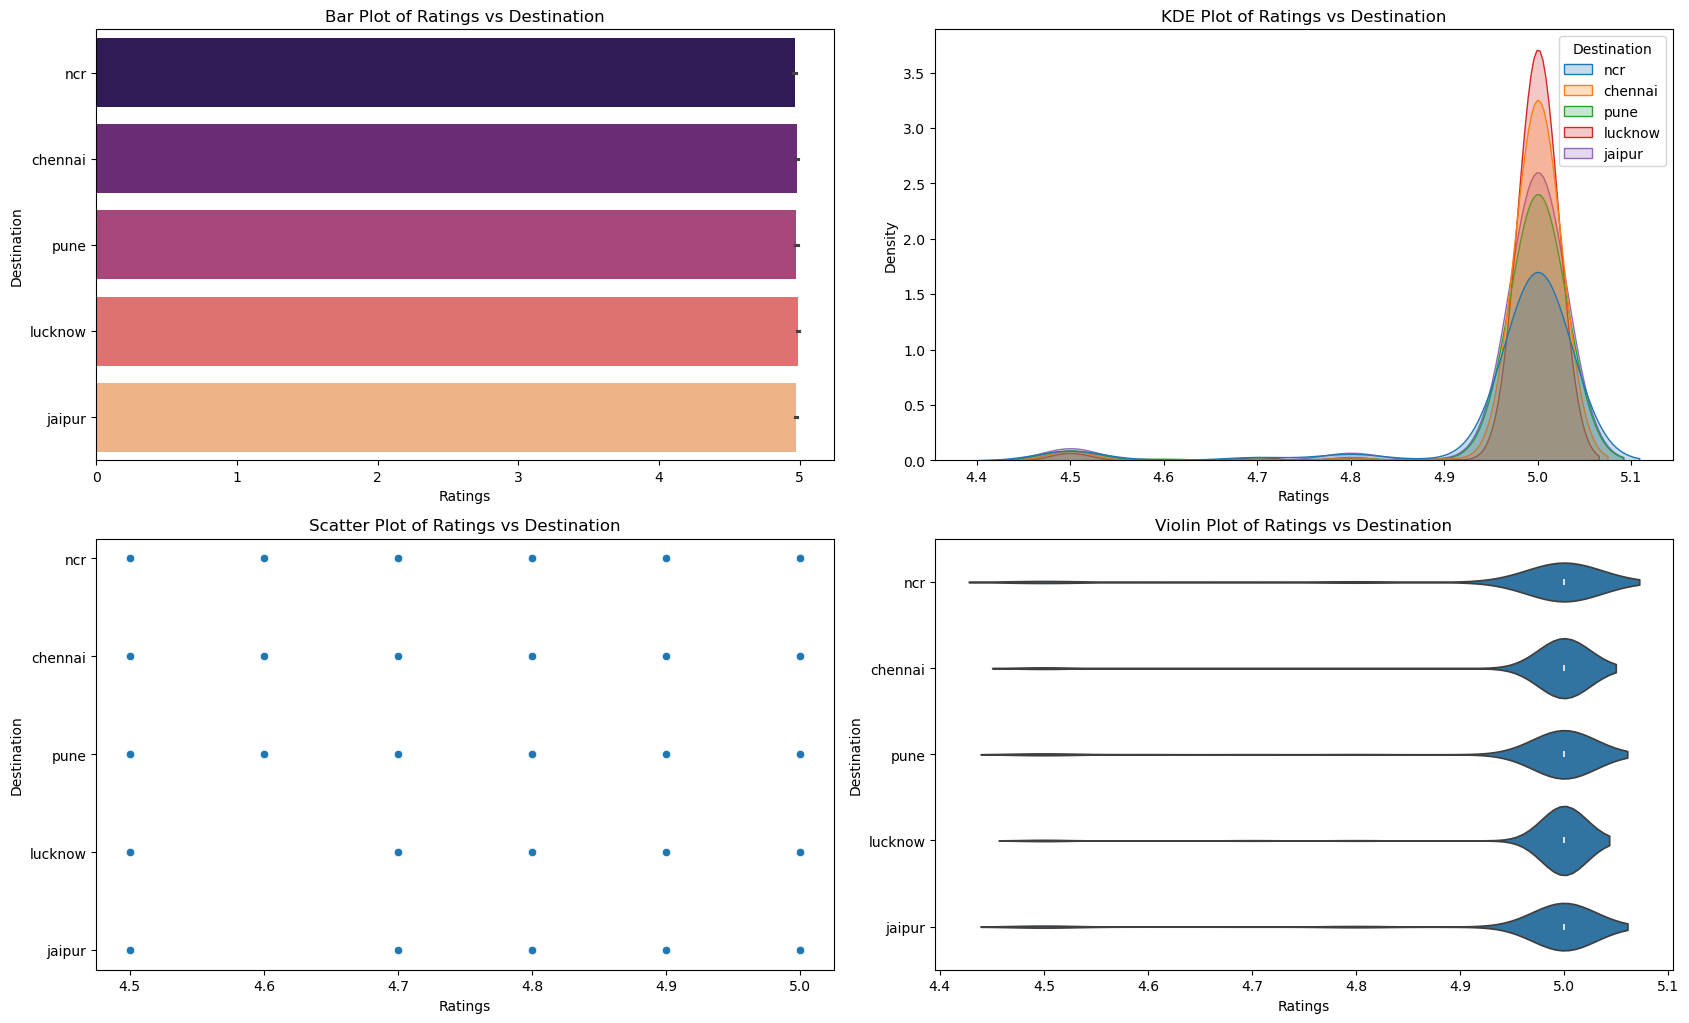

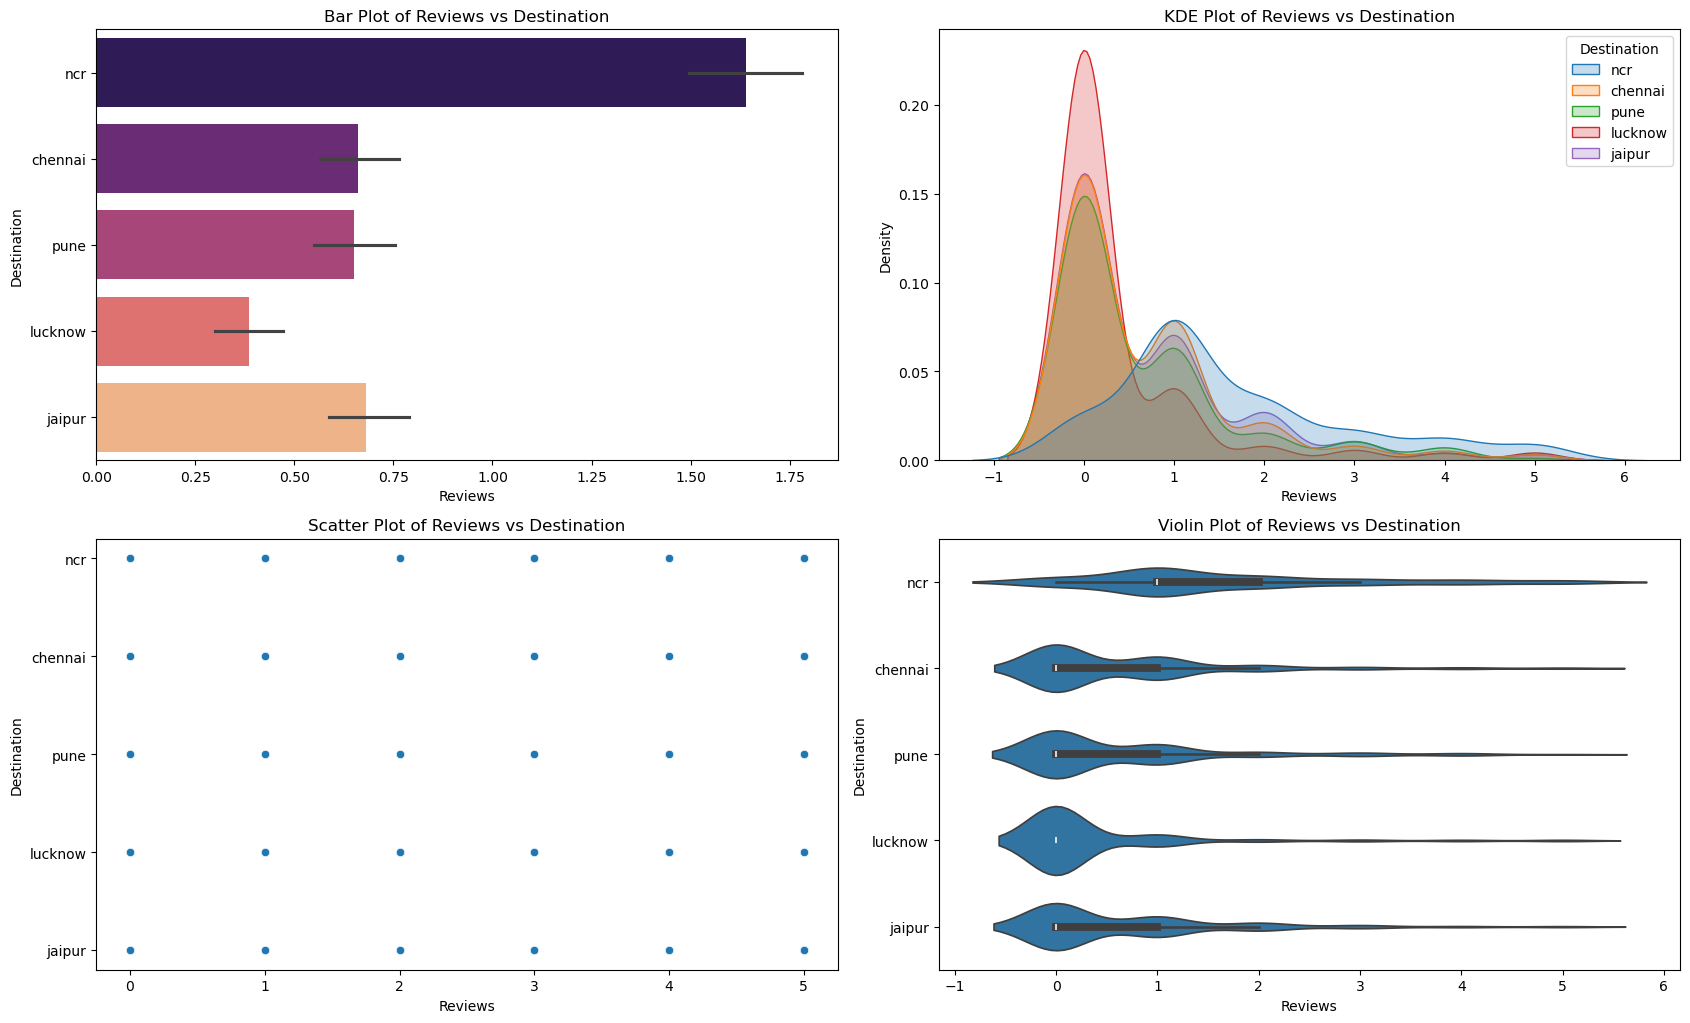

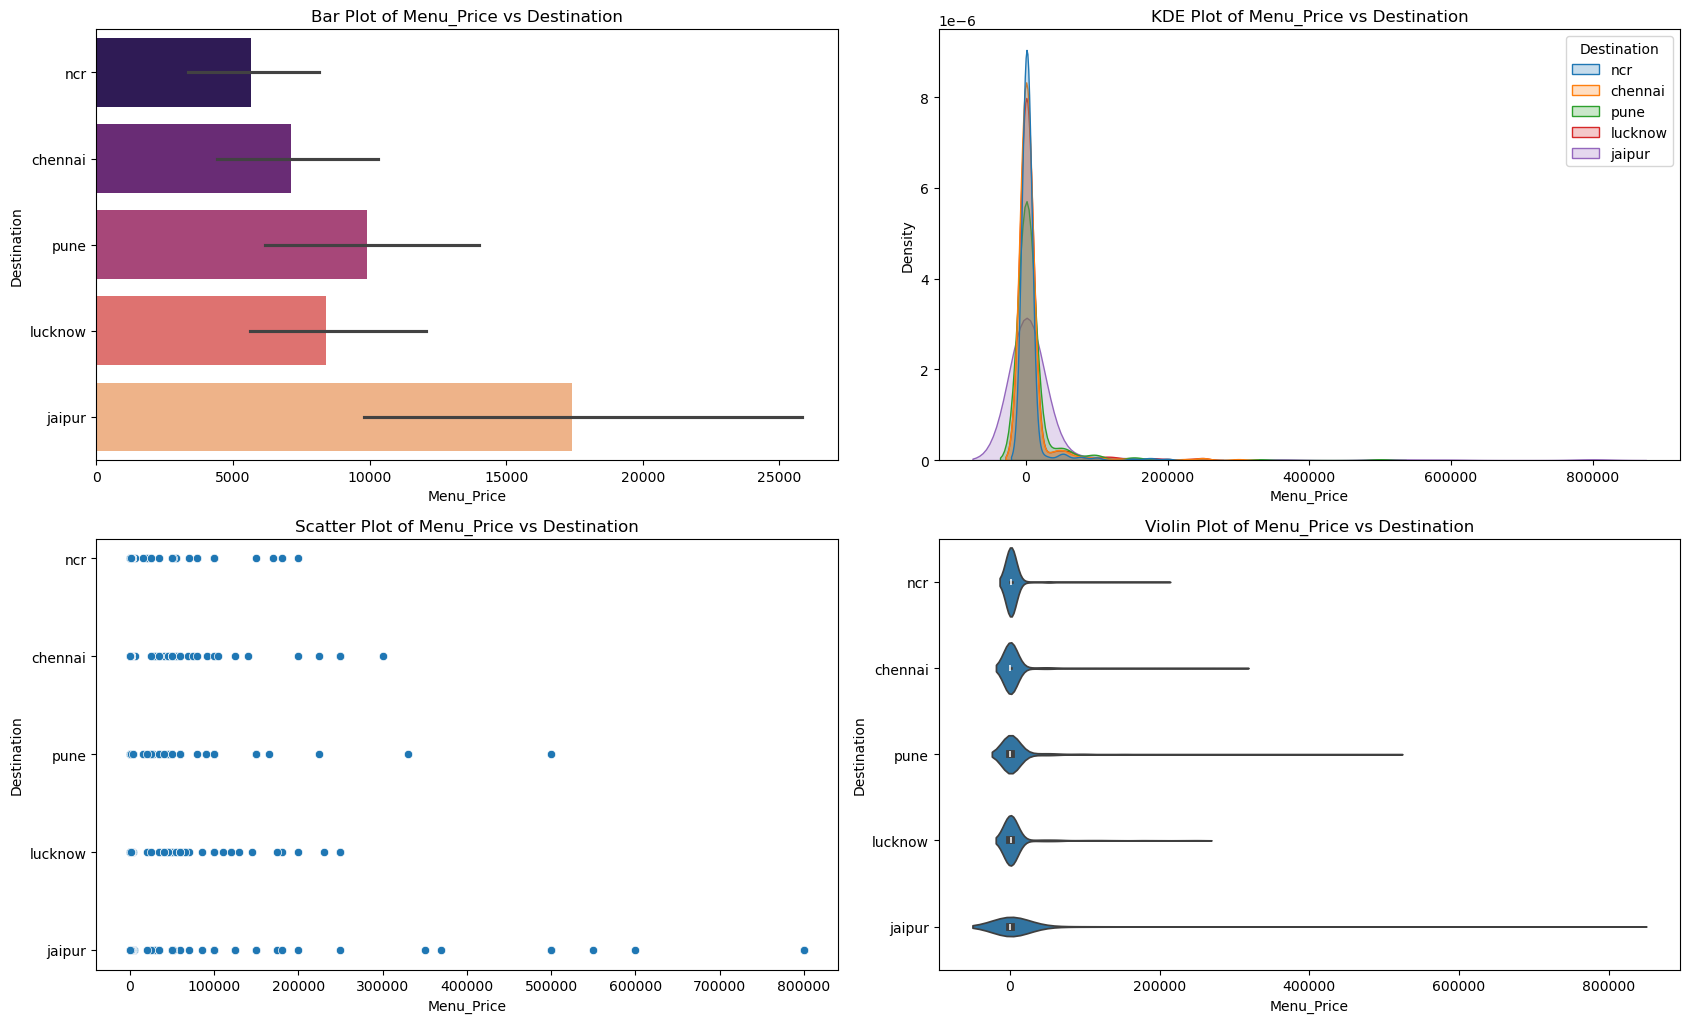

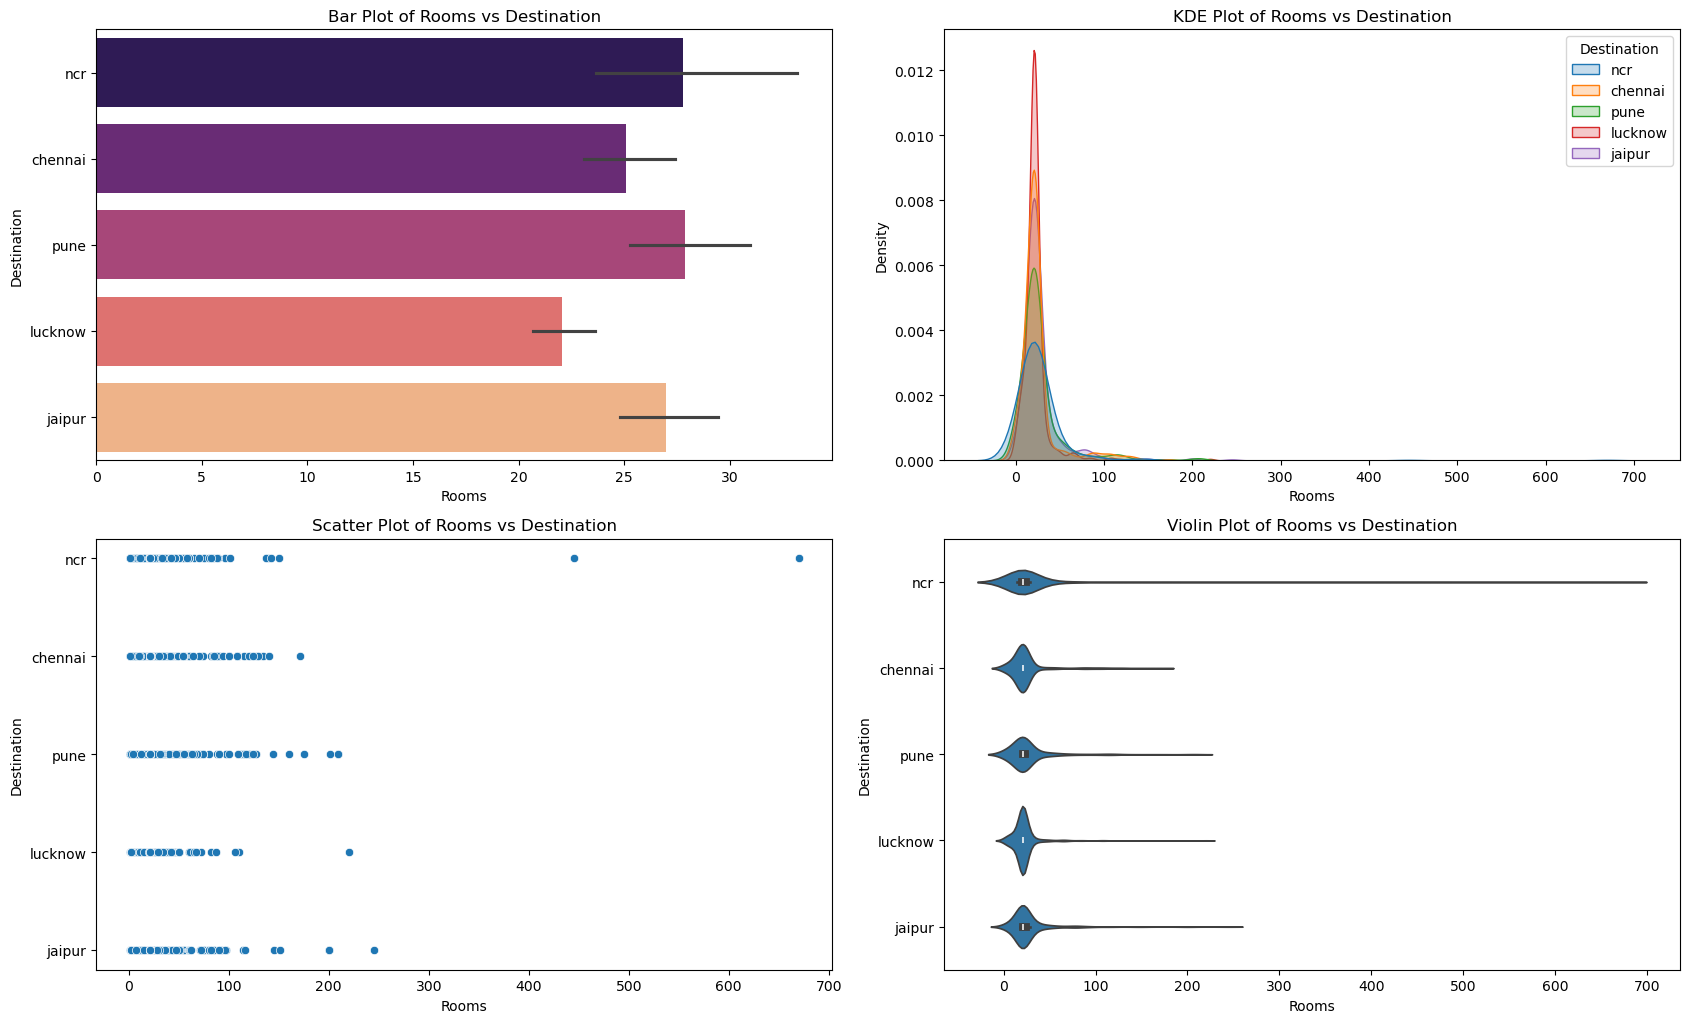

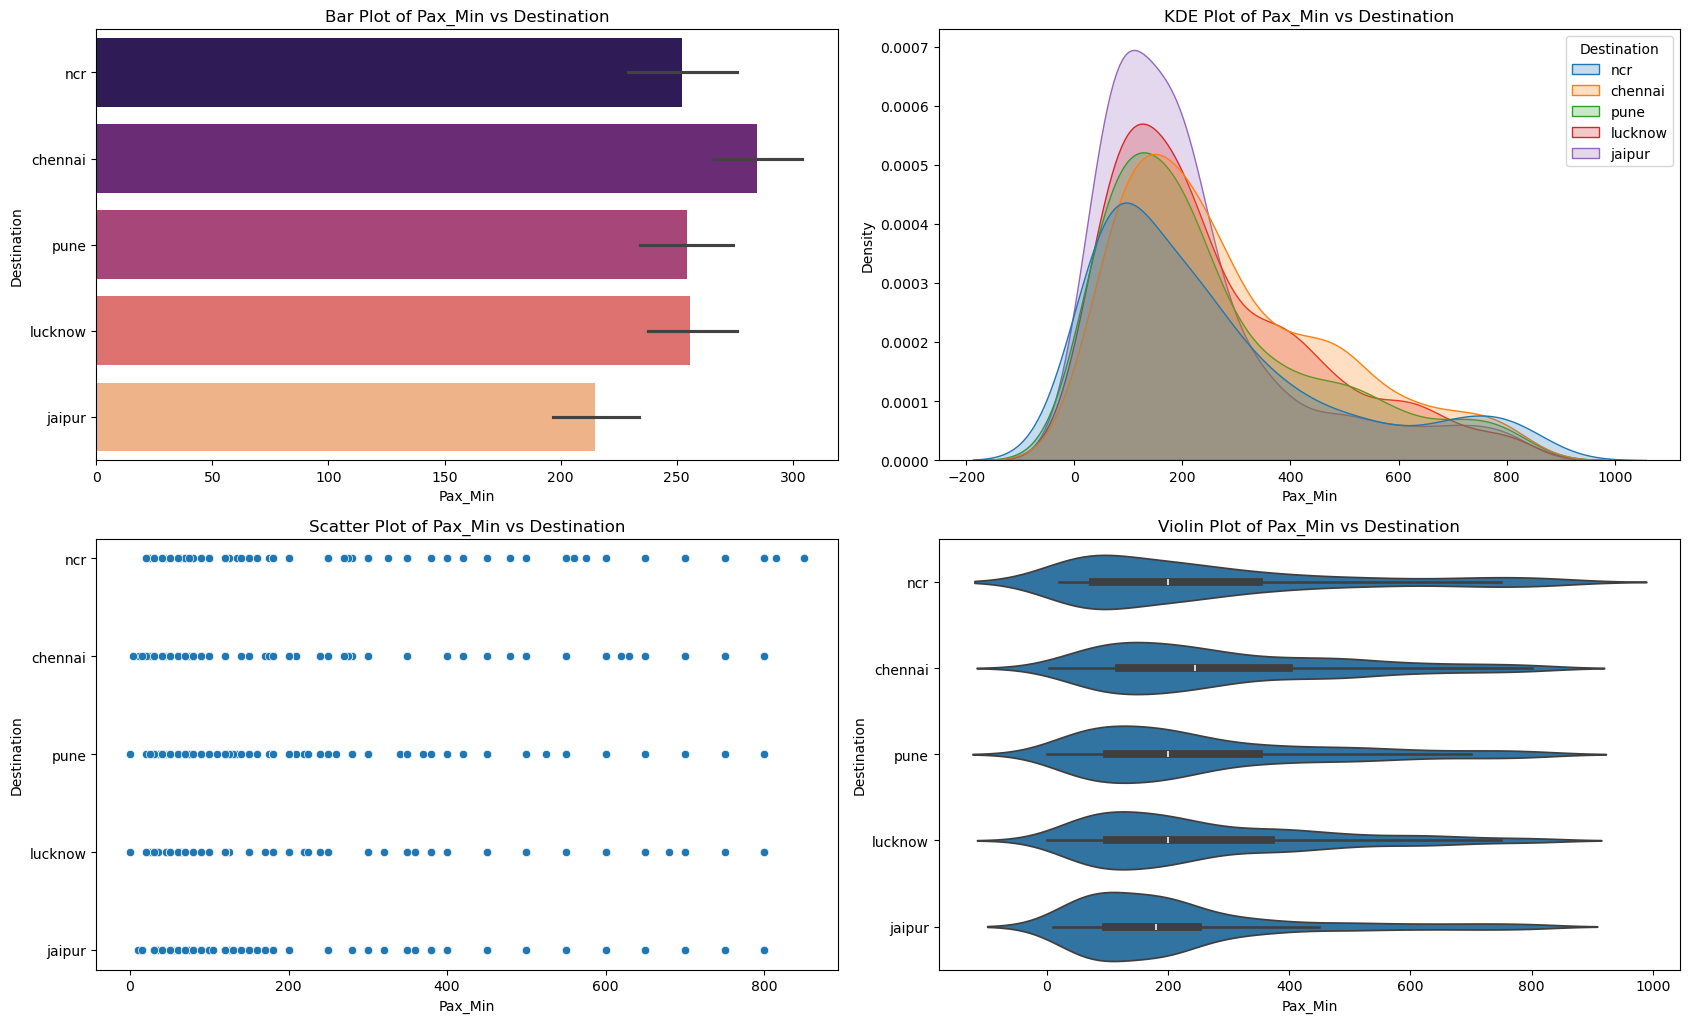

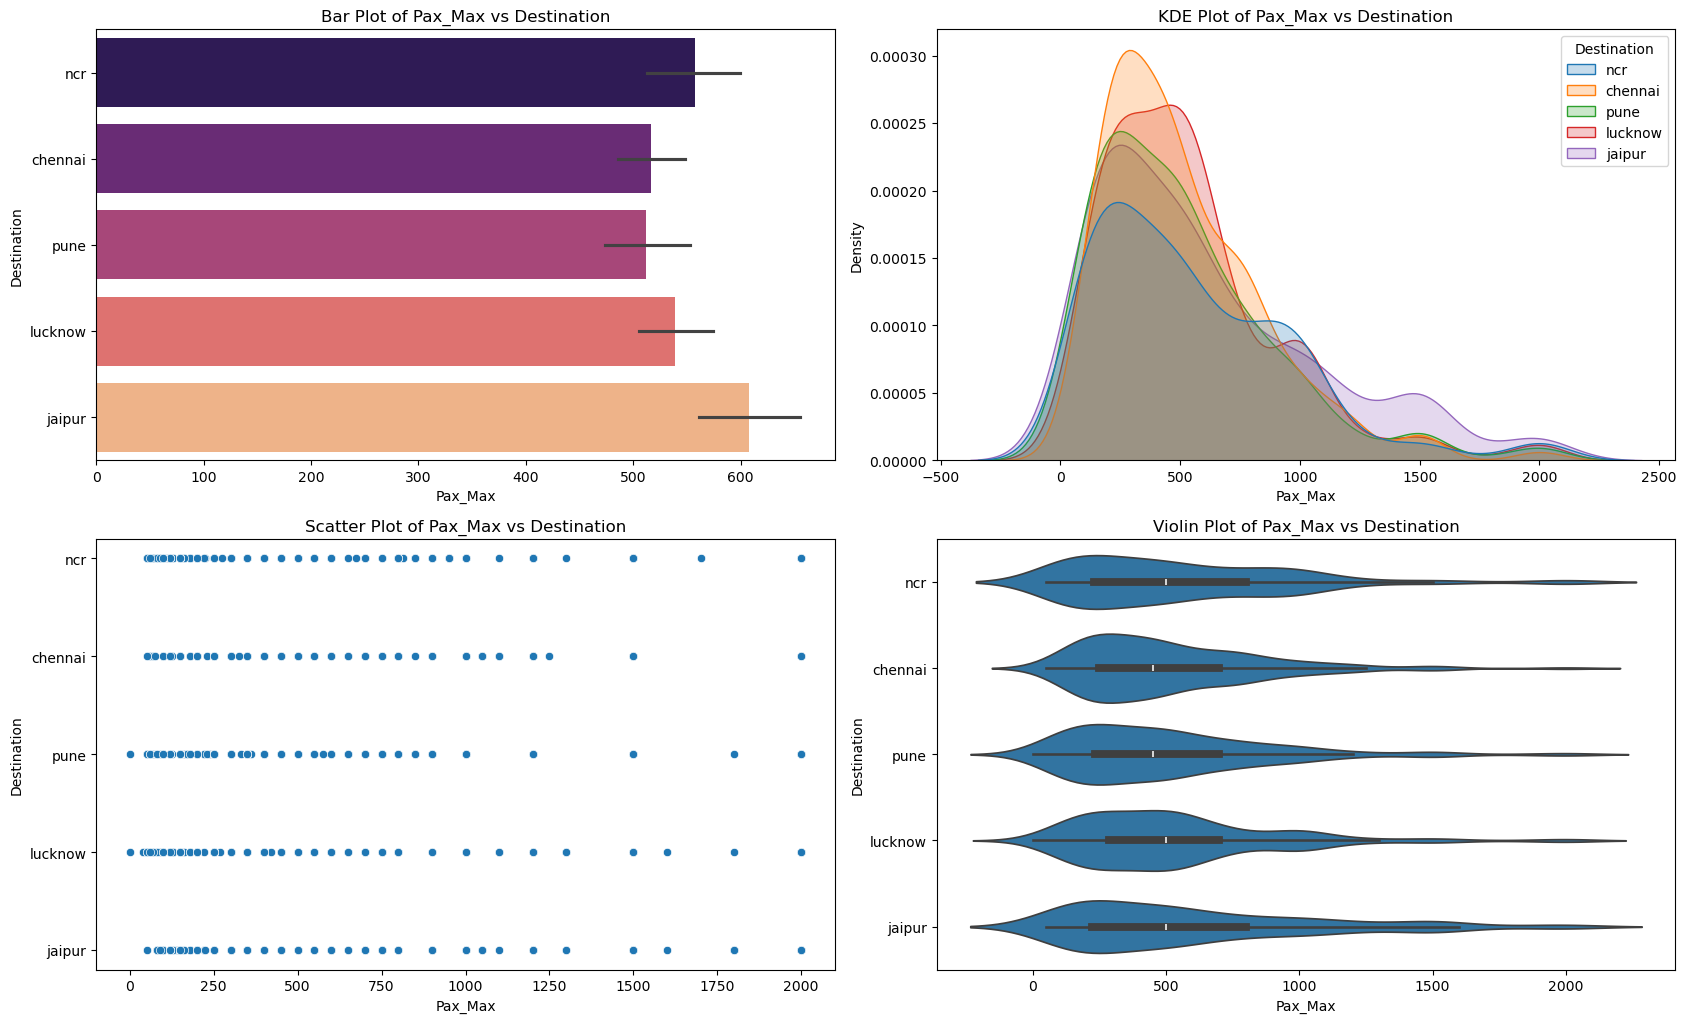

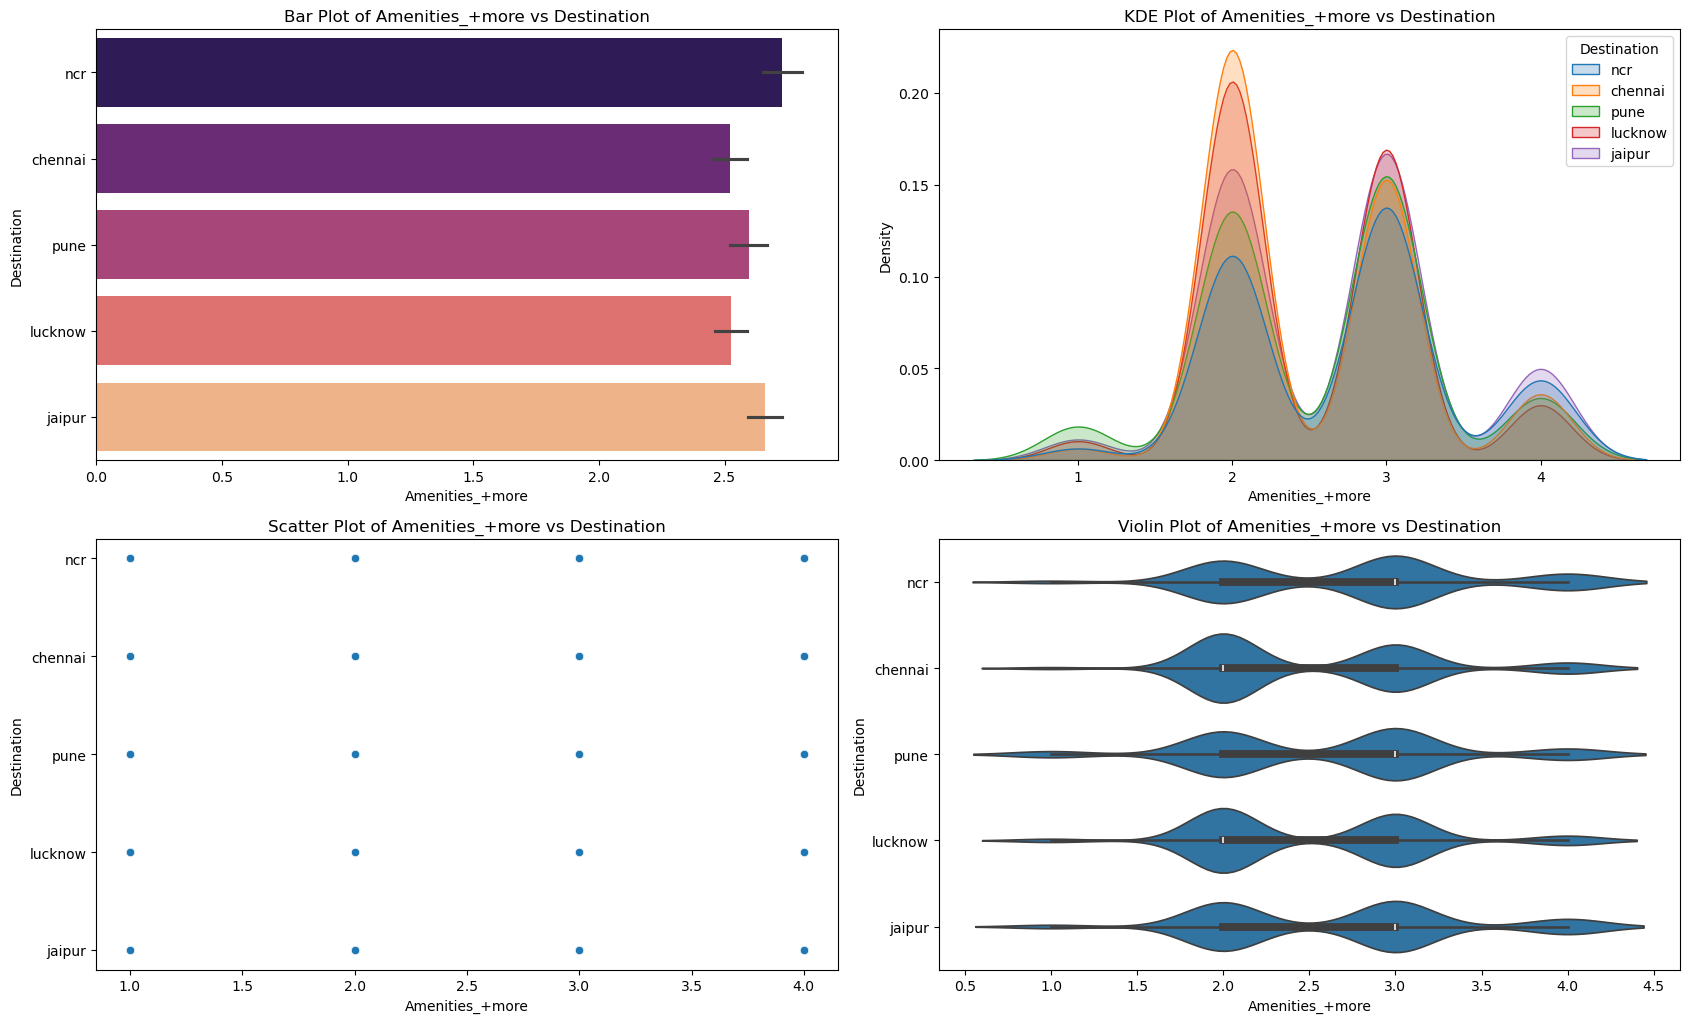

In [37]:
cat_num(df2, num_df2, "Destination")

# Categorical VS Categorical 

In [38]:
def cat_cat(df , col1 , col2 , head = 10):
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    top_values = contingency_table.sum(axis=1).nlargest(head).index
    contingency_table = contingency_table.loc[top_values]
    
    contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100 # Convert contingency table to percentages
    print(contingency_table_percent)

    plt.figure(figsize = (15,6))


    #Heat Map
    plt.subplot(1,2,2)
    sns.heatmap(contingency_table_percent , annot = True , fmt = '.2f' , cmap = 'coolwarm' , cbar_kws = {'label' : 'Percentage'})
    plt.xlabel(f'{col2}')
    plt.ylabel(f'{col1}')
    plt.title(f'Heatmap of {col1} vs {col2}')
    plt.show()

Type                 3 star hotels with banquets  \
Name                                               
atlantis                                     0.0   
bikanervala                                  0.0   
emerald greens                               0.0   
hotel mohan                                  0.0   
mysore mahal                                 0.0   
royal garden                                 0.0   
shehnai banquet                              0.0   
the royal palace                             0.0   
utsav marriage hall                          0.0   
 harnarain palace                            0.0   

Type                 3 star hotels with banquets, convention / function halls  \
Name                                                                            
atlantis                                                           0.0          
bikanervala                                                        0.0          
emerald greens                                     

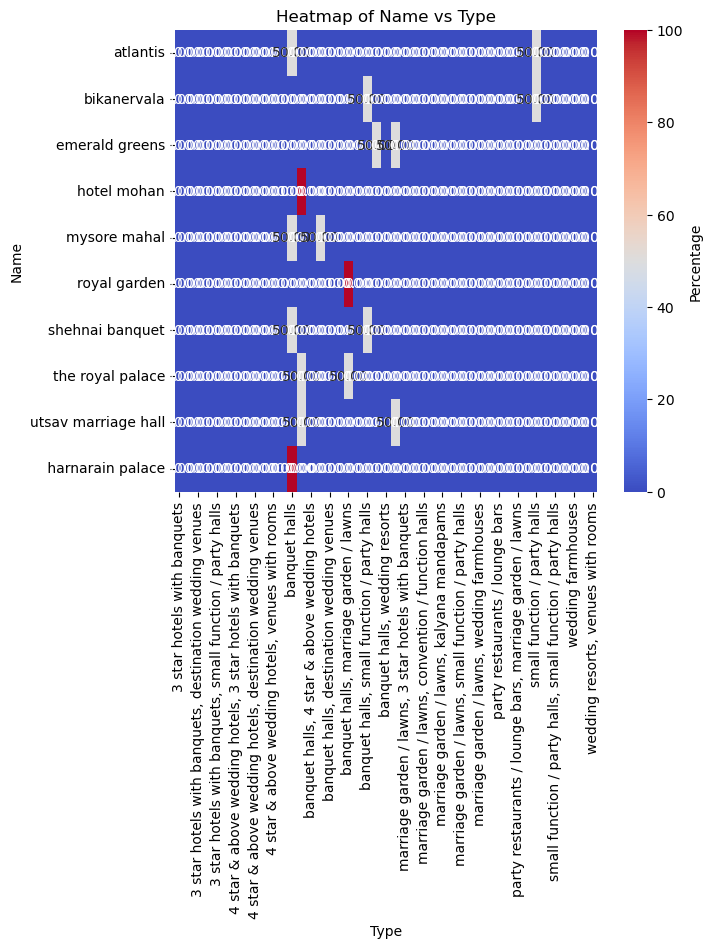

In [39]:
cat_cat(df2, "Name","Type")

Destination          chennai  jaipur  lucknow    ncr  pune
Name                                                      
atlantis                50.0     0.0      0.0    0.0  50.0
bikanervala              0.0     0.0      0.0  100.0   0.0
emerald greens           0.0     0.0     50.0   50.0   0.0
hotel mohan              0.0    50.0     50.0    0.0   0.0
mysore mahal            50.0    50.0      0.0    0.0   0.0
royal garden             0.0     0.0      0.0  100.0   0.0
shehnai banquet          0.0     0.0      0.0  100.0   0.0
the royal palace         0.0    50.0     50.0    0.0   0.0
utsav marriage hall      0.0    50.0     50.0    0.0   0.0
 harnarain palace        0.0     0.0      0.0  100.0   0.0


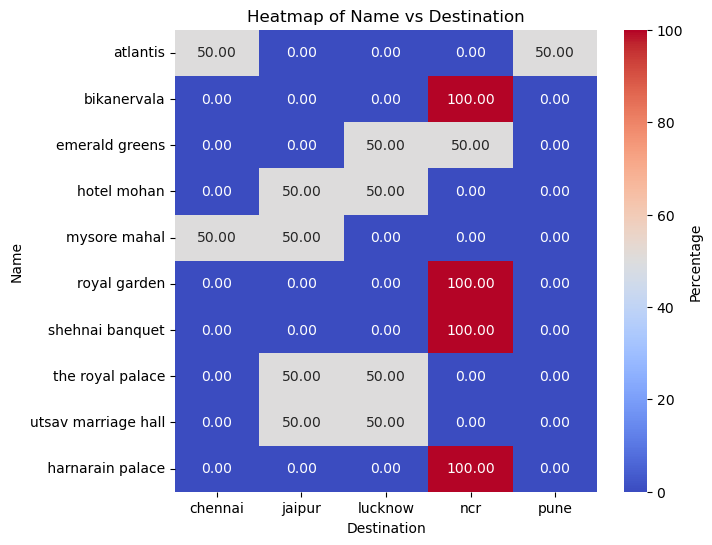

In [40]:
cat_cat(df2, "Name", "Destination")

Destination                                           chennai     jaipur  \
Type                                                                       
banquet halls, marriage garden / lawns               5.934066  35.384615   
banquet halls                                       55.706522   3.260870   
banquet halls, 3 star hotels with banquets          16.564417  26.073620   
marriage garden / lawns                              1.530612  26.020408   
banquet halls, convention / function halls           6.315789   7.368421   
banquet halls, small function / party halls         31.645570  11.392405   
4 star & above wedding hotels, banquet halls        18.840580  30.434783   
banquet halls, venues with rooms                    37.931034   6.896552   
small function / party halls                        11.111111  37.777778   
marriage garden / lawns, 3 star hotels with ban...   8.571429  40.000000   

Destination                                           lucknow        ncr  \
Type       

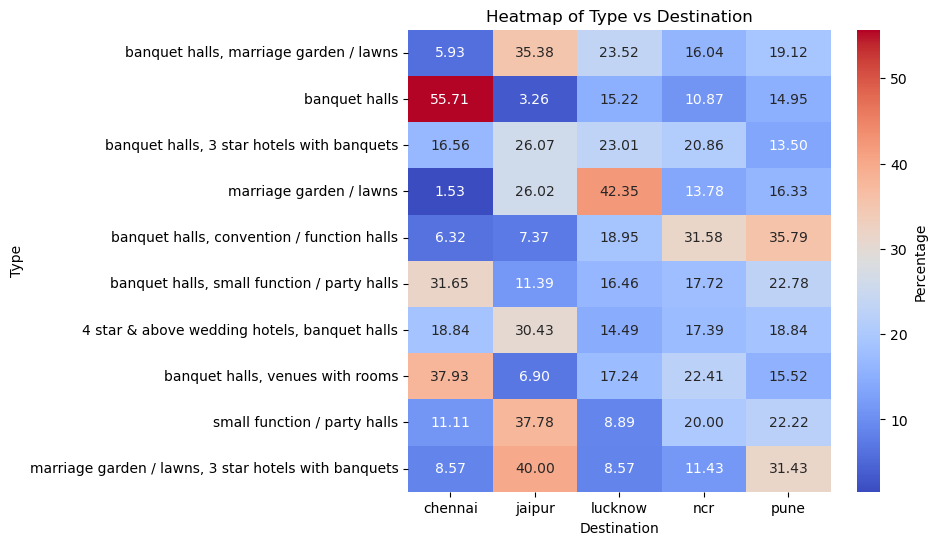

In [41]:
# shubham said this one is perfect n looking nooiceee
cat_cat(df2, "Type","Destination")

# Numerical VS Numerical

# Here I Just Wrote these sentences for my understanding, the way we use to match kundalis, like that i matched kundalis of all numerical columnd with every numerical column to see relation between them as well as to find insights

## Ratings ke saath sare columns ki kundali jama ke dekhi, ab dekhte hai kiska kiske saath kitne gun milte hai

<Axes: xlabel='Ratings', ylabel='Reviews'>

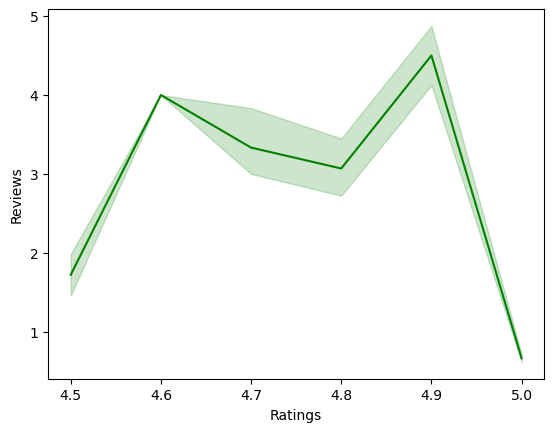

In [42]:
# Tu ruk ja bhai agar koi mila nhin toh tera rishta fix kar denge
sns.lineplot(data = df2 , x = "Ratings" , y = "Reviews" , color = "green")

<Axes: xlabel='Ratings', ylabel='Menu_Price'>

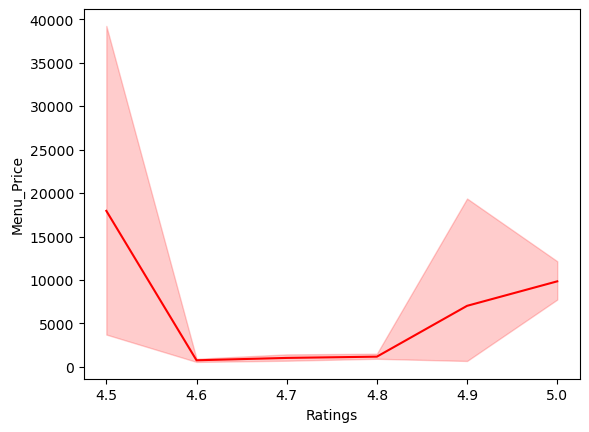

In [43]:
# sorry bhai tere gun match nhi horhe hai issliye tuze reject kr rhe hai
sns.lineplot(data = df2 , x = "Ratings" , y = "Menu_Price" , color = "red")

<Axes: xlabel='Ratings', ylabel='Rooms'>

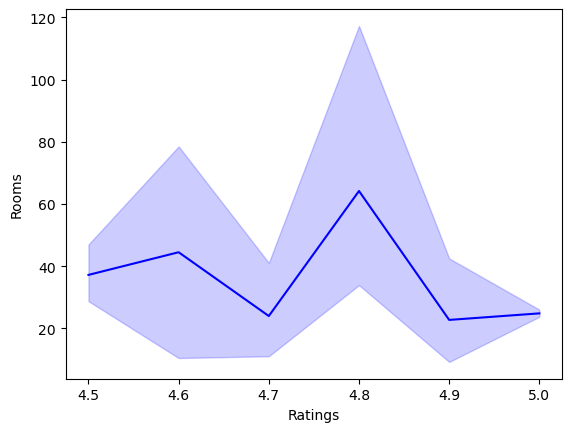

In [44]:
# sorry bhai tere gun match nhi horhe hai issliye tuze reject kr rhe hai
sns.lineplot(data = df2 , x = "Ratings" , y = "Rooms" , color = "blue")

<Axes: xlabel='Ratings', ylabel='Pax_Min'>

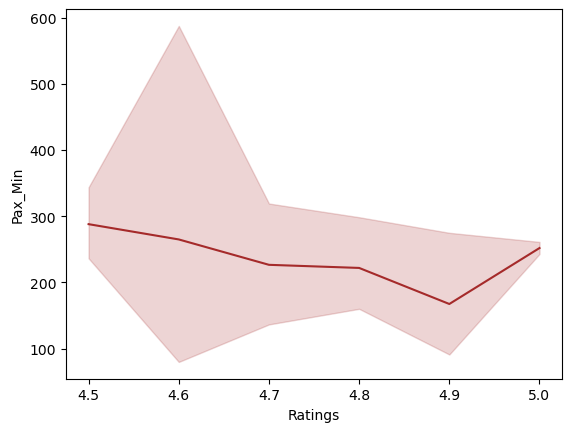

In [45]:
# sorry bhai tere gun match nhi horhe hai issliye tuze reject kr rhe hai
sns.lineplot(data = df2 , x = "Ratings" , y = "Pax_Min" , color = "brown")

<Axes: xlabel='Ratings', ylabel='Pax_Max'>

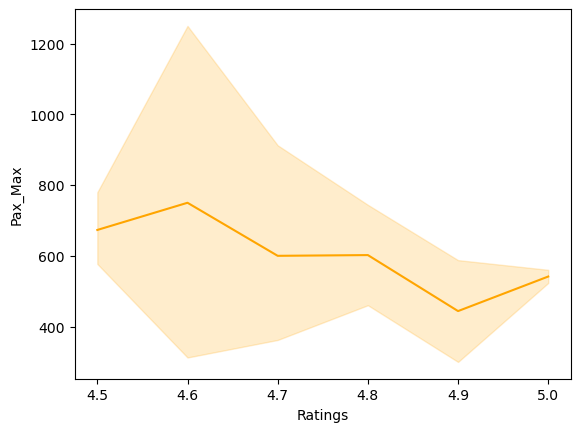

In [46]:
# sorry bhai tere gun match nhi horhe hai issliye tuze reject kr rhe hai
sns.lineplot(data = df2 , x = "Ratings" , y = "Pax_Max" , color = "orange")

<Axes: xlabel='Ratings', ylabel='Amenities_+more'>

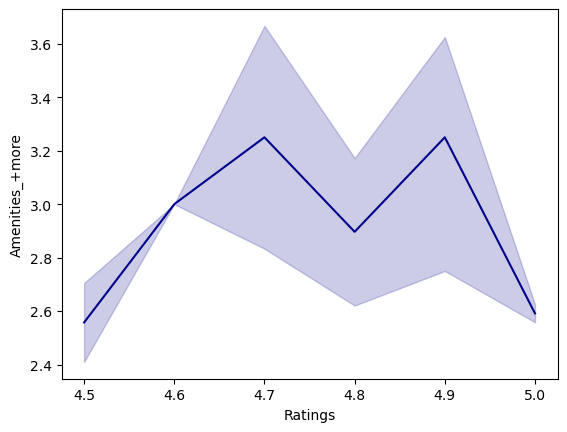

In [47]:
# tere 50-50 gun match ho rhe the but humko aadhe nhi chahiye so you're rejected
sns.lineplot(data = df2 , x = "Ratings" , y = "Amenities_+more" , color = "darkblue")

## Reviews ke saath sare columns ki jodi jama ke dekhi, ab dekhte hai kiska kiske saath kitna gun milte hai

<Axes: xlabel='Reviews', ylabel='Pax_Max'>

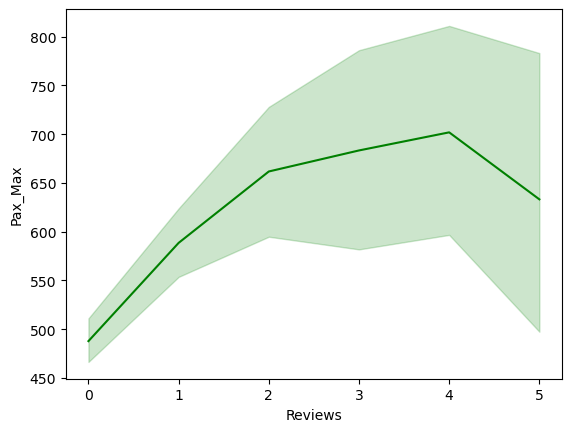

In [48]:
# haanji bhaiyya ji aapke jara gun mil rhe hai issliye hamari beti(ppt) aapko aacept krti hai   
sns.lineplot(data = df2 , x = "Reviews" , y = "Pax_Max" , color = "green")

<Axes: xlabel='Reviews', ylabel='Rooms'>

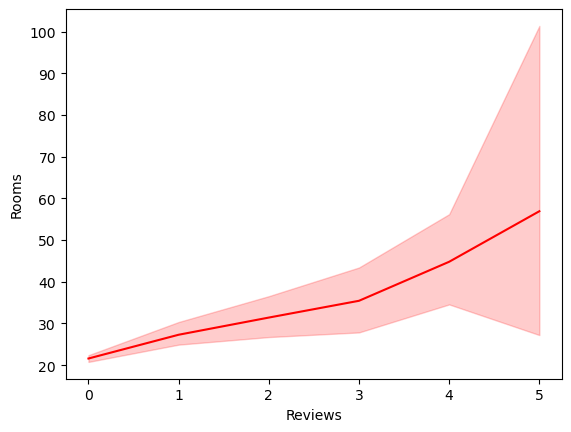

In [49]:
# maine expect kiya tha ki tere mein toh kuch achhe and bht gun mil jayenge but nhi hai so aapko bhi reject kr rhe hai🫠
sns.lineplot(data = df2 , x = "Reviews" , y = "Rooms" , color = "red")

<Axes: xlabel='Reviews', ylabel='Ratings'>

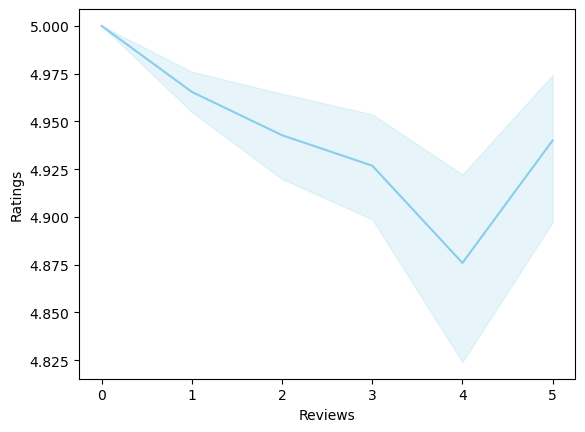

In [50]:
# upar wala (Ratings wrt Reviews) tera bhai humko jyada pasand aaya hai so you're rejected (failed to accept you) 
sns.lineplot(data = df2 , x = "Reviews" , y = "Ratings" , color = "skyblue")

<Axes: xlabel='Reviews', ylabel='Rooms'>

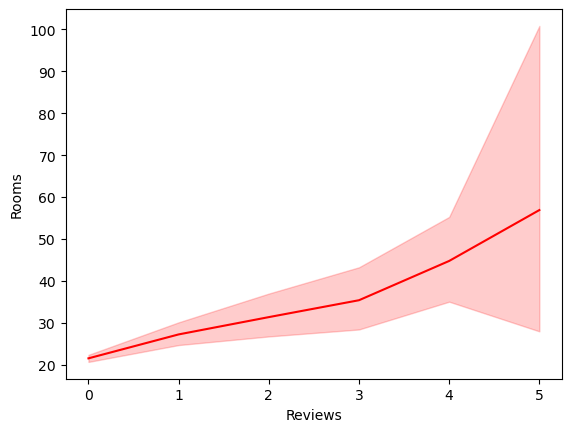

In [51]:
# maine expect kiya tha ki tere mein toh kuch achhe and bht gun mil jayenge but nhi hai so tuze bhi reject kr rhe hai🫠
sns.lineplot(data = df2 , x = "Reviews" , y = "Rooms" , color = "red")

<Axes: xlabel='Reviews', ylabel='Menu_Price'>

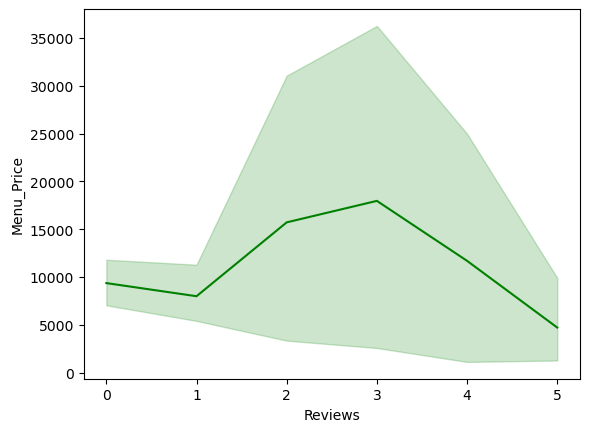

In [52]:
# sorry tera to nature hi hame pasand nhi aaya to tu bhi hamari beti(ppt) ke layak nhi 
sns.lineplot(data = df2 , x = "Reviews" , y = "Menu_Price" , color = "green")

<Axes: xlabel='Reviews', ylabel='Pax_Min'>

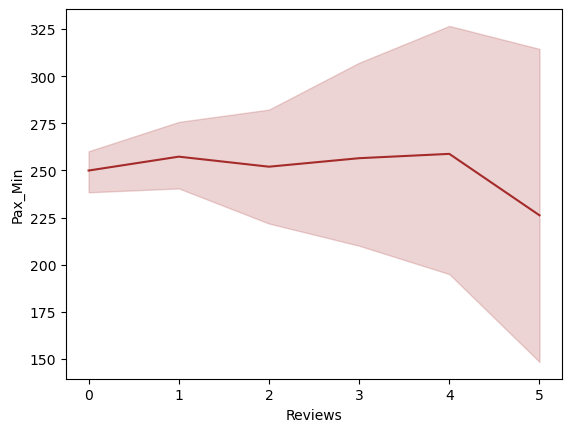

In [53]:
# sorry bhai aap bhi jara tedhe admi dikhte ho, hamari beti (ppt) aapko na bol rhi hai
sns.lineplot(data = df2 , x = "Reviews" , y = "Pax_Min" , color = "brown")

<Axes: xlabel='Reviews', ylabel='Pax_Max'>

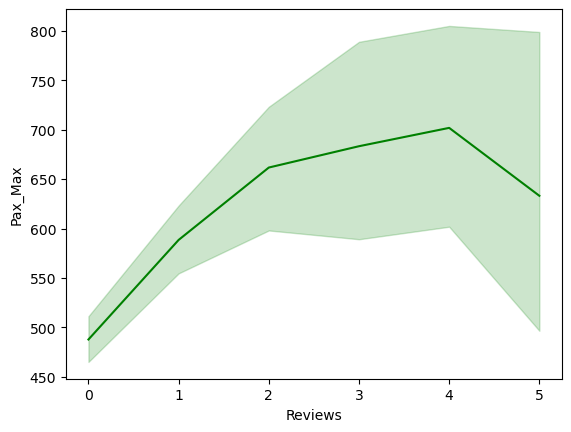

In [54]:
# haanji bhaiyya ji aapke jara gun mil rhe hai aapke bare mein sochte hai   
sns.lineplot(data = df2 , x = "Reviews" , y = "Pax_Max" , color = "green")

<Axes: xlabel='Reviews', ylabel='Amenities_+more'>

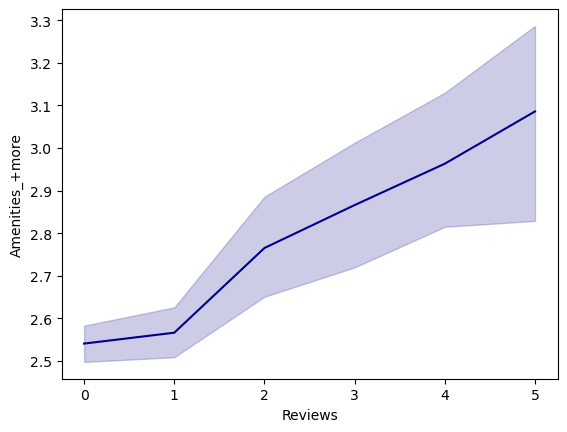

In [55]:
# aapke bhi jara jara gun match karenge aisa lag rha hai
sns.lineplot(data = df2 , x = "Reviews" , y = "Amenities_+more" , color = "darkblue")

## Menu Price ke saath sare columns ki kundali jama ke dekhi, ab dekhte hai kiska kiske saath kitna gun milte hai

<Axes: xlabel='Menu_Price', ylabel='Ratings'>

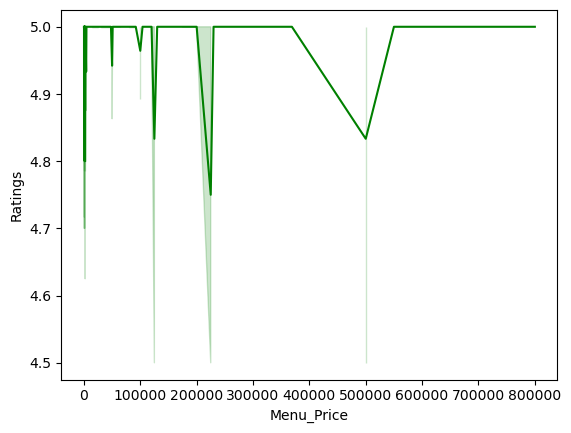

In [56]:
# sorry bhaiyya aapki personality kuch achhi nhi lag rhi hai
sns.lineplot(data = df2 , x = "Menu_Price" , y = "Ratings" , color = "green")

<Axes: xlabel='Menu_Price', ylabel='Reviews'>

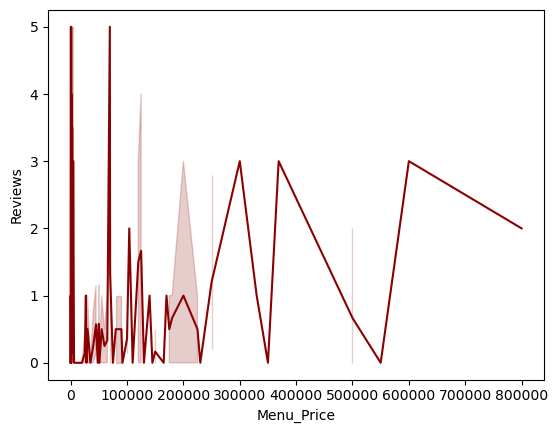

In [57]:
# aap toh hame jara se tedhe insaan lag rhe hai bhaiyya ji , we're failed to accept you 
sns.lineplot(data = df2 , x = "Menu_Price" , y = "Reviews" , color = "darkred")

<Axes: xlabel='Menu_Price', ylabel='Pax_Max'>

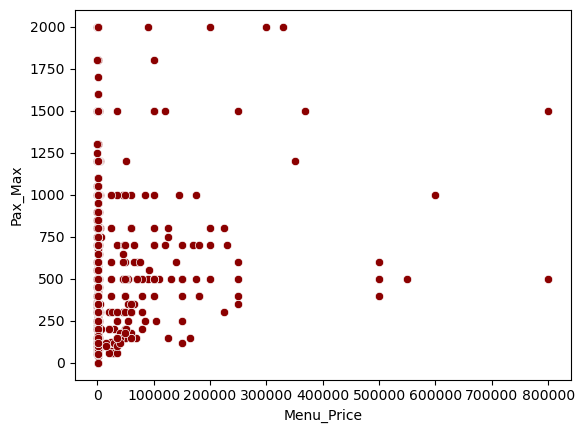

In [58]:
sns.scatterplot(x='Menu_Price', y='Pax_Max', data=df2, color= "darkred")

<Axes: xlabel='Menu_Price', ylabel='Rooms'>

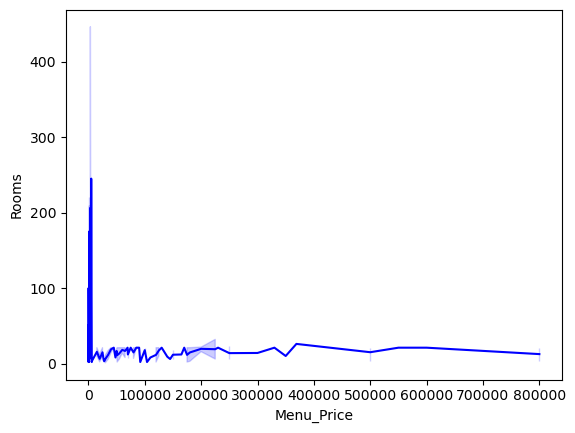

In [59]:
# aapka toh nature hi samjh nhi aa rha hai hame, you're also rejected
sns.lineplot(data = df2 , x = "Menu_Price" , y = "Rooms" , color = "blue")

<Axes: xlabel='Menu_Price', ylabel='Pax_Min'>

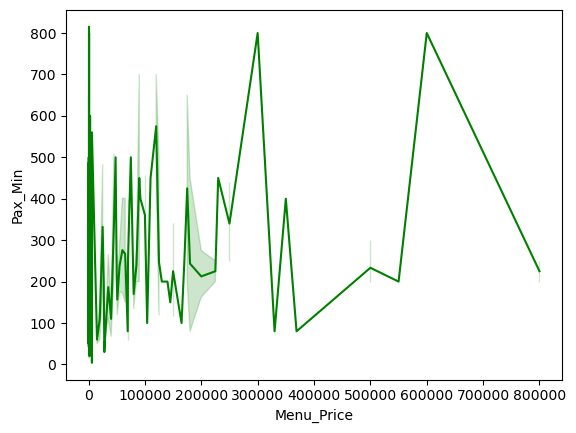

In [60]:
# aapke saath bhi koi gun nhin mil rhe hai issliye hamari beti(ppt) na bol rhi hai
sns.lineplot(data = df2 , x = "Menu_Price" , y = "Pax_Min" , color = "green")

<Axes: xlabel='Menu_Price', ylabel='Pax_Max'>

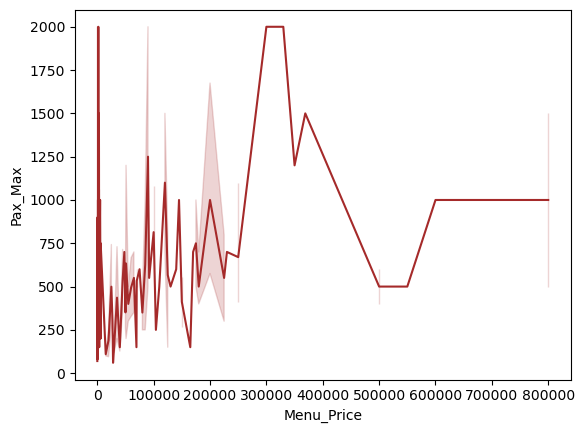

In [61]:
# aapko pending pr rakha jata hai, badmein aate hai aap pr
sns.lineplot(data = df2 , x = "Menu_Price" , y = "Pax_Max" , color = "brown")

<Axes: xlabel='Menu_Price', ylabel='Amenities_+more'>

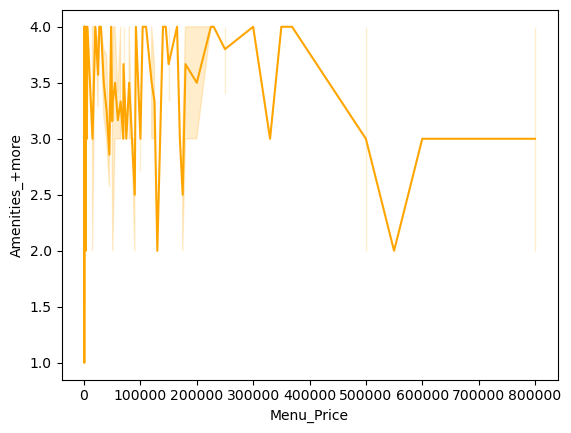

In [62]:
# sorry aap bhi interestinh nhi dikh rhe humko aur haamri beti (ppt) ko
sns.lineplot(data = df2 , x = "Menu_Price" , y = "Amenities_+more" , color = "orange")

## Pax Max ke saath sare columns ki kundali jama ke dekhi, ab dekhte hai kiska kiske saath kitna gun milte hai

<Axes: xlabel='Pax_Max', ylabel='Ratings'>

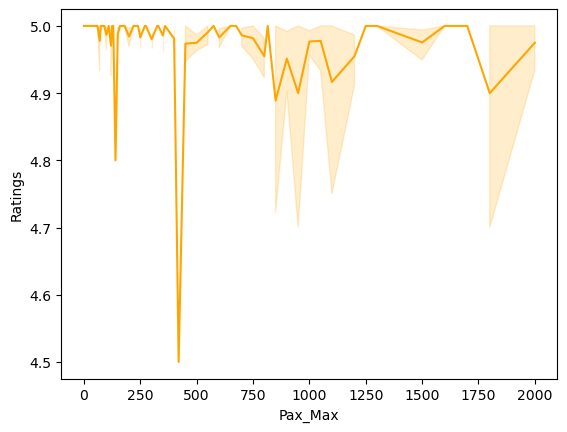

In [63]:
# bhaiyya ji aapki personality achhi nhi lagi
sns.lineplot(data = df2 , x = "Pax_Max" , y = "Ratings" , color = "orange")

<Axes: xlabel='Pax_Max', ylabel='Reviews'>

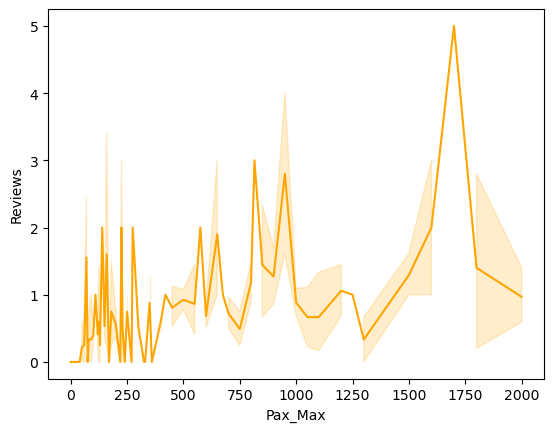

In [64]:
# yes aapke bht gun match ho rhe hai, humari beti(ppt) ko thode thode achhe lage 
sns.lineplot(data = df2 , x = "Pax_Max" , y = "Reviews" , color = "orange")

<Axes: xlabel='Pax_Max', ylabel='Menu_Price'>

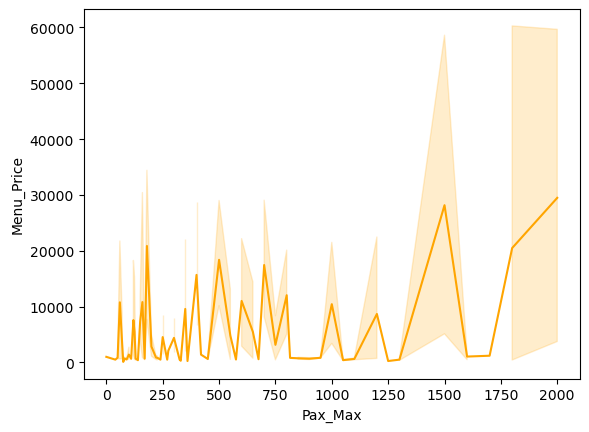

In [65]:
# aapke gun jyada match nhi kr rhe hai issliye aap rejected 
sns.lineplot(data = df2 , x = "Pax_Max" , y = "Menu_Price" , color = "orange")

<Axes: xlabel='Pax_Max', ylabel='Amenities_+more'>

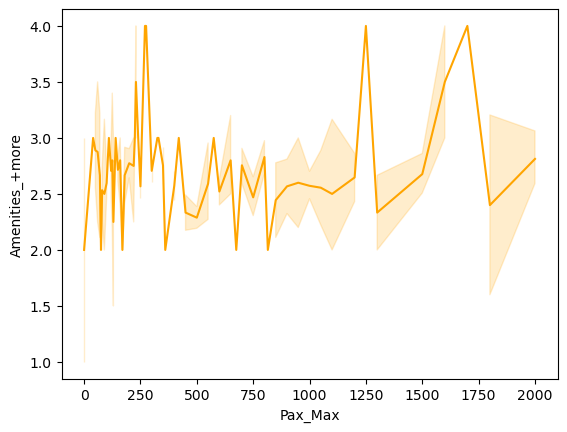

In [66]:
# nhin aapki bhi personality achhi nhi lagi, so you're also rejected
sns.lineplot(data = df2 , x = "Pax_Max" , y = "Amenities_+more" , color = "orange")

## Amenities ke saath sare columns ki kundali jama ke dekhi, ab dekhte hai kiska kiske saath kitna gun milte hai

<Axes: xlabel='Amenities_+more', ylabel='Ratings'>

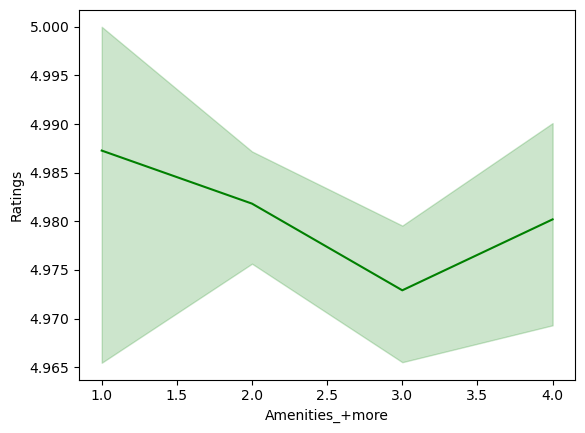

In [67]:
# bhaiyya aapka nature uljha hua hai issliye you're rejected
sns.lineplot(data = df2 , x = "Amenities_+more" , y = "Ratings" , color = "green")

<Axes: xlabel='Amenities_+more', ylabel='Reviews'>

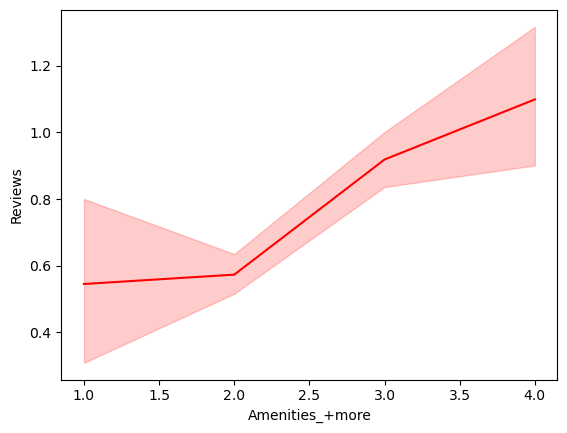

In [68]:
# aapka toh single gun bhi match nhi ho rha hai
sns.lineplot(data = df2 , x = "Amenities_+more" , y = "Reviews" , color = "red")

<Axes: xlabel='Amenities_+more', ylabel='Rooms'>

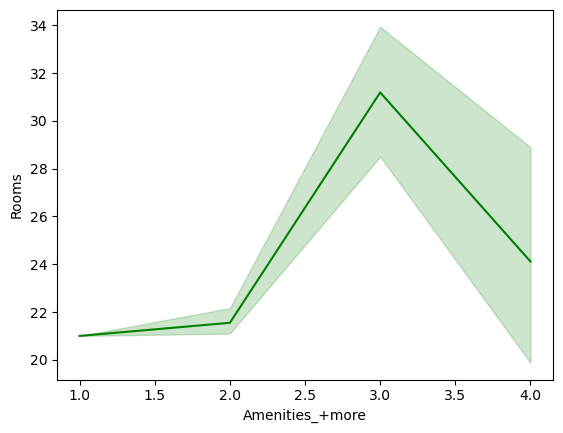

In [69]:
# nhi aap bhi hame pasand nhin aaye 
sns.lineplot(data = df2 , x = "Amenities_+more" , y = "Rooms" , color = "green")

<Axes: xlabel='Amenities_+more', ylabel='Menu_Price'>

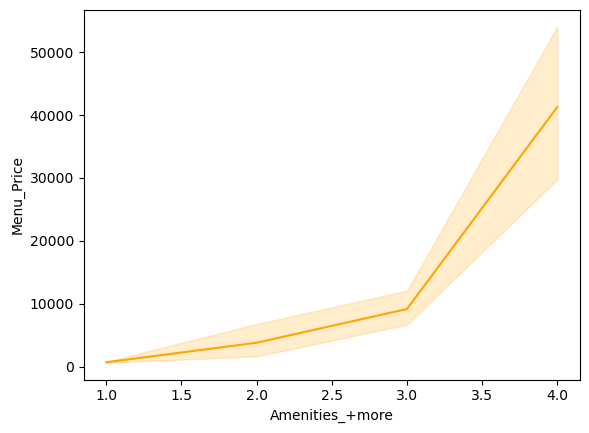

In [70]:
# haan aap achhe lag rhe hai hamari beti(ppt) ke hisaab se 
sns.lineplot(data = df2 , x = "Amenities_+more" , y = "Menu_Price" , color = "orange")

# Grouped Bar Chart

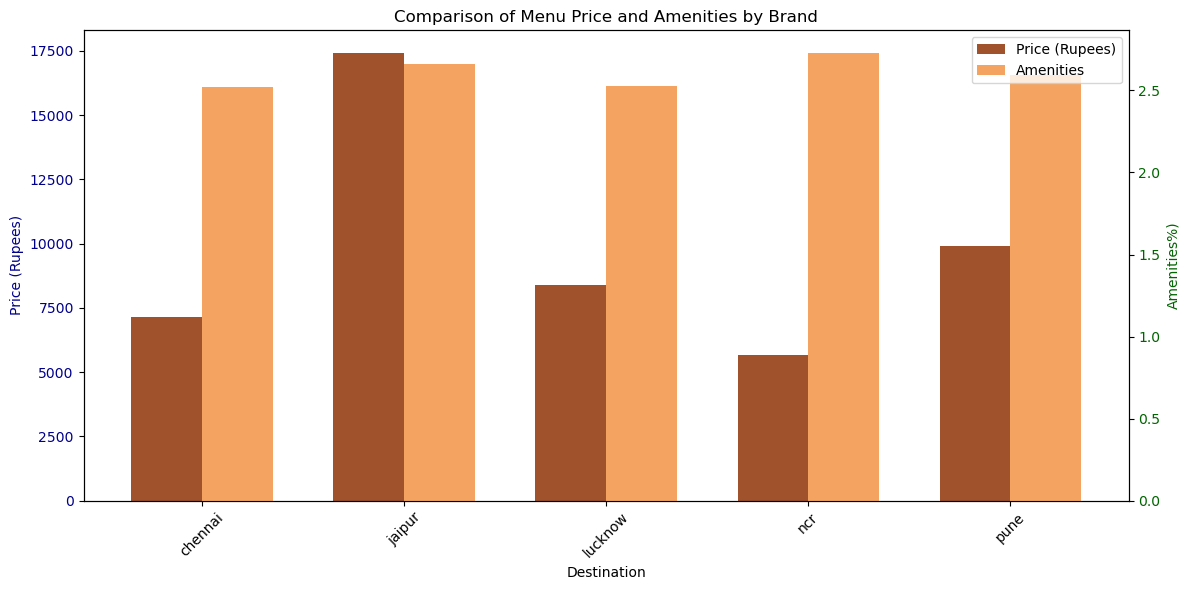

In [71]:
# okay bhai ji
grouped = df2.groupby('Destination')[['Menu_Price', 'Amenities_+more']].mean().reset_index()

# Set position of bars on X axis
Destination = grouped['Destination']
x = np.arange(len(Destination))
width = 0.35

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis for Price
bar1 = ax1.bar(x - width/2, grouped['Menu_Price'], width, label='Price (Rupees)', color='SIENNA')
ax1.set_ylabel('Price (Rupees)', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Secondary axis for ABV%
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, grouped['Amenities_+more'], width, label='Amenities', color='SANDYBROWN')
ax2.set_ylabel('Amenities%)', color='DARKGREEN')
ax2.tick_params(axis='y', labelcolor='DARKGREEN')

# X-axis settings
ax1.set_xlabel('Destination')
ax1.set_xticks(x)
ax1.set_xticklabels(Destination, rotation=45)

# Title
plt.title('Comparison of Menu Price and Amenities by Brand')

# Legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


## observation:  aisa thodi hota ki jo jyada paise leta hai vohi jyada services provide krta hai

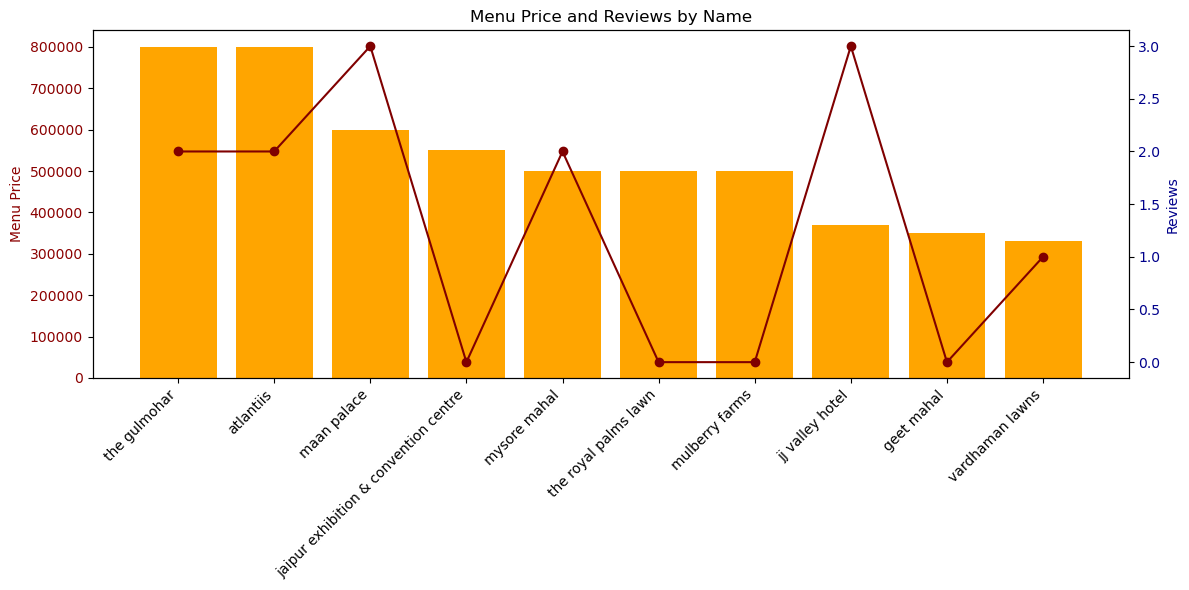

In [73]:
import matplotlib.pyplot as plt

top_df = df2.nlargest(10, 'Menu_Price')[['Name', 'Reviews', 'Menu_Price']]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar for Menu_Price
ax1.bar(top_df['Name'], top_df['Menu_Price'], color='orange', label='Menu Price')
ax1.set_ylabel('Menu Price', color='darkred')
ax1.tick_params(axis='y', labelcolor='darkred')
ax1.set_xticklabels(top_df['Name'], rotation=45, ha='right')

# Second y-axis for Reviews
ax2 = ax1.twinx()
ax2.plot(top_df['Name'], top_df['Reviews'], color='maroon', marker='o', label='Reviews')
ax2.set_ylabel('Reviews', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

plt.title('Menu Price and Reviews by Name')
plt.tight_layout()
plt.show()

## Observation : hum dekh rhe hai ki aapki achhi growth hai reviews mein price ke according

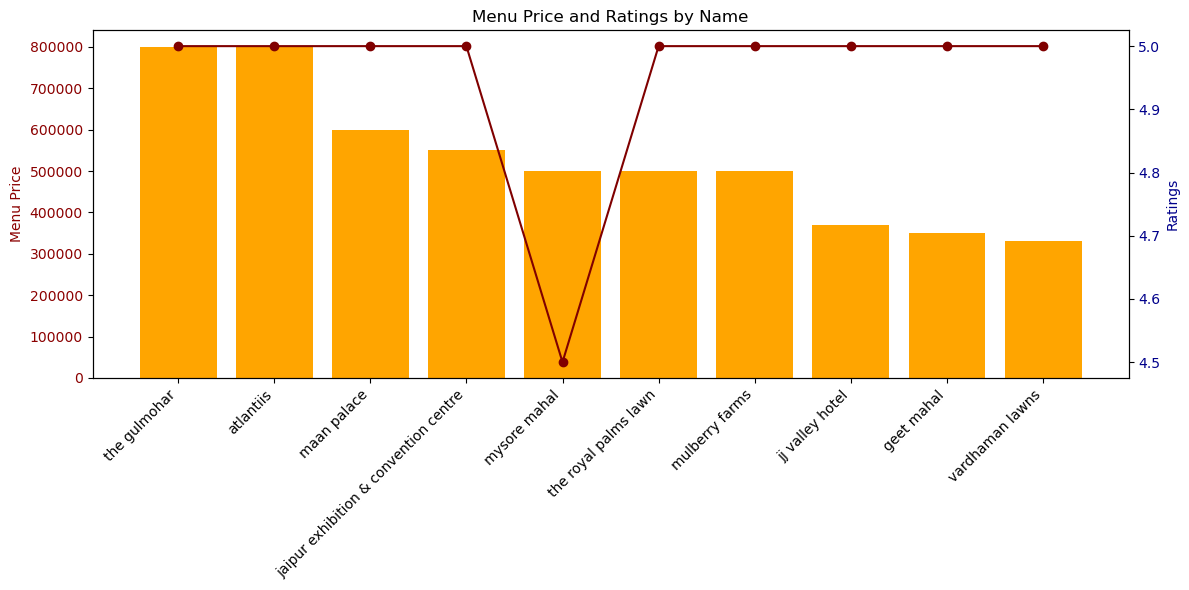

In [74]:
import matplotlib.pyplot as plt

top_df = df2.nlargest(10, 'Menu_Price')[['Name', 'Ratings', 'Menu_Price']]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar for Menu_Price
ax1.bar(top_df['Name'], top_df['Menu_Price'], color='orange', label='Menu Price')
ax1.set_ylabel('Menu Price', color='darkred')
ax1.tick_params(axis='y', labelcolor='darkred')
ax1.set_xticklabels(top_df['Name'], rotation=45, ha='right')

# Second y-axis for Reviews
ax2 = ax1.twinx()
ax2.plot(top_df['Name'], top_df['Ratings'], color='maroon', marker='o', label='Ratings')
ax2.set_ylabel('Ratings', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

plt.title('Menu Price and Ratings by Name')
plt.tight_layout()
plt.show()

## observation: chalo bhai tuze bhi chala lenge ratings ke hisaab se

In [75]:
df2[df2["Name"]== "the gulmohar"]

Name                                        Type  Ratings  \
440  the gulmohar  banquet halls, convention / function halls      5.0   

     Reviews  Menu_Price  Rooms  Pax_Min  Pax_Max Destination  Amenities_+more  
440        2    800000.0     21      200      500      jaipur                2

In [82]:
# here in this image you can see , aprt from the website i scrape, other two websited are also showing same results

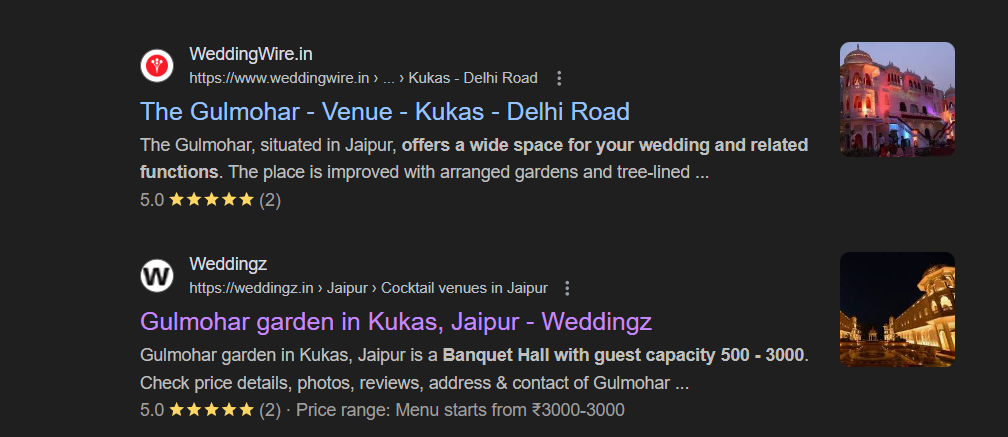

<Axes: xlabel='Destination', ylabel='Menu_Price'>

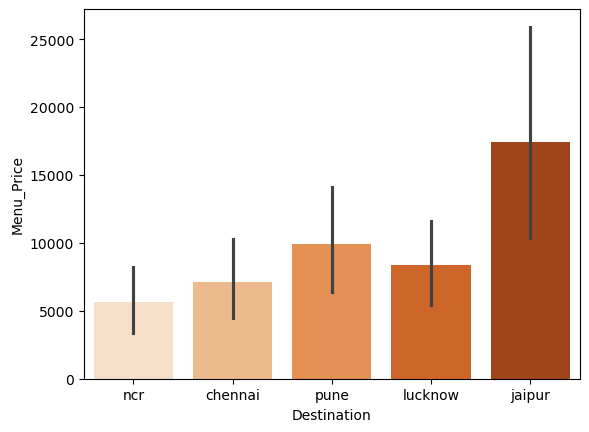

In [76]:
sns.barplot(data = df2 , x = 'Destination' , y = 'Menu_Price' , palette = 'Oranges')

<Axes: xlabel='Name', ylabel='Reviews'>

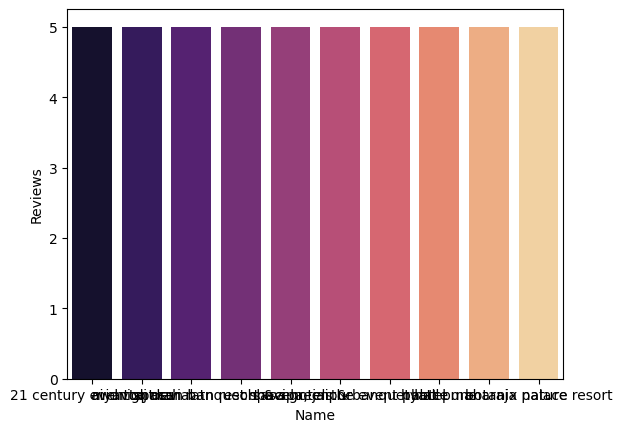

In [77]:
sns.barplot(data = df2.nlargest(10, 'Reviews'), x = 'Name', y = 'Reviews', palette = 'magma')


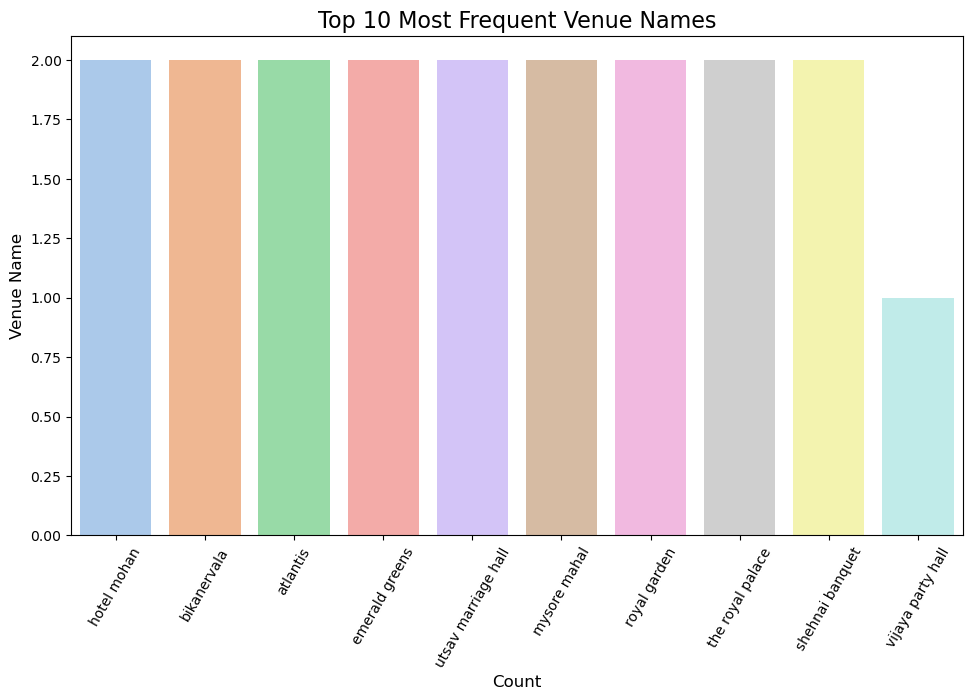

In [78]:
# Get top 10 most frequent names
top10_names = df2['Name'].value_counts().nlargest(10).index

# Filter the dataframe to include only those top 10 names
filtered_df = df2[df2['Name'].isin(top10_names)]

# Plotting the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Name', order=top10_names, palette='pastel')

# Customize the plot
plt.title('Top 10 Most Frequent Venue Names', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Venue Name', fontsize=12)
plt.tight_layout()
plt.xticks(rotation = 60)

plt.show()

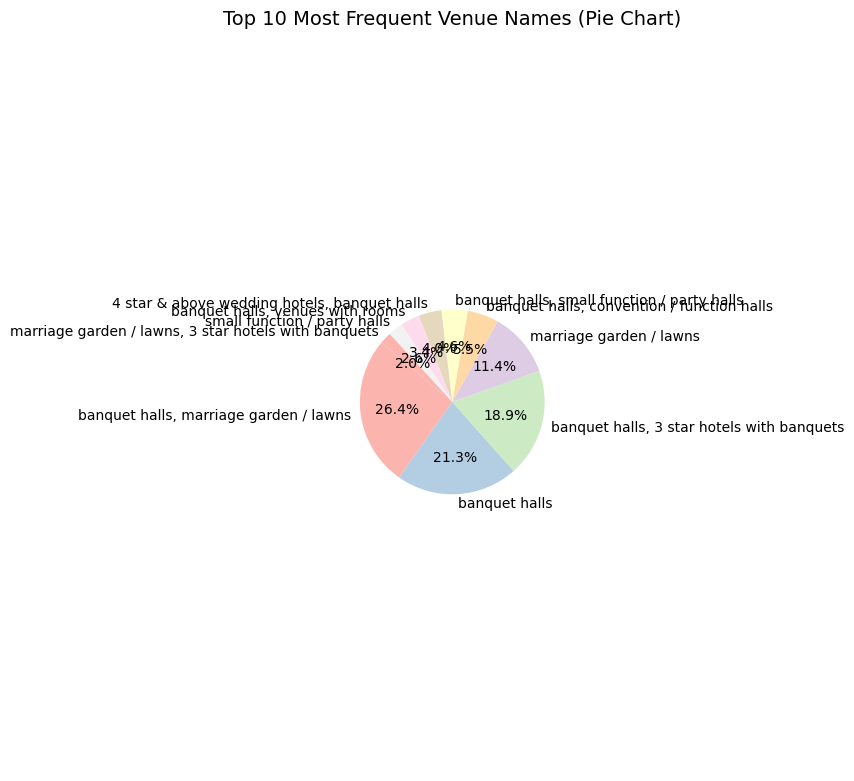

In [79]:
# Get top 10 most frequent names with their counts
top10_name_counts = df2['Type'].value_counts().nlargest(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top10_name_counts, labels=top10_name_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)

# Customize the plot
plt.title('Top 10 Most Frequent Venue Names (Pie Chart)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

plt.show()

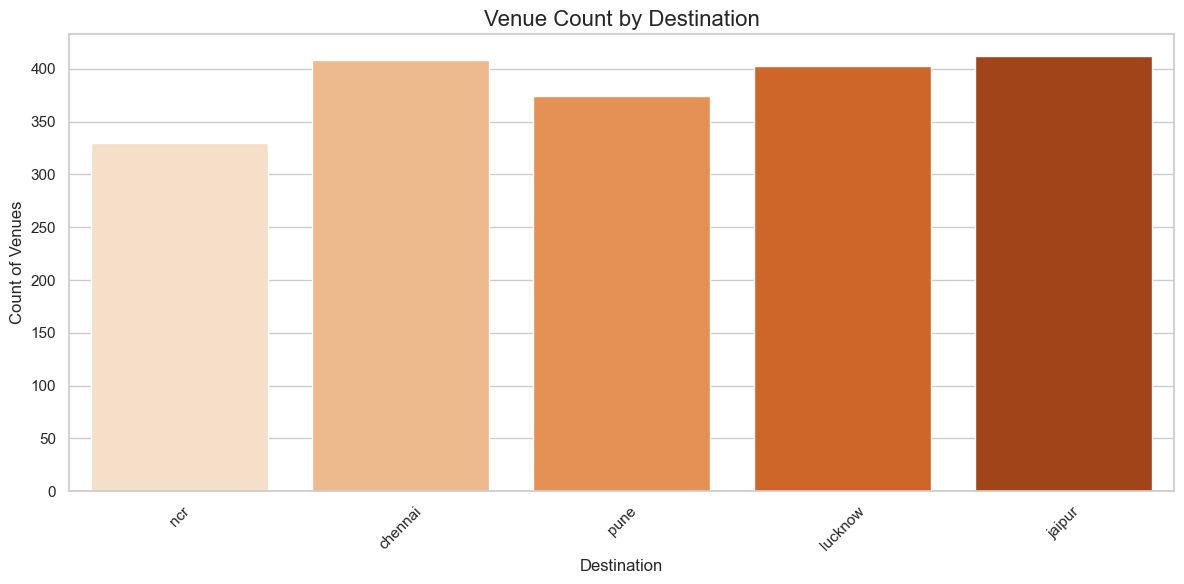

In [80]:
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create countplot
sns.countplot(data=df2, x='Destination', palette='Oranges')

# Customize the plot
plt.title('Venue Count by Destination', fontsize=16)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Count of Venues', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

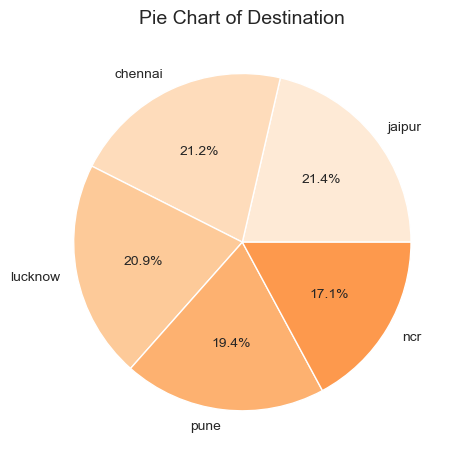

In [83]:
# Define color palette
colors = sns.color_palette('Oranges', n_colors=10)

# Create the pie chart
df2['Destination'].value_counts().nlargest(10).plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    textprops={'fontsize': 10}
)

# Set the title and layout
plt.title('Pie Chart of Destination', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [84]:
df2.to_csv('Venues_data.csv', index = False)